In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
compustat_data = pd.read_csv('funda_2022.csv', low_memory=False)

In [3]:
compustat_data.head()

gvkey    datadate  fyear indfmt consol popsrc datafmt   tic      cusip  \
0   1000  1961-12-31   1961   INDL      C      D     STD  AE.2  000032102   
1   1000  1962-12-31   1962   INDL      C      D     STD  AE.2  000032102   
2   1000  1963-12-31   1963   INDL      C      D     STD  AE.2  000032102   
3   1000  1964-12-31   1964   INDL      C      D     STD  AE.2  000032102   
4   1000  1965-12-31   1965   INDL      C      D     STD  AE.2  000032102   

                    conm  ... priusa   sic spcindcd  spcseccd  spcsrc  state  \
0  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   
1  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   
2  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   
3  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   
4  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   

  stko weburl       dldte ipodate  
0  0.0    NaN  1978-06-30     NaN  
1  0.0    NaN  1978-06-30     NaN  
2  0.0    NaN  1978-06-30     NaN  
3  0.0    NaN  1978-06-30     NaN  
4  0.0    NaN  1978-06-30     NaN  

[5 rows x 981 columns]

In [4]:
compustat_data.shape

(539318, 981)

In [5]:
compustat_data.dtypes

gvkey         int64
datadate     object
fyear         int64
indfmt       object
consol       object
             ...   
state        object
stko        float64
weburl       object
dldte        object
ipodate      object
Length: 981, dtype: object

In [6]:
compustat_data.isna().sum()

gvkey            0
datadate         0
fyear            0
indfmt           0
consol           0
             ...  
state        44784
stko         44376
weburl      240298
dldte       195763
ipodate     368348
Length: 981, dtype: int64

In [7]:
# Convert 'date' column to datetime format
compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])

# Create a copy of the dataframe to work with
compustat_copy = compustat_data.copy(deep=True)

# Check the data type of the 'date' column and the first few rows of the copied dataframe
compustat_copy.dtypes['datadate']

dtype('<M8[ns]')

In [8]:
compustat_copy.shape

(539318, 981)

In [9]:
compustat_copy.head()

gvkey   datadate  fyear indfmt consol popsrc datafmt   tic      cusip  \
0   1000 1961-12-31   1961   INDL      C      D     STD  AE.2  000032102   
1   1000 1962-12-31   1962   INDL      C      D     STD  AE.2  000032102   
2   1000 1963-12-31   1963   INDL      C      D     STD  AE.2  000032102   
3   1000 1964-12-31   1964   INDL      C      D     STD  AE.2  000032102   
4   1000 1965-12-31   1965   INDL      C      D     STD  AE.2  000032102   

                    conm  ... priusa   sic spcindcd  spcseccd  spcsrc  state  \
0  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   
1  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   
2  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   
3  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   
4  A & E PLASTIK PAK INC  ...    1.0  3089    325.0     978.0     NaN    NaN   

  stko weburl       dldte ipodate  
0  0.0    NaN  1978-06-30     NaN  
1  0.0    NaN  1978-06-30     NaN  
2  0.0    NaN  1978-06-30     NaN  
3  0.0    NaN  1978-06-30     NaN  
4  0.0    NaN  1978-06-30     NaN  

[5 rows x 981 columns]

## Function to compute the descriptive stats of the Financial Ratios Per Year

In [10]:
def describe_yearly_stats(df, year):
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year].copy(deep=True)
    
    # Sort by 'datadate' immediately after copying
    df_year.sort_values('datadate', inplace=True)

    # Columns for which to describe statistics
    columns_to_describe = [
        'ch', 'ivst', 'rect', 'invt', 'aco', 'act', 'ppent', 'ivaeq', 'ivao', 'intan', 'ao', 'at',
        'dlc', 'ap', 'txp', 'lco', 'lct', 'dltt', 'lo', 'txditc', 'mib', 'lt', 'pstk', 'ceq', 'teq',
        'sale', 'cogs', 'xsga', 'oibdp', 'dp', 'oiadp', 'xint', 'nopi', 'spi', 'pi', 'txt', 'mii', 'ib', 'dvp',
        'cstke', 'xido', 'ni', 'ibc', 'dpc', 'xidoc', 'txdc', 'esubc', 'sppiv', 'fopo', 'fopt', 'recch',
        'invch', 'apalch', 'txach', 'aoloch', 'oancf', 'ivch', 'siv', 'capx', 'sppe', 'aqc', 'ivstch', 'ivaco',
        'ivncf', 'sstk', 'prstkc', 'dv', 'dltis', 'dltr', 'dlcch', 'fiao', 'fincf', 'exre', 'chech', 'fsrco',
        'fuseo', 'wcapc', 'net_debt_issued_ratio', 'book_leverage', 'wc_ta', 're_ta', 'ebit_ta', 'mv_tl',
        'sales_ta', 'z_score', 'sale_to_at_avg'
    ]
    
    # Compute additional ratios for describe
    df_year['dltis_at'] = df_year['dltis'] / df_year['at']
    df_year['dlc_at'] = df_year['dlc'] / df_year['at']
    df_year['dltt_at'] = df_year['dltt'] / df_year['at']
    df_year['ppent_at'] = df_year['ppent'] / df_year['at']
    df_year['mkvalt_at'] = df_year.get('mkvalt', pd.Series(index=df_year.index)) / df_year['at']  # 'mkvalt' might not be present
    df_year['ni_at'] = df_year['ni'] / df_year['at']
    df_year['net_debt_issued'] = df_year['dltis'] - df_year['dltr'] + df_year['dlcch']
    df_year['net_debt_issued_ratio'] = df_year['net_debt_issued'] / df_year['at']
    df_year['book_leverage'] = (df_year['dltt'] + df_year['dlc']) / (df_year['dltt'] + df_year['dlc'] + df_year['seq'])
    df_year['wc_ta'] = (df_year['act'] - df_year['lct']) / df_year['at']
    df_year['re_ta'] = df_year['re'] / df_year['at']
    df_year['ebit_ta'] = df_year['oiadp'] / df_year['at']
    df_year['mv_tl'] = (df_year['prcc_f'] * df_year['csho']) / df_year['lt']
    df_year['sales_ta'] = df_year['sale'] / df_year['at']
    
    # Calculate the Altman Z-Score
    df_year['z_score'] = (1.2 * df_year['wc_ta']) + \
                         (1.4 * df_year['re_ta']) + \
                         (3.3 * df_year['ebit_ta']) + \
                         (0.6 * df_year['mv_tl']) + \
                         (0.99 * df_year['sales_ta'])
    
    # Calculate rolling average for 'at' and 'sale_to_at_avg'
    df_year['at_rolling_avg'] = df_year['at'].rolling(window=2).mean()
    df_year['sale_to_at_avg'] = df_year['sale'] / df_year['at_rolling_avg']
    
    # Add all computed ratio columns to describe list
    computed_ratios = ['dltis_at', 'dlc_at', 'dltt_at', 'ppent_at', 'mkvalt_at', 'ni_at', 
                       'net_debt_issued_ratio', 'book_leverage', 'wc_ta', 're_ta', 
                       'ebit_ta', 'mv_tl', 'sales_ta', 'z_score', 'sale_to_at_avg']
    
    columns_to_describe.extend(computed_ratios)
    
    # Print descriptive statistics for each column
    for col in columns_to_describe:
        if col in df_year:
            print(f"Descriptive statistics for {col} in the year {year}:")
            print(df_year[col].describe())
            print("\n")
        else:
            print(f"Column {col} not found in dataframe for the year {year}.\n")

    return df_year  # You can return the filtered dataframe with additional columns if needed


## Descriptive Stats of the Finaincal Ratios for the Year 1970

In [11]:
compustat_copy_1970 = compustat_copy[compustat_copy['datadate'].dt.year == 1970]

In [12]:
compustat_copy_1970['ch'].describe()

count    2816.000000
mean       56.715982
std       341.745658
min         0.000000
25%         0.598750
50%         1.893500
75%         7.789000
max      6220.254000
Name: ch, dtype: float64

In [13]:
compustat_copy_1970['ivst'].describe()

count    2783.000000
mean       12.409155
std        57.738601
min        -0.001000
25%         0.000000
50%         0.200000
75%         3.397000
max      1173.203000
Name: ivst, dtype: float64

In [14]:
compustat_copy_1970['rect'].describe()

count     3378.000000
mean        94.053072
std        576.884046
min          0.000000
25%          2.284500
50%          6.822000
75%         24.602250
max      15951.402000
Name: rect, dtype: float64

In [15]:
compustat_copy_1970['invt'].describe()

count    3285.000000
mean       40.582404
std       141.497855
min         0.000000
25%         1.675000
50%         6.627000
75%        23.017000
max      4115.059000
Name: invt, dtype: float64

In [16]:
compustat_copy_1970['aco'].describe()

count    3263.000000
mean        2.563479
std        13.633103
min        -5.101000
25%         0.079500
50%         0.299000
75%         1.178500
max       390.000000
Name: aco, dtype: float64

In [17]:
compustat_copy_1970['act'].describe()

count    3474.000000
mean       93.495580
std       316.934658
min         0.020000
25%         6.948000
50%        18.689500
75%        54.736250
max      6527.746000
Name: act, dtype: float64

In [18]:
compustat_copy_1970['ppent'].describe()

count     3776.000000
mean       140.036473
std        834.682773
min          0.000000
25%          3.766250
50%         12.801000
75%         53.191250
max      42550.199000
Name: ppent, dtype: float64

In [19]:
compustat_copy_1970['ivaeq'].describe()

count    3296.000000
mean        9.187081
std        72.796807
min         0.000000
25%         0.000000
50%         0.000000
75%         0.295750
max      2631.908000
Name: ivaeq, dtype: float64

In [20]:
compustat_copy_1970['ivao'].describe()

count     3287.000000
mean        34.761339
std        338.156953
min          0.000000
25%          0.000000
50%          0.049000
75%          1.861500
max      15523.199000
Name: ivao, dtype: float64

In [21]:
compustat_copy_1970['intan'].describe()

count    3249.000000
mean        4.249424
std        17.780756
min         0.000000
25%         0.000000
50%         0.049000
75%         1.654000
max       435.248000
Name: intan, dtype: float64

In [22]:
compustat_copy_1970['ao'].describe()

count    3755.000000
mean        9.574822
std        60.544986
min        -0.025000
25%         0.142000
50%         0.664000
75%         3.266500
max      1767.878000
Name: ao, dtype: float64

In [23]:
compustat_copy_1970['at'].describe()

count     3782.000000
mean       443.840716
std       1755.187977
min          0.334000
25%         15.243750
50%         47.404500
75%        233.743500
max      49641.500000
Name: at, dtype: float64

In [24]:
compustat_copy_1970['dlc'].describe()

count    3715.000000
mean       28.348970
std       162.256449
min         0.000000
25%         0.486500
50%         2.538000
75%        12.168500
max      7646.275000
Name: dlc, dtype: float64

In [25]:
compustat_copy_1970['ap'].describe()

count     3384.000000
mean       102.399753
std        854.866108
min          0.000000
25%          1.009750
50%          3.141000
75%         11.234750
max      25643.207000
Name: ap, dtype: float64

In [26]:
compustat_copy_1970['txp'].describe()

count    3251.000000
mean        5.312647
std        31.613917
min        -0.117000
25%         0.068500
50%         0.430000
75%         1.677000
max       762.845000
Name: txp, dtype: float64

In [27]:
compustat_copy_1970['lco'].describe()

count    3254.000000
mean       13.520867
std        70.727329
min         0.000000
25%         0.506000
50%         1.574500
75%         5.751250
max      1865.442000
Name: lco, dtype: float64

In [28]:
compustat_copy_1970['lct'].describe()

count    3490.000000
mean       56.765866
std       254.182225
min         0.032000
25%         3.252250
50%         9.575500
75%        30.497250
max      7861.090000
Name: lct, dtype: float64

In [29]:
compustat_copy_1970['dltt'].describe()

count     3741.000000
mean        71.352833
std        374.361493
min          0.000000
25%          1.000000
50%          6.613000
75%         32.401000
max      18248.297000
Name: dltt, dtype: float64

In [30]:
compustat_copy_1970['lo'].describe()

count    3526.000000
mean       13.154559
std       118.343319
min        -0.018000
25%         0.000000
50%         0.000000
75%         1.087750
max      5630.297000
Name: lo, dtype: float64

In [31]:
compustat_copy_1970['txditc'].describe()

count    3462.000000
mean        6.944296
std        31.959672
min        -0.040000
25%         0.000000
50%         0.209000
75%         1.994500
max       998.353000
Name: txditc, dtype: float64

In [32]:
compustat_copy_1970['mib'].describe()

count    3750.000000
mean        2.344391
std        23.752359
min        -0.085000
25%         0.000000
50%         0.000000
75%         0.000000
max       798.276000
Name: mib, dtype: float64

In [33]:
compustat_copy_1970['lt'].describe()

count     3751.000000
mean       307.947243
std       1399.573805
min          0.032000
25%          6.337500
50%         22.698000
75%        121.887000
max      28229.309000
Name: lt, dtype: float64

In [34]:
compustat_copy_1970['pstk'].describe()

count    3778.000000
mean        5.943685
std        31.468075
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max       926.429000
Name: pstk, dtype: float64

In [35]:
compustat_copy_1970['ceq'].describe()

count     3768.000000
mean       122.166394
std        573.617310
min        -32.678000
25%          7.013750
50%         21.640000
75%         74.831250
max      24294.699000
Name: ceq, dtype: float64

In [36]:
compustat_copy_1970['teq'].describe()

count      299.000000
mean       191.503779
std        742.274621
min          0.475000
25%         10.283500
50%         37.268000
75%        141.541500
max      10950.642000
Name: teq, dtype: float64

In [37]:
compustat_copy_1970['sale'].describe()

count     3632.000000
mean       233.135155
std        801.758935
min          0.000000
25%         18.141500
50%         50.656000
75%        149.590500
max      18752.402000
Name: sale, dtype: float64

In [38]:
compustat_copy_1970['cogs'].describe()

count     3629.000000
mean       165.912341
std        578.336378
min          0.000000
25%         11.901000
50%         33.544000
75%        105.111000
max      15589.203000
Name: cogs, dtype: float64

In [39]:
compustat_copy_1970['xsga'].describe()

count    3154.000000
mean       36.918033
std       128.148356
min         0.051000
25%         2.764250
50%         7.662500
75%        22.866000
max      2985.069000
Name: xsga, dtype: float64

In [40]:
compustat_copy_1970['oibdp'].describe()

count    3624.000000
mean       35.202506
std       168.530230
min       -83.763000
25%         1.586750
50%         5.419000
75%        21.577250
max      6776.137000
Name: oibdp, dtype: float64

In [41]:
compustat_copy_1970['dp'].describe()

count    3487.000000
mean       11.232145
std        66.114212
min         0.000000
25%         0.366500
50%         1.218000
75%         5.043500
max      2531.971000
Name: dp, dtype: float64

In [42]:
compustat_copy_1970['oiadp'].describe()

count    3633.000000
mean       24.388670
std       108.392265
min      -140.118000
25%         1.022000
50%         3.945000
75%        16.388000
max      4244.167000
Name: oiadp, dtype: float64

In [43]:
compustat_copy_1970['xint'].describe()

count    3491.000000
mean        8.206649
std        38.976463
min        -0.092000
25%         0.188000
50%         0.827000
75%         4.272000
max      1003.301000
Name: xint, dtype: float64

In [44]:
compustat_copy_1970['nopi'].describe()

count    3625.000000
mean        2.512034
std        21.365369
min      -141.337000
25%         0.000000
50%         0.179000
75%         1.041000
max       713.842000
Name: nopi, dtype: float64

In [45]:
compustat_copy_1970['spi'].describe()

count    3271.000000
mean       -0.062276
std         2.533084
min      -143.058000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.034000
Name: spi, dtype: float64

In [46]:
(compustat_copy_1970['nopi'] + compustat_copy_1970['spi']).describe()

count    3253.000000
mean        2.959300
std        21.966945
min      -133.951000
25%         0.003000
50%         0.170000
75%         0.899000
max       713.842000
dtype: float64

In [47]:
compustat_copy_1970['pi'].describe()

count    3766.000000
mean       21.647012
std       105.767522
min      -161.267000
25%         0.831250
50%         3.649500
75%        13.812250
max      3954.681000
Name: pi, dtype: float64

In [48]:
compustat_copy_1970['txt'].describe()

count    3784.000000
mean        9.033869
std        47.924850
min       -73.720000
25%         0.339750
50%         1.517000
75%         5.341000
max      1700.033000
Name: txt, dtype: float64

In [49]:
compustat_copy_1970['mii'].describe()

count    3585.000000
mean        0.222033
std         2.237573
min        -4.640000
25%         0.000000
50%         0.000000
75%         0.000000
max        65.249000
Name: mii, dtype: float64

In [50]:
compustat_copy_1970['ib'].describe()

count    3785.000000
mean       12.337072
std        57.746965
min      -143.094000
25%         0.441000
50%         1.959000
75%         8.051000
max      2189.400000
Name: ib, dtype: float64

In [51]:
compustat_copy_1970['dvp'].describe()

count    3785.000000
mean        0.491305
std         2.461121
min         0.000000
25%         0.000000
50%         0.000000
75%         0.026000
max        66.913000
Name: dvp, dtype: float64

In [52]:
compustat_copy_1970['cstke'].describe()

count    3786.000000
mean        0.079671
std         1.458710
min        -1.319000
25%         0.000000
50%         0.000000
75%         0.000000
max        65.663000
Name: cstke, dtype: float64

In [53]:
compustat_copy_1970['xido'].describe()

count    3784.000000
mean       -0.336147
std         5.169269
min      -264.271000
25%         0.000000
50%         0.000000
75%         0.000000
max        56.000000
Name: xido, dtype: float64

In [54]:
compustat_copy_1970['ni'].describe()

count    3643.000000
mean       11.798416
std        58.886175
min      -227.350000
25%         0.385000
50%         1.740000
75%         7.253500
max      2189.400000
Name: ni, dtype: float64

In [55]:
compustat_copy_1970['ibc'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ibc, dtype: float64

In [56]:
compustat_copy_1970['dpc'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dpc, dtype: float64

In [57]:
(compustat_copy_1970['xidoc'] + compustat_copy_1970['txdc'] + compustat_copy_1970['esubc'] +  compustat_copy_1970['sppiv'] + compustat_copy_1970['fopo']).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [58]:
compustat_copy_1970['fopt'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: fopt, dtype: float64

In [59]:
compustat_copy_1970['recch'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: recch, dtype: float64

In [60]:
compustat_copy_1970['invch'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: invch, dtype: float64

In [61]:
compustat_copy_1970['apalch'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: apalch, dtype: float64

In [62]:
compustat_copy_1970['txach'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: txach, dtype: float64

In [63]:
compustat_copy_1970['aoloch'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: aoloch, dtype: float64

In [64]:
compustat_copy_1970['oancf'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: oancf, dtype: float64

In [65]:
compustat_copy_1970['ivch'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ivch, dtype: float64

In [66]:
compustat_copy_1970['siv'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: siv, dtype: float64

In [67]:
compustat_copy_1970['capx'].describe()

count    3101.000000
mean       22.737469
std       158.538837
min         0.000000
25%         0.713000
50%         2.205000
75%         8.658000
max      7159.180000
Name: capx, dtype: float64

In [68]:
compustat_copy_1970['sppe'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: sppe, dtype: float64

In [69]:
compustat_copy_1970['aqc'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: aqc, dtype: float64

In [70]:
(compustat_copy_1970['ivstch']+compustat_copy_1970['ivaco']).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [71]:
compustat_copy_1970['ivncf'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ivncf, dtype: float64

In [72]:
compustat_copy_1970['sstk'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: sstk, dtype: float64

In [73]:
compustat_copy_1970['prstkc'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: prstkc, dtype: float64

In [74]:
compustat_copy_1970['dv'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dv, dtype: float64

In [75]:
compustat_copy_1970['dltis'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dltis, dtype: float64

In [76]:
compustat_copy_1970['dltr'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dltr, dtype: float64

In [77]:
compustat_copy_1970['dlcch'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dlcch, dtype: float64

In [78]:
compustat_copy_1970['fiao'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: fiao, dtype: float64

In [79]:
compustat_copy_1970['fincf'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: fincf, dtype: float64

In [80]:
compustat_copy_1970['exre'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: exre, dtype: float64

In [81]:
compustat_copy_1970['chech'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: chech, dtype: float64

In [82]:
compustat_copy_1970['fsrco'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: fsrco, dtype: float64

In [83]:
compustat_copy_1970['fuseo'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: fuseo, dtype: float64

In [84]:
compustat_copy_1970['wcapc'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: wcapc, dtype: float64

In [85]:
(compustat_copy_1970['dlc']+compustat_copy_1970['dltt']).describe()

count     3714.000000
mean        99.893023
std        483.839336
min          0.000000
25%          2.499250
50%         11.703000
75%         57.115500
max      20453.632000
dtype: float64

In [86]:
compustat_copy_1970['dv'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dv, dtype: float64

In [87]:
(compustat_copy_1970['dltis']/compustat_copy_1970['at']).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [88]:
(compustat_copy_1970['dlc']/compustat_copy_1970['at']).describe()

count    3715.000000
mean        0.089445
std         0.278293
min         0.000000
25%         0.017563
50%         0.053793
75%         0.115790
max        15.772455
dtype: float64

In [89]:
compustat_copy_1970['net_debt_issued'] = compustat_copy_1970['dltis'] - compustat_copy_1970['dltr'] + compustat_copy_1970['dlcch']

# Calculate the net debt issued ratio for each row
compustat_copy_1970['net_debt_issued_ratio'] = compustat_copy_1970['net_debt_issued'] / compustat_copy_1970['at']

compustat_copy_1970['net_debt_issued_ratio'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: net_debt_issued_ratio, dtype: float64

In [90]:
(compustat_copy_1970['dltt']/compustat_copy_1970['at']).describe()

count    3740.000000
mean        0.196815
std         0.169121
min         0.000000
25%         0.048808
50%         0.166143
75%         0.301717
max         1.042676
dtype: float64

In [91]:
compustat_copy_1970['book_leverage'] = (compustat_copy_1970['dltt'] + compustat_copy_1970['dlc']) / (compustat_copy_1970['dltt'] + compustat_copy_1970['dlc'] + compustat_copy_1970['seq'])
compustat_copy_1970['book_leverage'].describe()

count    3217.000000
mean        0.368689
std         0.223648
min        -1.933921
25%         0.204989
50%         0.369464
75%         0.535259
max         1.579893
Name: book_leverage, dtype: float64

In [92]:
(compustat_copy_1970['ppent']/compustat_copy_1970['at']).describe()

count    3775.000000
mean        0.356182
std         0.250731
min         0.000000
25%         0.174207
50%         0.306077
75%         0.501145
max         0.963801
dtype: float64

In [93]:
(compustat_copy_1970['mkvalt']/compustat_copy_1970['at']).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [94]:
(compustat_copy_1970['ni']/compustat_copy_1970['at']).describe()

count    3636.000000
mean        0.026027
std         0.223768
min       -10.988024
25%         0.013719
50%         0.041745
75%         0.070658
max         0.627324
dtype: float64

In [95]:
((compustat_copy_1970['act']-compustat_copy_1970['lct'])/compustat_copy_1970['at']).describe()

count    3469.000000
mean        0.252852
std         0.477989
min       -24.868263
25%         0.110517
50%         0.268833
75%         0.410853
max         0.914160
dtype: float64

In [96]:
(compustat_copy_1970['re']/compustat_copy_1970['at']).describe()

count    3765.000000
mean        0.203784
std         1.019436
min       -59.083832
25%         0.090272
50%         0.225021
75%         0.383378
max         0.875967
dtype: float64

In [97]:
(compustat_copy_1970['oiadp']/compustat_copy_1970['at']).describe()

count    3626.000000
mean        0.084302
std         0.148275
min        -4.500000
25%         0.042407
50%         0.087794
75%         0.137177
max         0.712997
dtype: float64

In [98]:
(compustat_copy_1970['prcc_f']*compustat_copy_1970['csho']).describe()

count     3139.000000
mean       223.638669
std       1123.182872
min          0.296500
25%         11.869937
50%         34.502500
75%        126.491256
max      36409.973415
dtype: float64

In [99]:
(compustat_copy_1970['sale']/compustat_copy_1970['at']).describe()

count    3625.000000
mean        1.331206
std         1.066564
min         0.000000
25%         0.679422
50%         1.212104
75%         1.643656
max        10.232324
dtype: float64

In [100]:
# Calculate the individual components of the Z-Score
compustat_copy_1970['wc_ta'] = (compustat_copy_1970['act'] - compustat_copy_1970['lct']) / compustat_copy_1970['at']
compustat_copy_1970['re_ta'] = compustat_copy_1970['re'] / compustat_copy_1970['at']
compustat_copy_1970['ebit_ta'] = compustat_copy_1970['oiadp'] / compustat_copy_1970['at']
compustat_copy_1970['mv_tl'] = (compustat_copy_1970['prcc_f'] * compustat_copy_1970['csho']) / compustat_copy_1970['lt']
compustat_copy_1970['sales_ta'] = compustat_copy_1970['sale'] / compustat_copy_1970['at']

# Calculate the Altman Z-Score
compustat_copy_1970['z_score'] = (1.2 * compustat_copy_1970['wc_ta']) + \
                                  (1.4 * compustat_copy_1970['re_ta']) + \
                                  (3.3 * compustat_copy_1970['ebit_ta']) + \
                                  (0.6 * compustat_copy_1970['mv_tl']) + \
                                  (0.99 * compustat_copy_1970['sales_ta'])
compustat_copy_1970['z_score'].describe()

count    2936.000000
mean        4.206318
std         4.875305
min       -20.407377
25%         2.050065
50%         3.219521
75%         4.912407
max       118.609690
Name: z_score, dtype: float64

In [101]:
# First, sort the DataFrame by date if it's not already sorted
compustat_copy_1970 = compustat_copy_1970.sort_values('datadate')

# Calculate the rolling average of 'at' using a window of 2 periods (current and previous)
compustat_copy_1970['at_rolling_avg'] = compustat_copy_1970['at'].rolling(window=2).mean()

# Calculate the SALE/(AT(t) + AT(t-1))/2 ratio
# We'll use shift() to ensure we're not using future data
compustat_copy_1970['sale_to_at_avg'] = compustat_copy_1970['sale'] / compustat_copy_1970['at_rolling_avg']
compustat_copy_1970['sale_to_at_avg'].describe()

count    3567.000000
mean        1.240566
std         1.486658
min         0.000000
25%         0.253121
50%         0.805249
75%         1.776972
max        17.491663
Name: sale_to_at_avg, dtype: float64

In [102]:
describe_yearly_stats(compustat_copy, 1970)

Descriptive statistics for ch in the year 1970:
count    2816.000000
mean       56.715982
std       341.745658
min         0.000000
25%         0.598750
50%         1.893500
75%         7.789000
max      6220.254000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 1970:
count    2783.000000
mean       12.409155
std        57.738601
min        -0.001000
25%         0.000000
50%         0.200000
75%         3.397000
max      1173.203000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 1970:
count     3378.000000
mean        94.053072
std        576.884046
min          0.000000
25%          2.284500
50%          6.822000
75%         24.602250
max      15951.402000
Name: rect, dtype: float64


Descriptive statistics for invt in the year 1970:
count    3285.000000
mean       40.582404
std       141.497855
min         0.000000
25%         1.675000
50%         6.627000
75%        23.017000
max      4115.059000
Name: invt, dtype: float64


Descript

gvkey   datadate  fyear indfmt consol popsrc datafmt    tic  \
88717     5270 1970-01-31   1969   INDL      C      D     STD  GTY.1   
122821    6939 1970-01-31   1969   INDL      C      D     STD   MAGM   
60812     3964 1970-01-31   1969   INDL      C      D     STD    DDS   
214500   11313 1970-01-31   1969   INDL      C      D     STD    WSO   
61777     4018 1970-01-31   1969   INDL      C      D     STD  DOMN.   
...        ...        ...    ...    ...    ...    ...     ...    ...   
96056     5629 1970-12-31   1970   INDL      C      D     STD    HVE   
96275     5643 1970-12-31   1970   INDL      C      D     STD    HLT   
96347     5646 1970-12-31   1970   INDL      C      D     STD   HINE   
93470     5518 1970-12-31   1970   INDL      C      D     STD    HAS   
471338  145348 1970-12-31   1970   INDL      C      D     STD   PPL2   

            cusip                         conm  ... net_debt_issued_ratio  \
88717   387604101              GRANT (W.T.) CO  ...                   NaN   
122821  559142104            MAGIC MARKER CORP  ...                   NaN   
60812   254067101          DILLARDS INC  -CL A  ...                   NaN   
214500  942622200                   WATSCO INC  ...                   NaN   
61777   257028100        DOMAIN INDUSTRIES INC  ...                   NaN   
...           ...                          ...  ...                   ...   
96056   429812100     HIGH VOLTAGE ENGINEERING  ...                   NaN   
96275   43300A203    HILTON WORLDWIDE HOLDINGS  ...                   NaN   
96347   433236106     HINES (EDWARD) LUMBER CO  ...                   NaN   
93470   418056107                   HASBRO INC  ...                   NaN   
471338  69399Y000  PPL ELECTRIC UTILITIES CORP  ...                   NaN   

       book_leverage     wc_ta     re_ta   ebit_ta     mv_tl  sales_ta  \
88717            NaN  0.359116  0.298919  0.126812  1.578530  1.704555   
122821      0.495194  0.266398 -0.172863  0.034336  0.739623  0.830926   
60812       0.357648  0.527356  0.184804  0.043400  0.500788  1.773427   
214500      0.247563  0.432993  0.495533  0.191449  3.877698  1.148692   
61777       0.609135  0.165404  0.101796  0.101227  0.410231  1.787840   
...              ...       ...       ...       ...       ...       ...   
96056       0.448090  0.382096  0.221653 -0.091226  1.714945  0.681846   
96275       0.560486  0.069927  0.309820  0.078673  1.326032  0.618748   
96347       0.000000  0.375394  0.547325 -0.045674  2.466434  1.862656   
93470       0.363097  0.245906  0.251699  0.052657  0.605859  1.455305   
471338      0.571266 -0.046235  0.095226  0.053404  0.535484  0.223858   

         z_score at_rolling_avg sale_to_at_avg  
88717   3.902533            NaN            NaN  
122821  1.457368       358.4115       0.009790  
60812   3.090940        20.4985       3.181501  
214500  5.308942        19.9540       0.180415  
61777   2.691147        15.6295       3.217185  
...          ...            ...            ...  
96056   2.171777        21.4455       0.837845  
96275   2.185461       203.8255       1.157500  
96347   4.389895       216.9885       0.452194  
93470   2.625501        41.7880       1.076051  
471338  0.796977       585.7050       0.435907  

[3843 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 1975

In [103]:
describe_yearly_stats(compustat_copy, 1975)

Descriptive statistics for ch in the year 1975:
count     5935.000000
mean        40.038351
std        454.300663
min        -26.222000
25%          0.224000
50%          1.030000
75%          4.413000
max      18258.805000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 1975:
count    5930.000000
mean       30.192074
std       217.762740
min        -0.001000
25%         0.000000
50%         0.000000
75%         2.475500
max      4584.441000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 1975:
count     5808.000000
mean       121.362790
std        979.482221
min          0.000000
25%          1.059000
50%          5.091000
75%         23.059000
max      36770.087000
Name: rect, dtype: float64


Descriptive statistics for invt in the year 1975:
count    5938.000000
mean       43.074459
std       191.206975
min         0.000000
25%         0.499250
50%         4.002500
75%        19.499750
max      5690.891000
Name: invt, dtype: float64




gvkey   datadate  fyear indfmt consol popsrc datafmt    tic  \
212288   11220 1975-01-31   1974   INDL      C      D     STD    VNO   
190306   10151 1975-01-31   1974   INDL      C      D     STD   SNID   
166719    8987 1975-01-31   1974   INDL      C      D     STD    IHT   
155198    8445 1975-01-31   1974   INDL      C      D     STD   JCP1   
155253    8446 1975-01-31   1974   INDL      C      D     STD  CPPRQ   
...        ...        ...    ...    ...    ...    ...     ...    ...   
98057     5732 1975-12-31   1975   INDL      C      D     STD   HOV.   
97988     5727 1975-12-31   1975   INDL      C      D     STD  1595B   
97956     5726 1975-12-31   1975   INDL      C      D     STD  0780B   
98276     5742 1975-12-31   1975   INDL      C      D     STD    CNP   
471343  145348 1975-12-31   1975   INDL      C      D     STD   PPL2   

            cusip                         conm  ... net_debt_issued_ratio  \
212288  929042109         VORNADO REALTY TRUST  ...                   NaN   
190306  866665102          SUN CITY INDUSTRIES  ...                   NaN   
166719  457919108     INNSUITES HOSPITALITY TR  ...                   NaN   
155198  708152004    PENNEY (J C) FUNDING CORP  ...                   NaN   
155253  679535104            OLD COPPER CO INC  ...                   NaN   
...           ...                          ...  ...                   ...   
98057   441776101          HOUSE OF VISION INC  ...                   NaN   
97988   441722105           HOUSE OF ADLER INC  ...                   NaN   
97956   44199Z937          HOUGHTON MIFFLIN CO  ...                   NaN   
98276   15189T107       CENTERPOINT ENERGY INC  ...              0.062795   
471343  69399Y000  PPL ELECTRIC UTILITIES CORP  ...              0.061065   

       book_leverage     wc_ta     re_ta   ebit_ta     mv_tl  sales_ta  \
212288      0.514263  0.219783  0.250043  0.027954  0.155054  2.373157   
190306      0.207486  0.397855  0.348206  0.085722  0.751760  4.571388   
166719      0.868015       NaN  0.002882  0.076744  0.099516  0.080871   
155198      0.805020       NaN  0.084846  0.118942       NaN  0.119264   
155253      0.237795  0.246271  0.382381  0.127919  2.195739  2.526507   
...              ...       ...       ...       ...       ...       ...   
98057       0.281315  0.462315  0.434307  0.123573  0.965097  2.101274   
97988       0.270270  0.379332  0.102079  0.105230       NaN  1.272842   
97956       0.092244  0.515302  0.452413  0.156381  1.444010  1.118178   
98276       0.569488 -0.052759  0.185248  0.090666  0.453094  0.318573   
471343      0.532179  0.003335  0.088094  0.072784  0.394448  0.235362   

         z_score at_rolling_avg sale_to_at_avg  
212288  3.148504            NaN            NaN  
190306  6.224528       193.4185       0.248968  
166719       NaN        79.1625       0.150981  
155198       NaN       806.3560       0.216669  
155253  5.071677      2105.0485       3.294797  
...          ...            ...            ...  
98057   4.229917        11.8095       2.960413  
97988        NaN         9.1125       0.221674  
97956   3.741201        44.2195       2.196226  
98276   1.082479      1038.7300       0.610508  
471343  0.837196      2151.2455       0.252937  

[6518 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 1980

In [104]:
describe_yearly_stats(compustat_copy, 1980)

Descriptive statistics for ch in the year 1980:
count     5607.000000
mean        56.821866
std        435.121621
min        -49.850000
25%          0.181000
50%          0.869000
75%          4.597000
max      10535.402000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 1980:
count     5594.000000
mean        77.444861
std        632.378519
min          0.000000
25%          0.000000
50%          0.100000
75%          5.409000
max      19576.656000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 1980:
count     5700.000000
mean       220.909980
std       1801.991568
min          0.000000
25%          1.263750
50%          7.521500
75%         45.160500
max      71763.000000
Name: rect, dtype: float64


Descriptive statistics for invt in the year 1980:
count    5960.000000
mean       74.345338
std       349.529047
min         0.000000
25%         0.379000
50%         4.578000
75%        28.085750
max      9087.000000
Name: invt, dtype: fl

gvkey   datadate  fyear indfmt consol popsrc datafmt    tic  \
62990     4075 1980-01-31   1979   INDL      C      D     STD  1198B   
137243    7618 1980-01-31   1979   INDL      C      D     STD  MPH.2   
11772     1573 1980-01-31   1979   INDL      C      D     STD  ASC.1   
7024      1348 1980-01-31   1979   INDL      C      D     STD  3044B   
214418   11310 1980-01-31   1979   INDL      C      D     STD   ZRBA   
...        ...        ...    ...    ...    ...    ...     ...    ...   
98120     5735 1980-12-31   1980   INDL      C      D     STD   HBC1   
98062     5732 1980-12-31   1980   INDL      C      D     STD   HOV.   
97993     5727 1980-12-31   1980   INDL      C      D     STD  1595B   
99419     5792 1980-12-31   1980   INDL      C      D     STD    HBP   
471348  145348 1980-12-31   1980   INDL      C      D     STD   PPL2   

            cusip                          conm  ... net_debt_issued_ratio  \
62990   261794101      DREXEL INDUSTRIES INC-PA  ...                   NaN   
137243  626643100              MURPHY (G.C.) CO  ...                   NaN   
11772   030096101            AMERICAN STORES CO  ...                   NaN   
7024    021492103                   ALTIUS CORP  ...                   NaN   
214418  989131107            ZAREBA SYSTEMS INC  ...                   NaN   
...           ...                           ...  ...                   ...   
98120   404280000             HSBC FINANCE CORP  ...                   NaN   
98062   441776101           HOUSE OF VISION INC  ...                   NaN   
97993   441722105            HOUSE OF ADLER INC  ...                   NaN   
99419   448451104  HUTTIG BUILDING PRODUCTS INC  ...                   NaN   
471348  69399Y000   PPL ELECTRIC UTILITIES CORP  ...              0.052975   

       book_leverage     wc_ta     re_ta   ebit_ta     mv_tl  sales_ta  \
62990       0.752989 -0.041935  0.009160  0.137541       NaN  1.581365   
137243      0.385212  0.360258  0.418009  0.094935  0.342679  2.620976   
11772       0.573757  0.134230  0.094692  0.081096  0.319970  3.150198   
7024        0.169540  0.393548  0.301075  0.356989  5.778409  3.410753   
214418      0.098039  0.672659  0.496893  0.118953  2.600248  1.839547   
...              ...       ...       ...       ...       ...       ...   
98120       0.744942       NaN  0.189187  0.085118  0.177378  0.172538   
98062       0.458985  0.379237  0.200151 -0.263118  0.470461  1.893318   
97993       0.193492  0.407009  0.287907  0.083142       NaN  1.262254   
99419       0.192459  0.489504  0.588149  0.176543       NaN  2.557591   
471348      0.483828  0.008484  0.088666  0.052183  0.342862  0.205915   

         z_score at_rolling_avg sale_to_at_avg  
62990        NaN            NaN            NaN  
137243  4.131183       147.8815       5.118118  
11772   3.871941       745.3550       5.079902  
7024    8.915519       601.1995       0.002638  
214418  5.276684         2.4855       3.334943  
...          ...            ...            ...  
98120        NaN      4997.3130       0.192023  
98062   2.023668      2787.4665       0.008996  
97993        NaN         8.8055       0.625859  
99419        NaN        32.8130       4.774876  
471348  0.716090      2180.6670       0.406046  

[6752 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 1985

In [105]:
describe_yearly_stats(compustat_copy, 1985)

Descriptive statistics for ch in the year 1985:
count    4990.000000
mean       69.655629
std       378.696841
min       -45.622000
25%         0.126000
50%         0.742000
75%         4.960000
max      7636.746000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 1985:
count     4956.000000
mean       143.976442
std       1129.136993
min         -4.903000
25%          0.000000
50%          0.250000
75%         10.536750
max      27879.804000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 1985:
count      6528.000000
mean        311.804030
std        2751.571681
min           0.000000
25%           0.982000
50%           6.625000
75%          43.307000
max      115264.000000
Name: rect, dtype: float64


Descriptive statistics for invt in the year 1985:
count     6893.000000
mean        90.069460
std        783.609474
min          0.000000
25%          0.138000
50%          3.300000
75%         25.435000
max      49780.000000
Name: invt, d

gvkey   datadate  fyear indfmt consol popsrc datafmt     tic  \
39943     2951 1985-01-31   1984   INDL      C      D     STD    DLPX   
137017    7606 1985-01-31   1984   INDL      C      D     STD  MULT.1   
247461   13647 1985-01-31   1984   INDL      C      D     STD   6354C   
156076    8475 1985-01-31   1984   INDL      C      D     STD   PBY.1   
227622   12167 1985-01-31   1984   INDL      C      D     STD   PADCE   
...        ...        ...    ...    ...    ...    ...     ...     ...   
127578    7169 1985-12-31   1985   INDL      C      D     STD   2282B   
127461    7163 1985-12-31   1985   INDL      C      D     STD    SPGI   
127353    7161 1985-12-31   1985   INDL      C      D     STD    MGRC   
128992    7241 1985-12-31   1985   INDL      C      D     STD     CVS   
471353  145348 1985-12-31   1985   INDL      C      D     STD    PPL2   

            cusip                         conm  ... net_debt_issued_ratio  \
39943   24712X106     DELPHAX TECHNOLOGIES INC  ...              0.319046   
137017  625430103          MULTI SOLUTIONS INC  ...              0.000000   
247461  196902100          COLORADO PRIME CORP  ...                   NaN   
156076  713278109    PEP BOYS-MANNY MOE & JACK  ...              0.055872   
227622  848906103         SPORTS MARKETING INC  ...                   NaN   
...           ...                          ...  ...                   ...   
127578  581331105    MCKEE INCOME REALTY TRUST  ...                   NaN   
127461  78409V104               S&P GLOBAL INC  ...              0.001119   
127353  580589109             MCGRATH RENTCORP  ...                   NaN   
128992  126650100              CVS HEALTH CORP  ...                   NaN   
471353  69399Y000  PPL ELECTRIC UTILITIES CORP  ...              0.000603   

       book_leverage     wc_ta     re_ta   ebit_ta       mv_tl  sales_ta  \
39943       0.532232  0.187804 -1.785020 -0.189350    7.392073  1.404993   
137017      0.000000  0.674449 -1.044747 -0.809339  150.118924  0.612192   
247461           NaN       NaN       NaN       NaN         NaN       NaN   
156076      0.198865  0.089521  0.437259  0.171810    3.448949  1.808652   
227622           NaN       NaN       NaN       NaN         NaN       NaN   
...              ...       ...       ...       ...         ...       ...   
127578      0.940872       NaN -0.316106 -0.010607         NaN  0.239474   
127461      0.007589  0.217662  0.538642  0.205413    4.866830  1.170575   
127353      0.522657       NaN  0.213389  0.173847    2.394934  0.478493   
128992      0.094753  0.393890  0.561619  0.246570    4.413815  2.642902   
471353      0.522691 -0.029072  0.085912  0.110492    0.517757  0.283750   

          z_score at_rolling_avg sale_to_at_avg  
39943    2.927668            NaN            NaN  
137017  87.353300         3.0340       0.311140  
247461        NaN            NaN            NaN  
156076   5.146497            NaN            NaN  
227622        NaN            NaN            NaN  
...           ...            ...            ...  
127578        NaN       915.1135       0.004835  
127461   5.772123       646.1945       2.307677  
127353        NaN       651.4970       0.021360  
128992   7.337376       917.8780       5.202063  
471353   1.041581      4386.1550       0.450623  

[8460 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 1990

In [106]:
describe_yearly_stats(compustat_copy, 1990)

Descriptive statistics for ch in the year 1990:
count     7244.000000
mean       112.766768
std        693.429672
min        -12.510000
25%          0.375000
50%          2.532000
75%         18.488500
max      19143.812000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 1990:
count     7164.000000
mean       178.922428
std       2279.736186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.708000
max      93980.985000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 1990:
count      7157.000000
mean        662.065856
std        5623.197468
min           0.000000
25%           1.212000
50%           9.496000
75%          62.523000
max      188637.000000
Name: rect, dtype: float64


Descriptive statistics for invt in the year 1990:
count     7047.000000
mean       125.398295
std        952.727781
min          0.000000
25%          0.100000
50%          3.571000
75%         33.677000
max      54156.000000
Name:

gvkey   datadate  fyear indfmt consol popsrc datafmt     tic  \
47        1003 1990-01-31   1989   INDL      C      D     STD    ANTQ   
234840   12681 1990-01-31   1989   INDL      C      D     STD   FMY.1   
110817    6346 1990-01-31   1989   INDL      C      D     STD    APO3   
314797   23218 1990-01-31   1989   INDL      C      D     STD    VENS   
234202   12631 1990-01-31   1989   INDL      C      D     STD    LE.2   
...        ...        ...    ...    ...    ...    ...     ...     ...   
245815   13534 1990-12-31   1990   INDL      C      D     STD   ABR.2   
245808   13533 1990-12-31   1990   INDL      C      D     STD   8576B   
245787   13532 1990-12-31   1990   INDL      C      D     STD   MGP.2   
245923   13546 1990-12-31   1990   INDL      C      D     STD  3XXQXA   
471358  145348 1990-12-31   1990   INDL      C      D     STD    PPL2   

            cusip                         conm  ... net_debt_issued_ratio  \
47      000354100        A.A. IMPORTING CO INC  ...                   NaN   
234840  592907109             MEYER (FRED) INC  ...                   NaN   
110817  037612009          CKE RESTAURANTS INC  ...              0.027838   
314797  923275101           VENTURE STORES INC  ...                   NaN   
234202  515086106           LANDS END INC -OLD  ...                   NaN   
...           ...                          ...  ...                   ...   
245815  038917100         ARBOR PROPERTY TRUST  ...                   NaN   
245808  12525L104      CF INCOME PARTNERS  -LP  ...                   NaN   
245787  588539106          MERCHANTS GROUP INC  ...              0.000000   
245923  363170101      GALAXY CABLEVISION  -LP  ...                   NaN   
471358  69399Y000  PPL ELECTRIC UTILITIES CORP  ...             -0.013740   

       book_leverage     wc_ta     re_ta   ebit_ta     mv_tl  sales_ta  \
47          1.101241 -0.124542 -0.403403 -0.229696  0.031865  1.905925   
234840      0.452085  0.213917  0.163648  0.066720  0.629129  2.866799   
110817      0.723341 -0.091422  0.129327  0.100977  0.727215  1.660646   
314797      0.059672  0.129562  0.000000  0.131447       NaN  2.468900   
234202      0.056058  0.334262  0.524261  0.279862  6.268852  3.266007   
...              ...       ...       ...       ...       ...       ...   
245815      0.573461       NaN       NaN  0.090532  1.213243  0.114453   
245808      0.773103       NaN       NaN  0.045043  0.056015  0.204481   
245787      0.012676       NaN  0.136764  0.046788  0.157134  0.600929   
245923      0.708833       NaN       NaN -0.086899  0.806471  0.392872   
471358      0.517228 -0.033991  0.112562  0.101697  0.675628  0.308802   

         z_score at_rolling_avg sale_to_at_avg  
47      0.433772            NaN            NaN  
234840  3.921593       403.5015       5.661776  
110817  2.484944       551.8725       0.923349  
314797       NaN       428.0045       3.167761  
234202  9.053284       358.0450       1.522716  
...          ...            ...            ...  
245815       NaN       136.6540       0.123421  
245808       NaN       206.7985       0.263251  
245787       NaN       215.9060       0.460849  
245923       NaN       102.9210       0.153700  
471358  1.163487      3887.8515       0.614406  

[9596 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 1995

In [107]:
describe_yearly_stats(compustat_copy, 1995)

Descriptive statistics for ch in the year 1995:
count    10991.000000
mean       105.481474
std        738.566205
min         -1.874000
25%          0.782000
50%          4.434000
75%         20.754500
max      18212.764000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 1995:
count    10938.000000
mean       196.689261
std       2364.296404
min          0.000000
25%          0.000000
50%          0.000000
75%          5.144250
max      74416.496000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 1995:
count     10038.000000
mean        780.348583
std        8242.809704
min           0.000000
25%           1.918750
50%          13.185000
75%          90.325000
max      362638.000000
Name: rect, dtype: float64


Descriptive statistics for invt in the year 1995:
count     10036.000000
mean        140.061493
std        1695.414998
min           0.000000
25%           0.000000
50%           2.557500
75%          26.094750
max      112544.0000

gvkey   datadate  fyear indfmt consol popsrc datafmt     tic  \
155273   8446 1995-01-31   1994   INDL      C      D     STD   CPPRQ   
172964   9305 1995-01-31   1994   INDL      C      D     STD   SKFBQ   
398611  61445 1995-01-31   1994   INDL      C      D     STD   IBI.1   
220185  11584 1995-01-31   1994   INDL      C      D     STD      FL   
133965   7466 1995-01-31   1994   INDL      C      D     STD   MND.2   
...       ...        ...    ...    ...    ...    ...     ...     ...   
109689   6306 1995-12-31   1995   INDL      C      D     STD  3KMSIE   
109834   6310 1995-12-31   1995   INDL      C      D     STD     KMI   
310416  22216 1995-12-31   1995     FS      C      D     STD    NBOH   
310729  22263 1995-12-31   1995   INDL      C      D     STD    NSCC   
306519  21381 1995-12-31   1995   INDL      C      D     STD   CPA.1   

            cusip                          conm  ... net_debt_issued_ratio  \
155273  679535104             OLD COPPER CO INC  ...              0.059129   
172964  783774102       S & K FAMOUS BRANDS INC  ...                   NaN   
398611  461156101    INTIMATE BRANDS INC  -CL A  ...              0.000000   
220185  344849104               FOOT LOCKER INC  ...              0.067817   
133965  606592202    MITCHELL ENERGY & DEV CORP  ...                   NaN   
...           ...                           ...  ...                   ...   
109689  482580206            KMS INDUSTRIES INC  ...              0.000000   
109834  49456B101             KINDER MORGAN INC  ...              0.005311   
310416  632592101   NATIONAL BANCSHARES CORP/OH  ...                   NaN   
310729  62938T103                      NSC CORP  ...                   NaN   
306519  142522101  CARLISLE PLASTICS INC  -CL A  ...                   NaN   

       book_leverage     wc_ta      re_ta   ebit_ta     mv_tl  sales_ta  \
155273      0.491487  0.307802   0.263054  0.121528  0.891546  1.339711   
172964      0.258659  0.573647   0.475322  0.076512  1.556559  1.883331   
398611      0.000000  0.255106        NaN  0.439773       NaN  2.743227   
220185      0.466614  0.086029   0.257848  0.055835  0.741369  1.987299   
133965      0.656176  0.007326   0.187283  0.037343  0.629463  0.455716   
...              ...       ...        ...       ...       ...       ...   
109689      0.000000  0.187793 -45.508607 -1.020344  0.796898  0.474178   
109834      0.498516 -0.021322   0.087218  0.090440  1.011357  0.877477   
310416      0.134397       NaN   0.055583       NaN       NaN       NaN   
310729      0.114695  0.198931   0.012643  0.023267  0.667403  1.148484   
306519      0.811138  0.152259  -0.082937  0.062183  0.321922  1.447743   

          z_score at_rolling_avg sale_to_at_avg  
155273   2.999922            NaN            NaN  
172964   4.404750      8130.8450       0.013826  
398611        NaN       414.1205       5.091054  
220185   3.060726      2470.7755       3.356436  
133965   1.223054      3014.4355       0.280567  
...           ...            ...            ...  
109689 -65.906259       188.5240       0.001607  
109834   1.870486       629.0480       1.754062  
310416        NaN       716.3005            NaN  
310729   1.870640       131.1525       0.763257  
306519   1.898220       190.8000       2.234130  

[12411 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 2000

In [108]:
describe_yearly_stats(compustat_copy, 2000)

Descriptive statistics for ch in the year 2000:
count    11241.000000
mean       169.994670
std       1143.459189
min         -4.647000
25%          1.425000
50%          8.836000
75%         40.420000
max      35368.000000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 2000:
count     11204.000000
mean        338.266812
std        4546.659685
min           0.000000
25%           0.000000
50%           0.000000
75%           8.244250
max      160631.404000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 2000:
count     10101.000000
mean       1485.726520
std       16260.075167
min           0.000000
25%           2.240000
50%          20.480000
75%         142.063000
max      611928.000000
Name: rect, dtype: float64


Descriptive statistics for invt in the year 2000:
count     10253.000000
mean        248.656444
std        3798.443812
min           0.000000
25%           0.000000
50%           1.925000
75%          30.938000
max      156

gvkey   datadate  fyear indfmt consol popsrc datafmt     tic  \
466485  141001 2000-01-31   1999   INDL      C      D     STD    UTIW   
44743     3164 2000-01-31   1999   INDL      C      D     STD     CNJ   
419319   64485 2000-01-31   1999   INDL      C      D     STD    NMGC   
419484   64516 2000-01-31   1999   INDL      C      D     STD   GPM.1   
218567   11511 2000-01-31   1999   INDL      C      D     STD     WSM   
...        ...        ...    ...    ...    ...    ...     ...     ...   
142024    7846 2000-12-31   2000   INDL      C      D     STD     VZ1   
141899    7841 2000-12-31   2000   INDL      C      D     STD    CRMZ   
360897   29553 2000-12-31   2000   INDL      C      D     STD    FFFL   
360723   29526 2000-12-31   2000     FS      C      D     STD  PTRS.1   
538146  277918 2000-12-31   2000   INDL      C      D     STD    ENVS   

            cusip                       conm  ... net_debt_issued_ratio  \
466485  G87210103          UTI WORLDWIDE INC  ...                   NaN   
44743   193290103         COLE NATIONAL CORP  ...                   NaN   
419319  640497202              NEOMAGIC CORP  ...             -0.003674   
419484  374292100   GETTY PETROLEUM MKTG INC  ...             -0.011117   
218567  969904101        WILLIAMS-SONOMA INC  ...                   NaN   
...           ...                        ...  ...                   ...   
142024  92343V005             VERIZON INC/NJ  ...              0.065392   
141899  225426105  CREDITRISKMONITOR.COM INC  ...                   NaN   
360897  31604Q107    FIDELITY BANKSHARES INC  ...                   NaN   
360723  738140102     POTTERS FINANCIAL CORP  ...                   NaN   
538146  29355M200          ENOVA SYSTEMS INC  ...                   NaN   

       book_leverage     wc_ta      re_ta   ebit_ta     mv_tl  sales_ta  \
466485      0.289693  0.105189   0.063853  0.071915       NaN  2.372969   
44743       0.661325  0.108622  -0.184279  0.049489  0.225831  1.812807   
419319      0.001279  0.683591   0.342687  0.146873  8.112168  1.741350   
419484      0.000000 -0.062101   0.019138  0.024123  0.321182  4.868215   
218567      0.107756  0.262663   0.352425  0.147784  5.023464  1.872939   
...              ...       ...        ...       ...       ...       ...   
142024      0.508104 -0.117580   0.125764  0.196023       NaN  0.607907   
141899      0.448261 -0.038001  -5.977430 -0.179871  2.635975  0.488024   
360897      0.774254       NaN   0.030634  0.010388  0.068287  0.075664   
360723      0.612572       NaN   0.056315       NaN       NaN       NaN   
538146      1.893709  0.697479 -28.075307 -0.567227  8.757904  0.931803   

          z_score at_rolling_avg sale_to_at_avg  
466485        NaN            NaN            NaN  
44743    1.965847       443.0955       2.406754  
419319   8.375988       368.7035       0.704355  
419484   5.044121       160.0255       5.199490  
218567   6.164567       454.9285       3.042221  
...           ...            ...            ...  
142024        NaN      3612.2465       1.096077  
141899  -6.942848      3258.6710       0.000650  
360897        NaN       963.6195       0.150988  
360723        NaN      1037.1660            NaN  
538146 -34.163076        77.2645       0.037313  

[12211 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 2005

In [109]:
describe_yearly_stats(compustat_copy, 2005)

Descriptive statistics for ch in the year 2005:
count     9520.000000
mean       327.543696
std       2009.039289
min         -0.034000
25%          3.204750
50%         17.514000
75%         76.693750
max      52999.000000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 2005:
count      9485.000000
mean        788.524066
std       11159.120611
min           0.000000
25%           0.000000
50%           0.068000
75%          18.812000
max      536022.969000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 2005:
count      8287.000000
mean       2809.503532
std       29841.469306
min           0.000000
25%           2.927500
50%          31.860000
75%         244.717500
max      865967.000000
Name: rect, dtype: float64


Descriptive statistics for invt in the year 2005:
count      8521.000000
mean        470.612351
std        8296.929817
min           0.000000
25%           0.000000
50%           2.221000
75%          44.028000
max      379

gvkey   datadate  fyear indfmt consol popsrc datafmt     tic  \
85365     5109 2005-01-31   2004   INDL      C      D     STD     GCO   
407896   62829 2005-01-31   2004   INDL      C      D     STD   3BETM   
311437   22495 2005-01-31   2004   INDL      C      D     STD    CYUR   
445739  116104 2005-01-31   2004   INDL      C      D     STD   0190A   
487795  161036 2005-01-31   2004   INDL      C      D     STD  MFRM.1   
...        ...        ...    ...    ...    ...    ...     ...     ...   
358054   29246 2005-12-31   2005     FS      C      D     STD      AF   
358053   29246 2005-12-31   2005   INDL      C      D     STD      AF   
357778   29211 2005-12-31   2005     FS      C      D     STD    BPFH   
358776   29312 2005-12-31   2005   INDL      C      D     STD    HGSI   
538198  279431 2005-12-31   2005   INDL      C      D     STD     SOL   

            cusip                          conm  ... net_debt_issued_ratio  \
85365   371532102                   GENESCO INC  ...                   NaN   
407896  030405104         AMERICAN WAGERING INC  ...                   NaN   
311437  23254T101          CYCLONE URANIUM CORP  ...              3.181818   
445739  46699D001              J CREW GROUP INC  ...                   NaN   
487795  57722W106    MATTRESS FIRM HOLDING CORP  ...                   NaN   
...           ...                           ...  ...                   ...   
358054  046265104        ASTORIA FINANCIAL CORP  ...                   NaN   
358053  046265104        ASTORIA FINANCIAL CORP  ...             -0.068364   
357778  101119105  BOSTON PRIVATE FINL HOLDINGS  ...                   NaN   
358776  444903108     HUMAN GENOME SCIENCES INC  ...                   NaN   
538198  75971T301              EMEREN GROUP LTD  ...              0.045034   

       book_leverage      wc_ta       re_ta   ebit_ta     mv_tl  sales_ta  \
85365       0.372131   0.277302    0.236822  0.140480  1.786289  1.750679   
407896      0.162264   0.456278   -1.390911 -0.018953  0.500041  1.196209   
311437     -0.218321 -29.018182 -320.200000 -7.418182  2.105079  0.000000   
445739      6.554493   0.043739   -2.342117  0.135308       NaN  2.890846   
487795           NaN        NaN         NaN       NaN       NaN       NaN   
...              ...        ...         ...       ...       ...       ...   
358054      0.854623        NaN    0.077094       NaN       NaN       NaN   
358053      0.854623        NaN    0.077094  0.017154  0.137706  0.052957   
357778      0.568631        NaN    0.028189       NaN       NaN       NaN   
358776      0.551843   0.129264   -1.374955 -0.247501  1.933851  0.019170   
538198      0.208492  -0.054280    0.119495  0.059847       NaN  0.505816   

           z_score at_rolling_avg sale_to_at_avg  
85365     3.932842            NaN            NaN  
407896    0.021984       322.4285       0.034451  
311437 -506.318771         4.6705       0.000000  
445739         NaN       139.1245       5.780549  
487795         NaN            NaN            NaN  
...            ...            ...            ...  
358054         NaN     11283.0585            NaN  
358053         NaN     22380.2710       0.052957  
357778         NaN     13757.1680            NaN  
358776   -1.407285      3065.5555       0.006235  
538198         NaN       503.5525       0.010104  

[10650 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 2010

In [110]:
describe_yearly_stats(compustat_copy, 2010)

Descriptive statistics for ch in the year 2010:
count      8202.000000
mean        693.145880
std        4936.274067
min          -0.008000
25%           4.863250
50%          26.824000
75%         139.596500
max      152402.349000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 2010:
count      8157.000000
mean       1167.825169
std       14529.557431
min           0.000000
25%           0.000000
50%           0.174000
75%          26.289000
max      431810.414000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 2010:
count    7.093000e+03
mean     4.550004e+03
std      6.058447e+04
min      0.000000e+00
25%      3.865000e+00
50%      4.679600e+01
75%      3.265430e+02
max      3.053530e+06
Name: rect, dtype: float64


Descriptive statistics for invt in the year 2010:
count      7351.000000
mean        552.420654
std        8955.133575
min           0.000000
25%           0.000000
50%           4.037000
75%          70.548000
max      373

gvkey   datadate  fyear indfmt consol popsrc datafmt   tic  \
269709   15520 2010-01-31   2009   INDL      C      D     STD   SIG   
218577   11511 2010-01-31   2009   INDL      C      D     STD   WSM   
220200   11584 2010-01-31   2009   INDL      C      D     STD    FL   
72042     4523 2010-01-31   2009   INDL      C      D     STD   JAS   
221748   11672 2010-01-31   2009   INDL      C      D     STD   TJX   
...        ...        ...    ...    ...    ...    ...     ...   ...   
402409   61885 2010-12-31   2010   INDL      C      D     STD  CPBK   
402319   61871 2010-12-31   2010   INDL      C      D     STD  PPDI   
402227   61858 2010-12-31   2010   INDL      C      D     STD  BCRA   
402800   61976 2010-12-31   2010   INDL      C      D     STD  HRBR   
538865  311524 2010-12-31   2010   INDL      C      D     STD   TAM   

            cusip                         conm  ... net_debt_issued_ratio  \
269709  G81276100          SIGNET JEWELERS LTD  ...             -0.083236   
218577  969904101          WILLIAMS-SONOMA INC  ...                   NaN   
220200  344849104              FOOT LOCKER INC  ...             -0.001065   
72042   47758P307            JO-ANN STORES INC  ...                   NaN   
221748  872540109            TJX COS INC (THE)  ...              0.050712   
...           ...                          ...  ...                   ...   
402409  20363C102       COMMUNITY CAPITAL CORP  ...              0.000000   
402319  717124101  PHARMACEUTICAL PROD DEV INC  ...              0.000000   
402227  090935305                 BIOCORAL INC  ...              0.206275   
402800  41150R102       HARBOR DIVERSIFIED INC  ...              0.000000   
538865  87509U106                 TAMINCO CORP  ...                   NaN   

       book_leverage     wc_ta      re_ta   ebit_ta      mv_tl  sales_ta  \
269709      0.152755  0.620512   0.551741  0.050270   2.076407  1.125333   
218577      0.008396  0.296614   0.366337  0.057495   2.340018  1.492281   
220200      0.066155  0.475497   0.476562  0.030185   2.036115  1.723722   
72042       0.077475  0.358756   0.376849  0.114054   2.111509  1.989904   
221748      0.215254  0.255744   0.332248  0.267293   3.401482  2.718181   
...              ...       ...        ...       ...        ...       ...   
402409      0.690401       NaN  -0.026907 -0.002878   0.044445  0.062200   
402319      0.000000  0.261038   0.333838  0.094100   4.606470  0.738221   
402227     -3.235242 -1.419226 -15.718291 -0.300401  22.032408  0.205607   
402800      0.000000  0.790190 -42.393209 -1.071194   4.304740  0.000000   
538865           NaN       NaN        NaN       NaN        NaN       NaN   

          z_score at_rolling_avg sale_to_at_avg  
269709   4.042867            NaN            NaN  
218577   3.939912      2501.6845       1.240246  
220200   4.265547      2447.5845       1.983180  
72042    4.571387      1908.2000       1.043234  
221748   6.385997      4232.1885       4.793842  
...           ...            ...            ...  
402409        NaN       655.9340       0.062200  
402319   4.585869      1323.9900       1.110711  
402227 -11.277004       996.7720       0.000309  
402800 -59.354361         3.7970       0.000000  
538865        NaN            NaN            NaN  

[10177 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 2015

In [111]:
describe_yearly_stats(compustat_copy, 2015)

Descriptive statistics for ch in the year 2015:
count      8048.000000
mean        953.473142
std        9003.169612
min          -1.346000
25%           5.748750
50%          32.404500
75%         158.804250
max      331351.941000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 2015:
count      8004.000000
mean       1196.345451
std       14482.813409
min           0.000000
25%           0.000000
50%           0.375000
75%          31.199750
max      552590.000000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 2015:
count    6.992000e+03
mean     4.643478e+03
std      5.821509e+04
min      0.000000e+00
25%      2.891000e+00
50%      5.647600e+01
75%      4.076287e+02
max      3.053092e+06
Name: rect, dtype: float64


Descriptive statistics for invt in the year 2015:
count      7254.000000
mean        517.552944
std        6836.725544
min           0.000000
25%           0.000000
50%           2.433500
75%          70.657000
max      313

gvkey   datadate  fyear indfmt consol popsrc datafmt     tic  \
228550   12234 2015-01-31   2014   INDL      C      D     STD    SIGM   
498554  170616 2015-01-31   2014   INDL      C      D     STD    SPLK   
470938  145049 2015-01-31   2014   INDL      C      D     STD     GME   
487805  161036 2015-01-31   2014   INDL      C      D     STD  MFRM.1   
231008   12421 2015-01-31   2014   INDL      C      D     STD    KSPN   
...        ...        ...    ...    ...    ...    ...     ...     ...   
335515   25705 2015-12-31   2015   INDL      C      D     STD    NFLT   
335552   25709 2015-12-31   2015   INDL      C      D     STD     EQS   
335623   25714 2015-12-31   2015   INDL      C      D     STD     SHG   
336706   25814 2015-12-31   2015   INDL      C      D     STD    GRMY   
539268  345980 2015-12-31   2015   INDL      C      D     STD    WISH   

            cusip                          conm  ... net_debt_issued_ratio  \
228550  826565103             SIGMA DESIGNS INC  ...              0.000000   
498554  848637104                    SPLUNK INC  ...              0.000000   
470938  36467W109                 GAMESTOP CORP  ...                   NaN   
487805  57722W106    MATTRESS FIRM HOLDING CORP  ...                   NaN   
231008  485837108          KASPIEN HOLDINGS INC  ...                   NaN   
...           ...                           ...  ...                   ...   
335515  26923G707  NEWFLEET MULTI-SECT UNC BOND  ...                   NaN   
335552  294766100        EQUUS TOTAL RETURN INC  ...              0.000019   
335623  824596100   SHINHAN FINANCIAL GROUP LTD  ...                   NaN   
336706  233051556  XTRACKERS GERMANY EQUITY ETF  ...                   NaN   
539268  21077C305              CONTEXTLOGIC INC  ...                   NaN   

       book_leverage     wc_ta     re_ta   ebit_ta      mv_tl  sales_ta  \
228550      0.000000  0.478861 -1.276278 -0.064675   3.620125  0.917110   
498554      0.000000  0.523473 -0.310677 -0.172553  14.686256  0.361339   
470938      0.146777  0.099569  0.486918  0.149095   1.742598  2.189200   
487805      0.638760  0.001790 -0.000466  0.079434   1.723482  1.125287   
231008      0.005432  0.619423  0.293144  0.016339   1.001364  1.280280   
...              ...       ...       ...       ...        ...       ...   
335515           NaN       NaN       NaN       NaN        NaN       NaN   
335552      0.286763       NaN -0.322311 -0.044717   1.490373  0.008490   
335623      0.671201       NaN  0.050550  0.012781   0.054983  0.036685   
336706           NaN       NaN       NaN       NaN        NaN       NaN   
539268           NaN       NaN       NaN       NaN        NaN       NaN   

         z_score at_rolling_avg sale_to_at_avg  
228550  1.654429            NaN            NaN  
498554  8.793274       726.5620       0.620560  
470938  4.506047      2747.0455       3.383999  
487805  2.411750      2927.6620       0.618450  
231008  3.075923       944.5165       0.379549  
...          ...            ...            ...  
335515       NaN            NaN            NaN  
335552       NaN            NaN            NaN  
335623       NaN    158476.7515       0.073357  
336706       NaN            NaN            NaN  
539268       NaN            NaN            NaN  

[10544 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 2020

In [112]:
describe_yearly_stats(compustat_copy, 2020)

Descriptive statistics for ch in the year 2020:
count      7858.000000
mean       1811.494341
std       18007.934239
min          -0.012000
25%          10.012500
50%          58.333000
75%         283.952250
max      574044.380000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 2020:
count      7828.000000
mean       1878.518624
std       23868.530689
min           0.000000
25%           0.000000
50%           0.812000
75%          59.955500
max      799019.000000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 2020:
count    6.891000e+03
mean     5.521452e+03
std      6.975249e+04
min      0.000000e+00
25%      2.436000e+00
50%      4.900900e+01
75%      4.458890e+02
max      3.666405e+06
Name: rect, dtype: float64


Descriptive statistics for invt in the year 2020:
count      7161.000000
mean        656.720528
std        9742.781235
min           0.000000
25%           0.000000
50%           1.179000
75%          63.883000
max      503

gvkey   datadate  fyear indfmt consol popsrc datafmt    tic  \
414540   63763 2020-01-31   2019   INDL      C      D     STD   HIBB   
385274   35374 2020-01-31   2019   INDL      C      D     STD   MDLA   
385150   35287 2020-01-31   2019   INDL      C      D     STD   CHWY   
462831  137310 2020-01-31   2019   INDL      C      D     STD   MRVL   
303998   20823 2020-01-31   2019   INDL      C      D     STD    HQY   
...        ...        ...    ...    ...    ...    ...     ...    ...   
154928    8431 2020-12-31   2020   INDL      C      D     STD    AFG   
381721   33444 2020-12-31   2020   INDL      C      D     STD   EVLO   
381728   33445 2020-12-31   2020   INDL      C      D     STD   SRRK   
381741   33447 2020-12-31   2020   INDL      C      D     STD   KNSA   
539310  351590 2020-12-31   2020   INDL      C      D     STD  DTRUY   

            cusip                          conm  ... net_debt_issued_ratio  \
414540  428567101                   HIBBETT INC  ...                   NaN   
385274  584021109                  MEDALLIA INC  ...                   NaN   
385150  16679L109                     CHEWY INC  ...                   NaN   
462831  573874104        MARVELL TECHNOLOGY INC  ...             -0.026946   
303998  42226A107              HEALTHEQUITY INC  ...                   NaN   
...           ...                           ...  ...                   ...   
154928  025932104  AMERICAN FINANCIAL GROUP INC  ...                   NaN   
381721  299734202         EVELO BIOSCIENCES INC  ...                   NaN   
381728  80706P103       SCHOLAR ROCK HOLDNG CRP  ...                   NaN   
381741  G5269C101        KINIKSA PHRMCETCLS LTD  ...              0.000000   
539310  23384L101      DAIMLER TRUCK HOLDING AG  ...             -0.010342   

       book_leverage     wc_ta     re_ta   ebit_ta      mv_tl  sales_ta  \
414540      0.435630  0.180382  1.019724  0.070808   0.947853  1.538448   
385274      0.021446  0.294070 -0.657664 -0.163525  11.186972  0.550077   
385150     -1.148295 -0.504922 -1.978366 -0.269575   7.962513  5.198578   
462831      0.154303  0.074312  0.228264 -0.006143   6.497892  0.242442   
303998      0.558077  0.056085  0.082456  0.042538   3.057966  0.207390   
...              ...       ...       ...       ...        ...       ...   
154928      0.323939       NaN  0.073703  0.013267   0.113296  0.106177   
381721      0.577747  0.564294 -3.227297 -1.013758   9.540717  0.000000   
381728      0.179734  0.777327 -0.629230 -0.223736  12.995621  0.039667   
381741      0.021902  0.862472 -1.480859 -0.450298  32.118070  0.000000   
539310      0.714152  0.081138       NaN  0.002561        NaN  0.720418   

          z_score at_rolling_avg sale_to_at_avg  
414540   3.969514            NaN            NaN  
385274   6.149281       750.7040       0.536114  
385150   5.658885       831.9850       5.825517  
462831   4.527224      6032.7780       0.447416  
303998   2.363210      6849.2080       0.077672  
...           ...            ...            ...  
154928        NaN     36923.5945       0.211545  
381721  -1.462035     36828.3195       0.000000  
381728   7.150184       239.4720       0.064321  
381741  16.746622       368.8845       0.000000  
539310        NaN     30302.7525       1.432529  

[10886 rows x 998 columns]

## Descriptive Stats of the Finaincal Ratios for the Year 2021

In [113]:
describe_yearly_stats(compustat_copy, 2021)

Descriptive statistics for ch in the year 2021:
count      7774.000000
mean       2053.760827
std       21464.686362
min           0.000000
25%          14.067500
50%          74.345000
75%         313.987750
max      656125.678000
Name: ch, dtype: float64


Descriptive statistics for ivst in the year 2021:
count      7747.000000
mean       1966.096677
std       24854.782040
min           0.000000
25%           0.000000
50%           1.183000
75%          77.060500
max      976094.000000
Name: ivst, dtype: float64


Descriptive statistics for rect in the year 2021:
count    6.834000e+03
mean     5.833952e+03
std      7.519171e+04
min     -7.000000e-03
25%      3.326000e+00
50%      5.794450e+01
75%      5.004555e+02
max      3.977869e+06
Name: rect, dtype: float64


Descriptive statistics for invt in the year 2021:
count      7096.000000
mean        687.787350
std        9592.565958
min           0.000000
25%           0.000000
50%           1.468000
75%          75.682250
max      481

gvkey   datadate  fyear indfmt consol popsrc datafmt    tic  \
413444   63643 2021-01-31   2020   INDL      C      D     STD    ANF   
357289   29150 2021-01-31   2020   INDL      C      D     STD   URBN   
473831  147242 2021-01-31   2020   INDL      C      D     STD   VRNT   
499763  171141 2021-01-31   2020   INDL      C      D     STD   FIVE   
392251   39942 2021-01-31   2020   INDL      C      D     STD   BRZE   
...        ...        ...    ...    ...    ...    ...     ...    ...   
380725   32888 2021-12-31   2021   INDL      C      D     STD   LSST   
380735   32890 2021-12-31   2021   INDL      C      D     STD   DTEC   
380740   32891 2021-12-31   2021   INDL      C      D     STD   DWCR   
380689   32881 2021-12-31   2021   INDL      C      D     STD   SIMS   
539316  353945 2021-12-31   2021   INDL      C      D     STD  ACLLY   

            cusip                          conm  ... net_debt_issued_ratio  \
413444  002896207    ABERCROMBIE & FITCH  -CL A  ...               0.03522   
357289  917047102          URBAN OUTFITTERS INC  ...               0.00000   
473831  92343X100            VERINT SYSTEMS INC  ...                   NaN   
499763  33829M101                FIVE BELOW INC  ...               0.00000   
392251  10576N102                     BRAZE INC  ...               0.00000   
...           ...                           ...  ...                   ...   
380725  63873X208  NTXS LMS SYLS SH DUR INC ETF  ...                   NaN   
380735  00162Q478   ALPS DISRUPTIVE TECHNLG ETF  ...                   NaN   
380740  042765685  ARROW DWA COUNTRY ROTATN ETF  ...                   NaN   
380689  78468R697  SPDR S&P KENSHO INTLGNT STRC  ...                   NaN   
539316  00449R109      ACCELLERON INDUSTRIES AG  ...                   NaN   

       book_leverage     wc_ta     re_ta   ebit_ta     mv_tl  sales_ta  \
413444      0.623386  0.211840  0.617564  0.004047  0.608535  0.942828   
357289      0.473513  0.089444  0.411124  0.010340  1.296815  0.972762   
473831      0.378121  0.035048 -0.076864  0.052368  2.738468  0.390552   
499763      0.557334  0.138132  0.242034  0.066876  6.859912  0.847660   
392251      0.000000  0.191524 -0.806819 -0.158419       NaN  0.876291   
...              ...       ...       ...       ...       ...       ...   
380725           NaN       NaN       NaN       NaN       NaN       NaN   
380735           NaN       NaN       NaN       NaN       NaN       NaN   
380740           NaN       NaN       NaN       NaN       NaN       NaN   
380689           NaN       NaN       NaN       NaN       NaN       NaN   
539316      0.298961  0.161409       NaN  0.266705       NaN  1.102583   

         z_score at_rolling_avg sale_to_at_avg  
413444  2.430673            NaN            NaN  
357289  2.458151      3430.6235       1.005575  
473831  2.136992      3403.8200       0.374199  
499763  5.680426      2788.0325       0.703771  
392251       NaN      1243.0820       0.120821  
...          ...            ...            ...  
380725       NaN            NaN            NaN  
380735       NaN            NaN            NaN  
380740       NaN            NaN            NaN  
380689       NaN            NaN            NaN  
539316       NaN            NaN            NaN  

[11005 rows x 998 columns]

##  Descriptive Stats of the Finaincal Ratios for the Year Entire Time Period

In [114]:
def describe_yearly_stats_full_period(df_year):

    # Columns for which to describe statistics
    columns_to_describe = [
        'ch', 'ivst', 'rect', 'invt', 'aco', 'act', 'ppent', 'ivaeq', 'ivao', 'intan', 'ao', 'at',
        'dlc', 'ap', 'txp', 'lco', 'lct', 'dltt', 'lo', 'txditc', 'mib', 'lt', 'pstk', 'ceq', 'teq',
        'sale', 'cogs', 'xsga', 'oibdp', 'dp', 'oiadp', 'xint', 'nopi', 'spi', 'pi', 'txt', 'mii', 'ib', 'dvp',
        'cstke', 'xido', 'ni', 'ibc', 'dpc', 'xidoc', 'txdc', 'esubc', 'sppiv', 'fopo', 'fopt', 'recch',
        'invch', 'apalch', 'txach', 'aoloch', 'oancf', 'ivch', 'siv', 'capx', 'sppe', 'aqc', 'ivstch', 'ivaco',
        'ivncf', 'sstk', 'prstkc', 'dv', 'dltis', 'dltr', 'dlcch', 'fiao', 'fincf', 'exre', 'chech', 'fsrco',
        'fuseo', 'wcapc', 'net_debt_issued_ratio', 'book_leverage', 'wc_ta', 're_ta', 'ebit_ta', 'mv_tl',
        'sales_ta', 'z_score', 'sale_to_at_avg'
    ]
    
    # Compute additional ratios for describe
    df_year['dltis_at'] = df_year['dltis'] / df_year['at']
    df_year['dlc_at'] = df_year['dlc'] / df_year['at']
    df_year['dltt_at'] = df_year['dltt'] / df_year['at']
    df_year['ppent_at'] = df_year['ppent'] / df_year['at']
    df_year['mkvalt_at'] = df_year.get('mkvalt', pd.Series(index=df_year.index)) / df_year['at']  # 'mkvalt' might not be present
    df_year['ni_at'] = df_year['ni'] / df_year['at']
    df_year['net_debt_issued'] = df_year['dltis'] - df_year['dltr'] + df_year['dlcch']
    df_year['net_debt_issued_ratio'] = df_year['net_debt_issued'] / df_year['at']
    df_year['book_leverage'] = (df_year['dltt'] + df_year['dlc']) / (df_year['dltt'] + df_year['dlc'] + df_year['seq'])
    df_year['wc_ta'] = (df_year['act'] - df_year['lct']) / df_year['at']
    df_year['re_ta'] = df_year['re'] / df_year['at']
    df_year['ebit_ta'] = df_year['oiadp'] / df_year['at']
    df_year['mv_tl'] = (df_year['prcc_f'] * df_year['csho']) / df_year['lt']
    df_year['sales_ta'] = df_year['sale'] / df_year['at']
    
    # Calculate the Altman Z-Score
    df_year['z_score'] = (1.2 * df_year['wc_ta']) + \
                         (1.4 * df_year['re_ta']) + \
                         (3.3 * df_year['ebit_ta']) + \
                         (0.6 * df_year['mv_tl']) + \
                         (0.99 * df_year['sales_ta'])
    
    # Calculate rolling average for 'at' and 'sale_to_at_avg'
    df_year['at_rolling_avg'] = df_year['at'].rolling(window=2).mean()
    df_year['sale_to_at_avg'] = df_year['sale'] / df_year['at_rolling_avg']
    
    # Add all computed ratio columns to describe list
    computed_ratios = ['dltis_at', 'dlc_at', 'dltt_at', 'ppent_at', 'mkvalt_at', 'ni_at', 
                       'net_debt_issued_ratio', 'book_leverage', 'wc_ta', 're_ta', 
                       'ebit_ta', 'mv_tl', 'sales_ta', 'z_score', 'sale_to_at_avg']
    
    columns_to_describe.extend(computed_ratios)
    
    # Print descriptive statistics for each column
    for col in columns_to_describe:
        if col in df_year:
            print(f"Descriptive statistics for {col} in the full dataset:")
            print(df_year[col].describe())
            print("\n")
        else:
            print(f"Column {col} not found in dataframe for the year {year}.\n")

    return df_year  # You can return the filtered dataframe with additional columns if needed


In [115]:
describe_yearly_stats_full_period(compustat_copy)

Descriptive statistics for ch in the full dataset:
count    406899.000000
mean        445.400369
std        7002.577159
min        -279.141000
25%           0.889000
50%           7.523000
75%          52.484000
max      656125.678000
Name: ch, dtype: float64


Descriptive statistics for ivst in the full dataset:
count    403791.000000
mean        613.747949
std       10564.662525
min         -19.538000
25%           0.000000
50%           0.000000
75%          11.611000
max      976094.000000
Name: ivst, dtype: float64


Descriptive statistics for rect in the full dataset:
count    4.094900e+05
mean     1.941398e+03
std      3.381064e+04
min     -1.670000e-01
25%      1.800000e+00
50%      1.412600e+01
75%      1.202505e+02
max      4.126749e+06
Name: rect, dtype: float64


Descriptive statistics for invt in the full dataset:
count    417232.000000
mean        272.674272
std        5220.752731
min          -3.116000
25%           0.000000
50%           3.591000
75%          34.195000


gvkey   datadate  fyear indfmt consol popsrc datafmt    tic  \
0         1000 1961-12-31   1961   INDL      C      D     STD   AE.2   
1         1000 1962-12-31   1962   INDL      C      D     STD   AE.2   
2         1000 1963-12-31   1963   INDL      C      D     STD   AE.2   
3         1000 1964-12-31   1964   INDL      C      D     STD   AE.2   
4         1000 1965-12-31   1965   INDL      C      D     STD   AE.2   
...        ...        ...    ...    ...    ...    ...     ...    ...   
539313  352262 2022-12-31   2022   INDL      C      D     STD   CLCO   
539314  353444 2021-12-31   2021   INDL      C      D     STD    HLN   
539315  353444 2022-12-31   2022   INDL      C      D     STD    HLN   
539316  353945 2021-12-31   2021   INDL      C      D     STD  ACLLY   
539317  353945 2022-12-31   2022   INDL      C      D     STD  ACLLY   

            cusip                      conm  ... net_debt_issued_ratio  \
0       000032102     A & E PLASTIK PAK INC  ...                   NaN   
1       000032102     A & E PLASTIK PAK INC  ...                   NaN   
2       000032102     A & E PLASTIK PAK INC  ...                   NaN   
3       000032102     A & E PLASTIK PAK INC  ...                   NaN   
4       000032102     A & E PLASTIK PAK INC  ...                   NaN   
...           ...                       ...  ...                   ...   
539313  G2415A113          COOL COMPANY LTD  ...                   NaN   
539314  405552100                HALEON PLC  ...                   NaN   
539315  405552100                HALEON PLC  ...                   NaN   
539316  00449R109  ACCELLERON INDUSTRIES AG  ...                   NaN   
539317  00449R109  ACCELLERON INDUSTRIES AG  ...                   NaN   

       book_leverage     wc_ta     re_ta   ebit_ta     mv_tl  sales_ta  \
0                NaN       NaN       NaN       NaN       NaN       NaN   
1                NaN       NaN       NaN       NaN       NaN       NaN   
2                NaN       NaN       NaN       NaN       NaN       NaN   
3           0.501233  0.318503  0.000706  0.052260       NaN  1.435028   
4           0.747558  0.044156 -0.084848 -0.104762       NaN  0.730736   
...              ...       ...       ...       ...       ...       ...   
539313      0.637962 -0.064746  0.041662  0.053903       NaN  0.103485   
539314      0.036239  0.029404  0.764971  0.060376       NaN  0.277060   
539315      0.389974 -0.008933  0.466437  0.069453  1.669938  0.311877   
539316      0.298961  0.161409       NaN  0.266705       NaN  1.102583   
539317      0.552871  0.334683  0.189824  0.154994  2.831915  0.795209   

         z_score at_rolling_avg sale_to_at_avg  
0            NaN            NaN            NaN  
1            NaN            NaN            NaN  
2            NaN            NaN            NaN  
3            NaN            NaN            NaN  
4            NaN         1.8630       0.906065  
...          ...            ...            ...  
539313       NaN     35212.2165       0.006048  
539314       NaN     24354.0800       0.530707  
539315  2.182208     44299.3465       0.295327  
539316       NaN     21317.3395       0.035486  
539317  3.665261       833.8180       0.936101  

[539318 rows x 998 columns]

In [116]:
compustat_copy['datadate'].min()

Timestamp('1950-06-30 00:00:00')

In [117]:
compustat_copy['datadate'].max()

Timestamp('2023-09-30 00:00:00')

In [118]:
def mean_median_of_column_by_year(df, year, column_name='at'):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    return df_year[column_name].mean(), df_year[column_name].median()

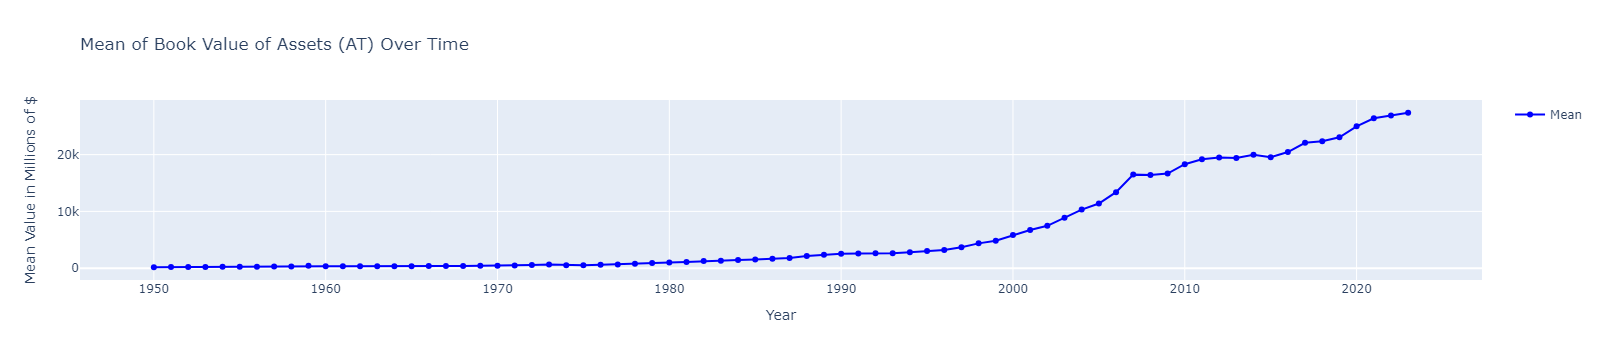

In [119]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Book Value of Assets (AT) Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value in Millions of $'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

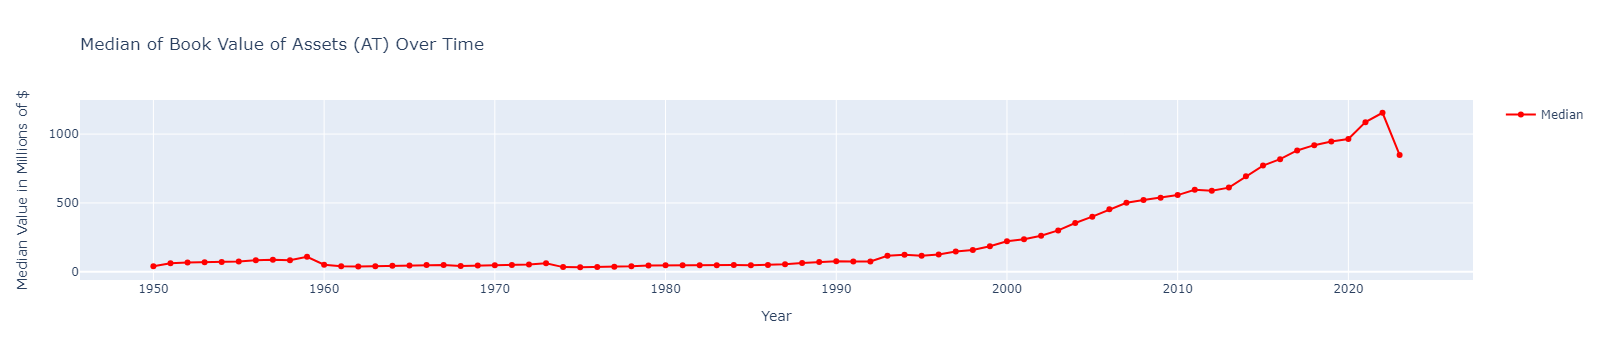

In [120]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Book Value of Assets (AT) Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value in Millions of $'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [121]:
def mean_median_of_column_by_year(df, year, column_name='sale'):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    return df_year[column_name].mean(), df_year[column_name].median()

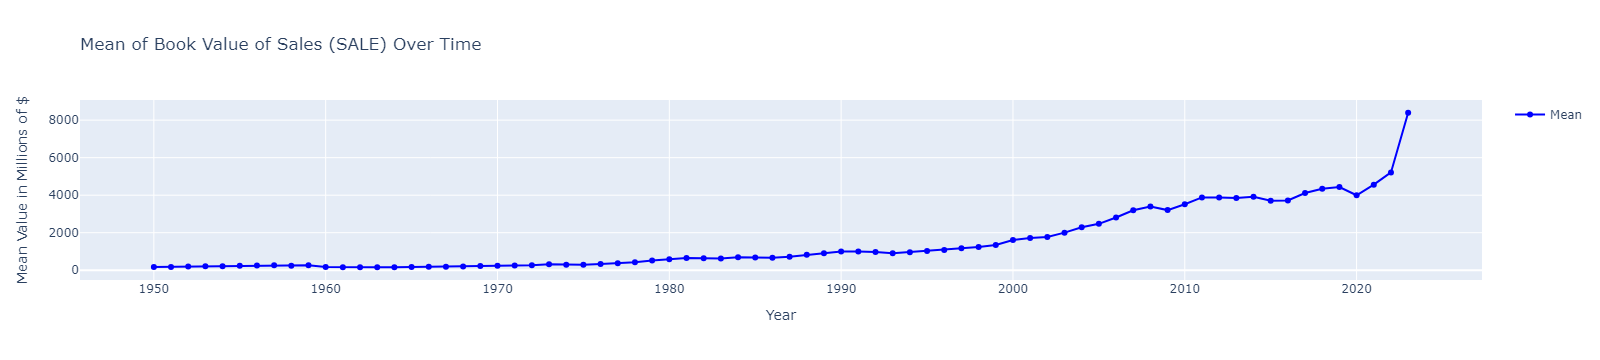

In [122]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Book Value of Sales (SALE) Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value in Millions of $'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

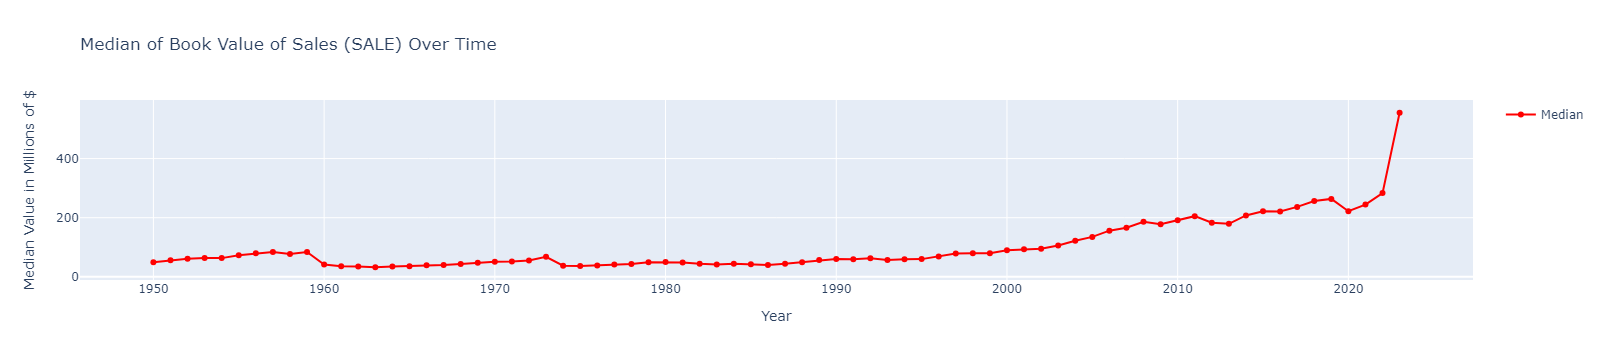

In [123]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Book Value of Sales (SALE) Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value in Millions of $'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [124]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 'dlc', 'dltt'
    return (df_year[column_name_1] + df_year[column_name_2]).mean(), (df_year[column_name_1] + df_year[column_name_2]).median() 

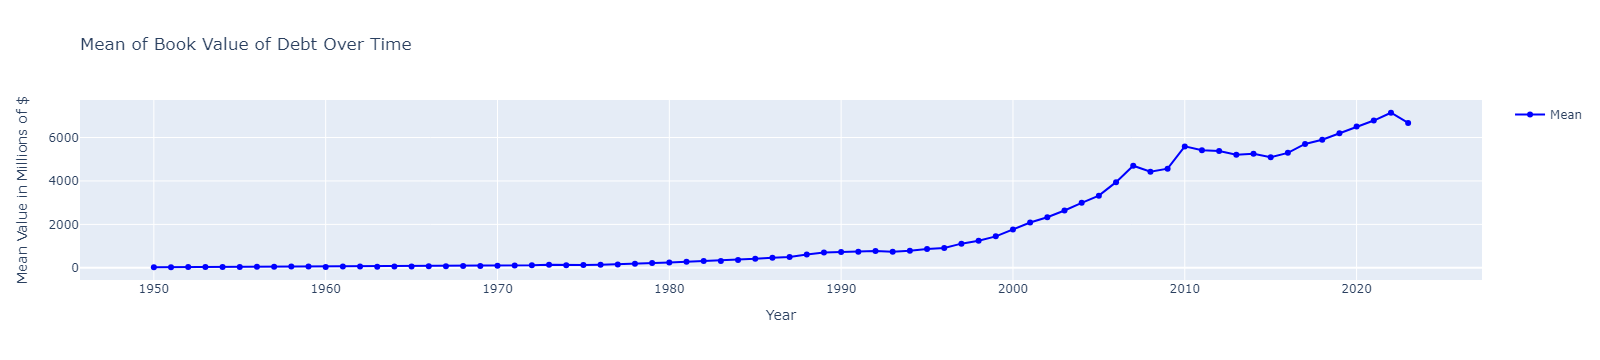

In [125]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Book Value of Debt Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value in Millions of $'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

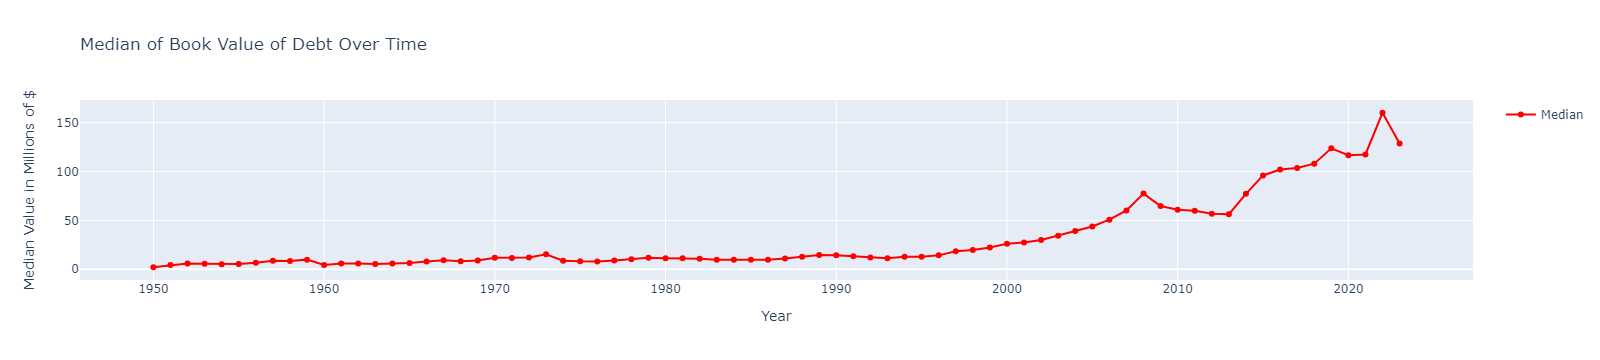

In [126]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Book Value of Debt Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value in Millions of $'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [127]:
def mean_median_of_column_by_year(df, year, column_name='dv'):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    return df_year[column_name].mean(), df_year[column_name].median()

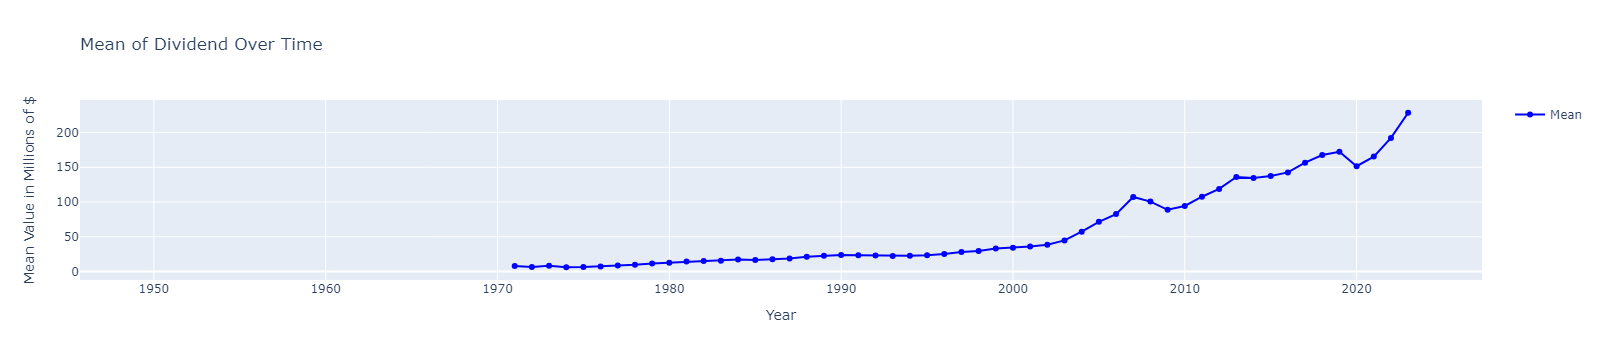

In [128]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Dividend Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value in Millions of $'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

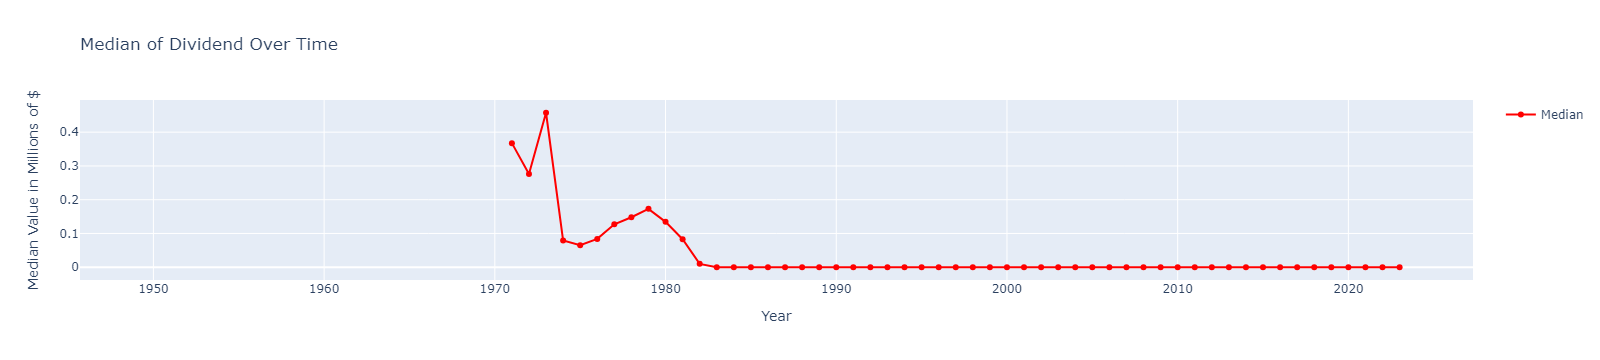

In [129]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Dividend Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value in Millions of $'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [130]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 'dltis', 'at'
    return (df_year[column_name_1] / df_year[column_name_2]).mean(), (df_year[column_name_1] / df_year[column_name_2]).median() 

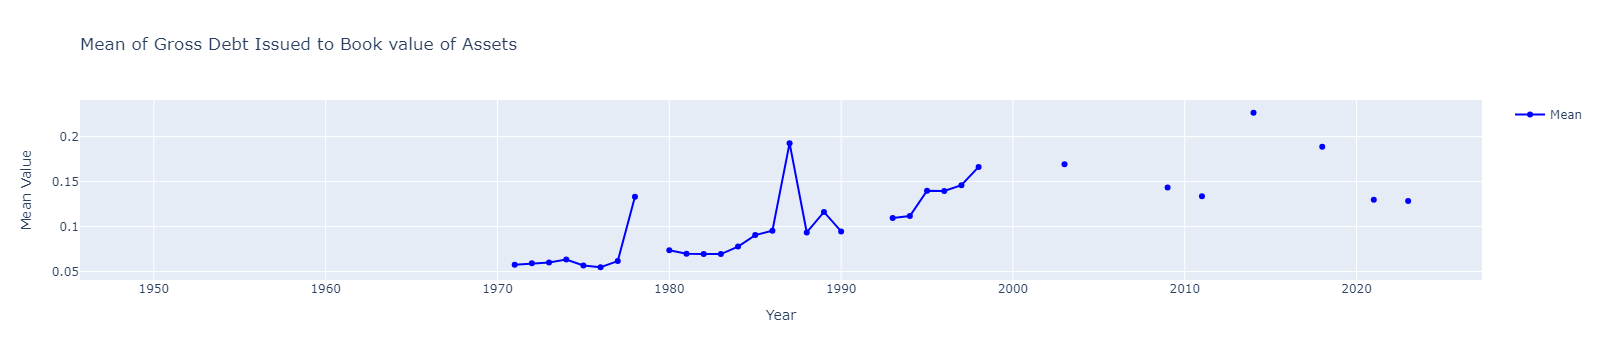

In [131]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

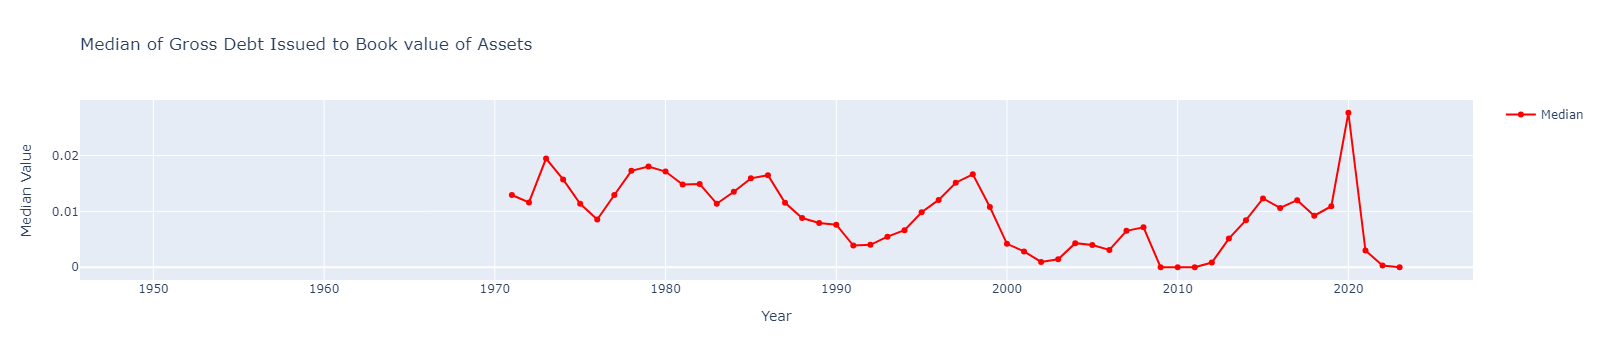

In [132]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [133]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 'dlc', 'at'
    return (df_year[column_name_1] / df_year[column_name_2]).mean(), (df_year[column_name_1] / df_year[column_name_2]).median() 

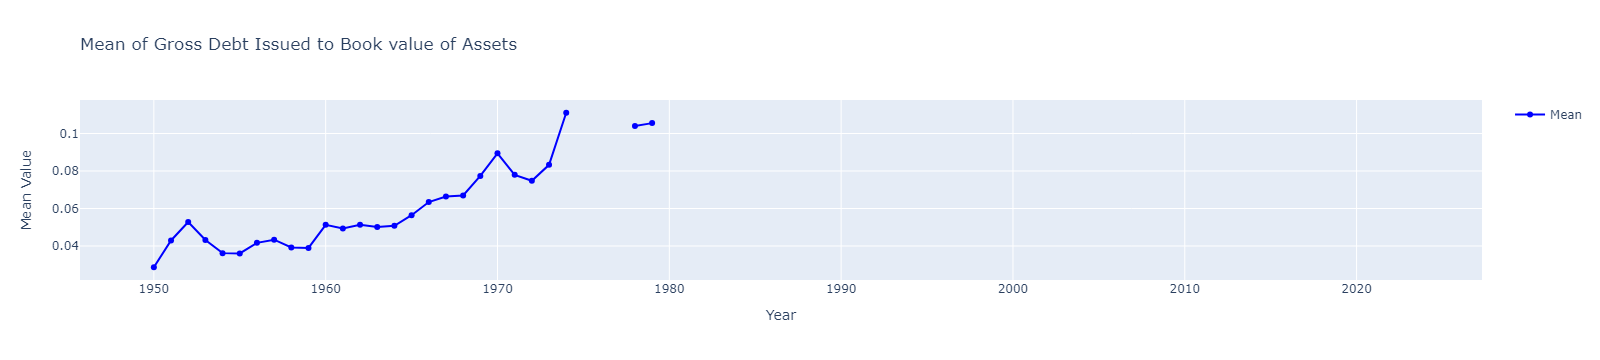

In [134]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

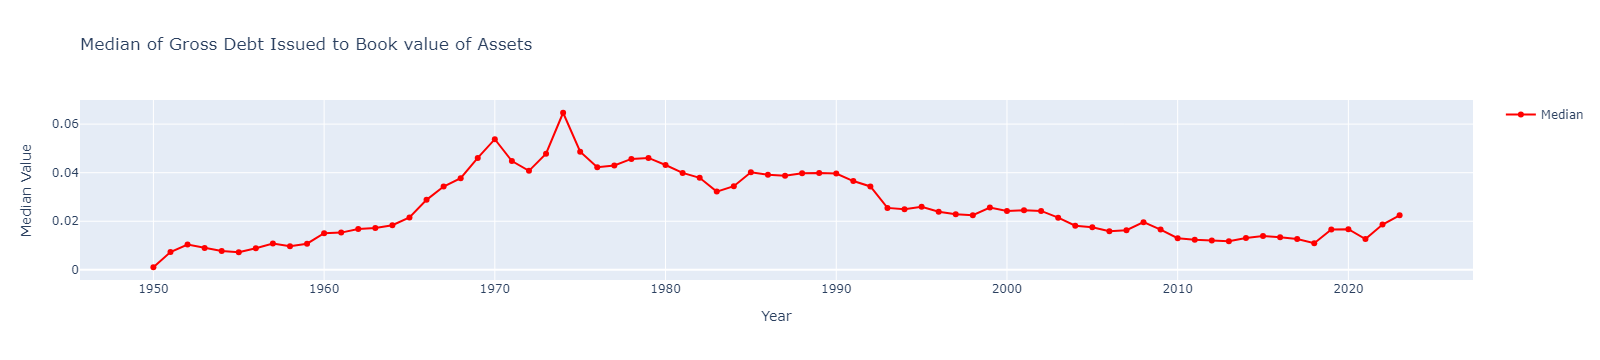

In [135]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [136]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    df_year['net_debt_issued'] = df_year['dltis'] - df_year['dltr'] + df_year['dlcch']
    df_year['net_debt_issued_ratio'] = df_year['net_debt_issued'] / df_year['at']
    return df_year['net_debt_issued_ratio'].mean(), df_year['net_debt_issued_ratio'].median()

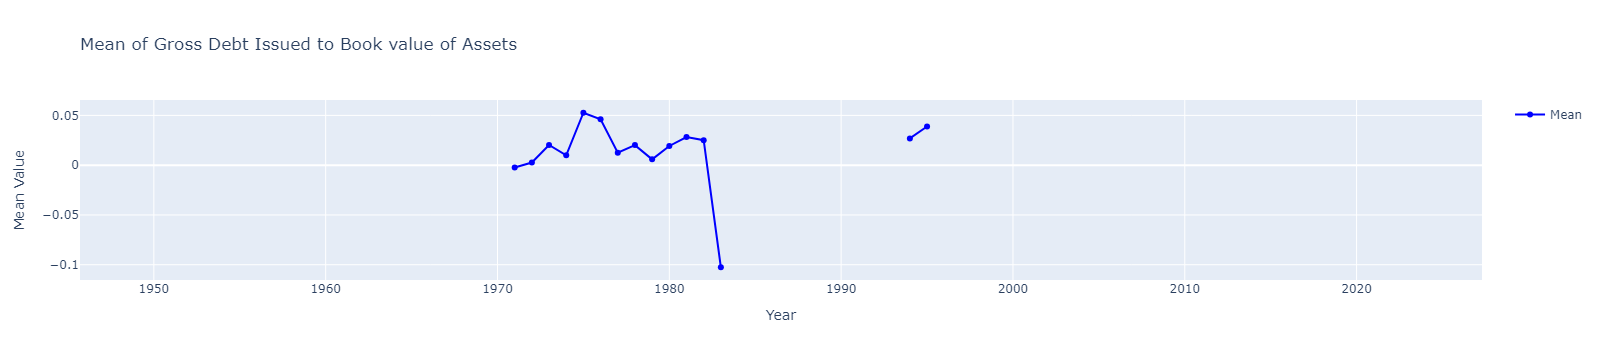

In [137]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

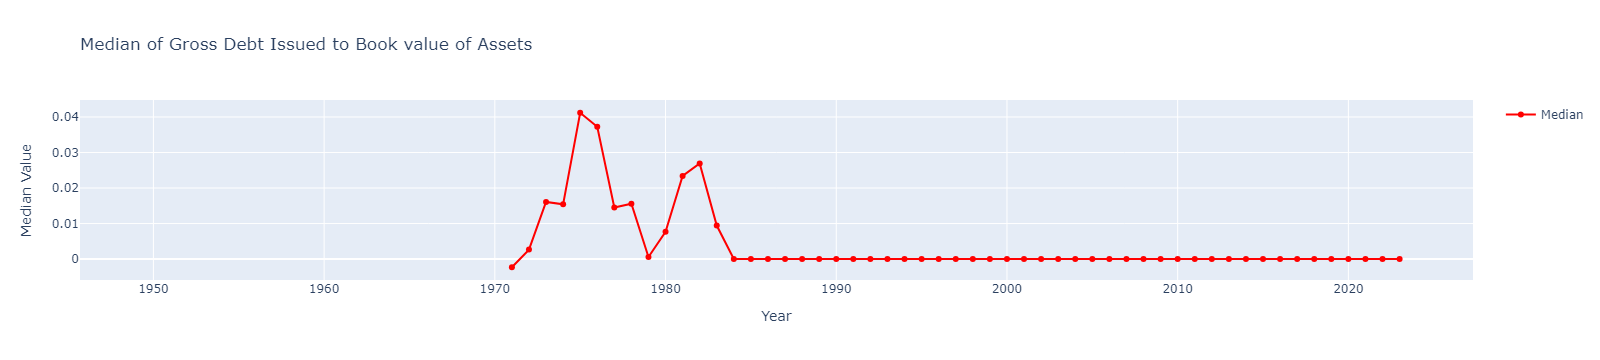

In [138]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [139]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    df_year['book_leverage'] = (df_year['dltt'] + df_year['dlc']) / (df_year['dltt'] + df_year['dlc'] + df_year['seq'])
    return df_year['book_leverage'].mean(), df_year['book_leverage'].median()

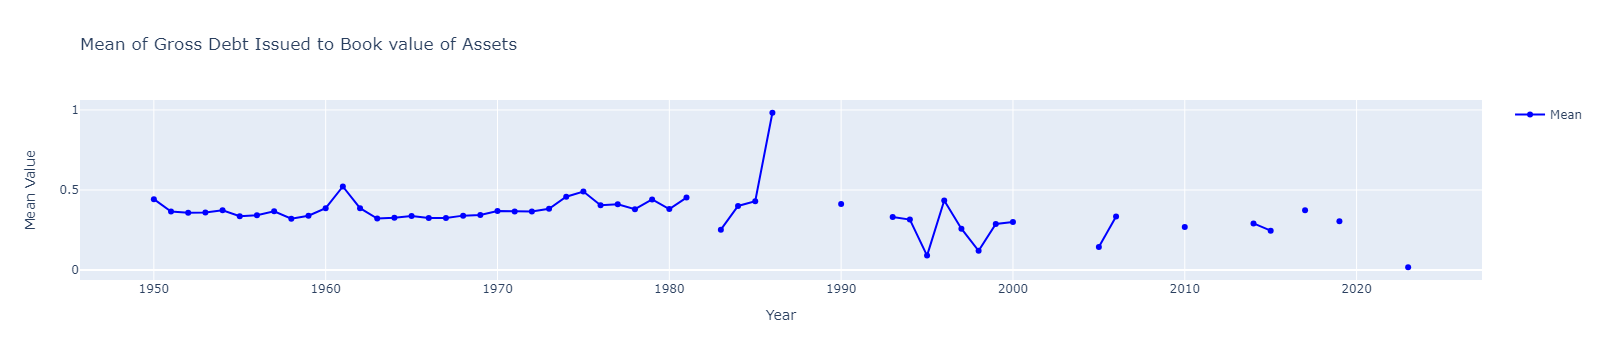

In [140]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

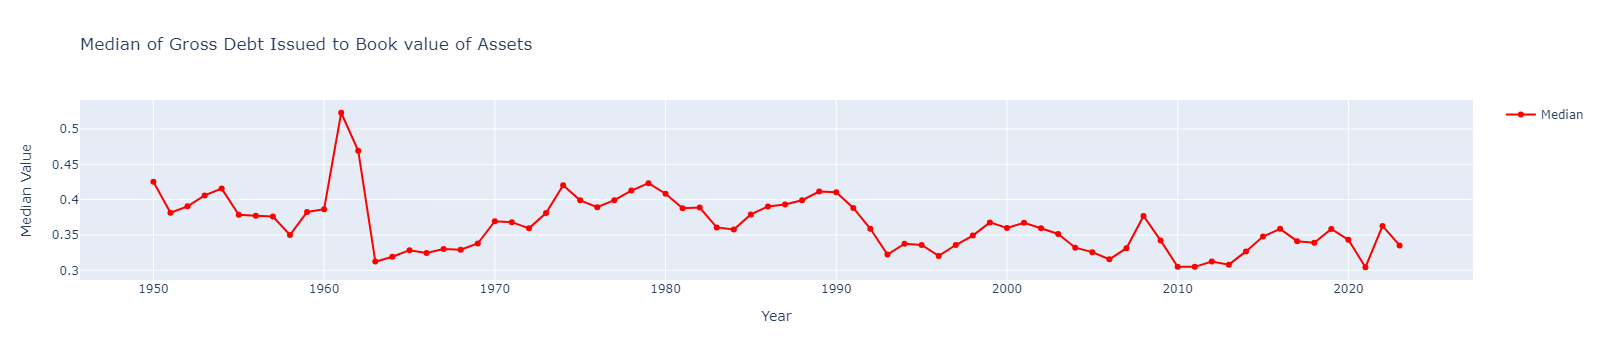

In [141]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [142]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 'ppent', 'at'
    return (df_year[column_name_1] / df_year[column_name_2]).mean(), (df_year[column_name_1] / df_year[column_name_2]).median() 

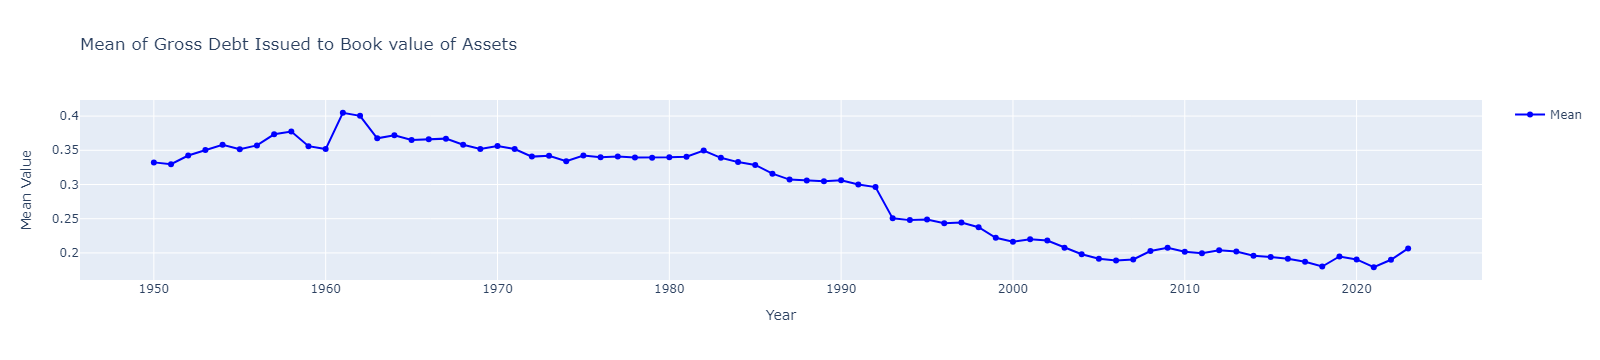

In [143]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

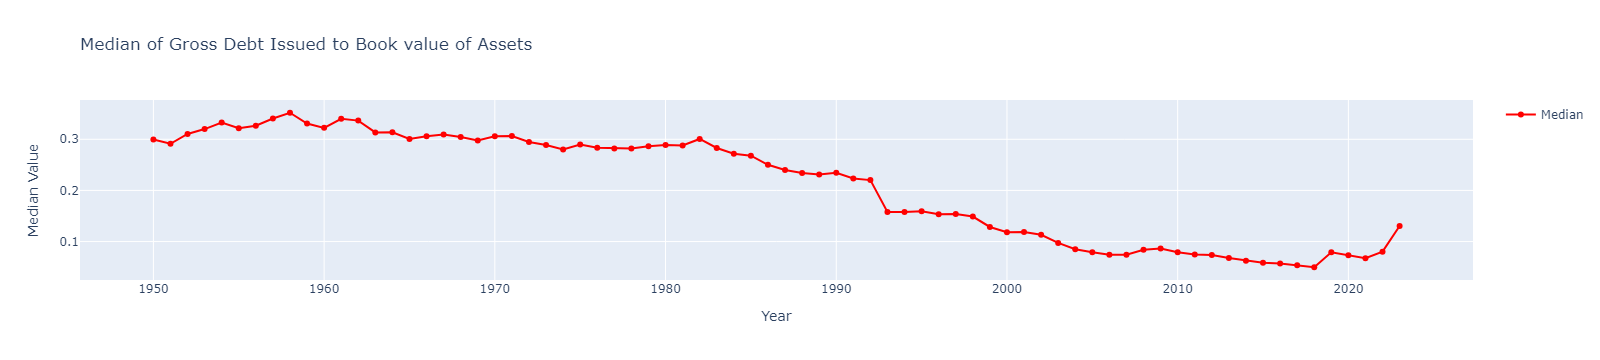

In [144]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [145]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 'mkvalt', 'at'
    return (df_year[column_name_1] / df_year[column_name_2]).mean(), (df_year[column_name_1] / df_year[column_name_2]).median() 

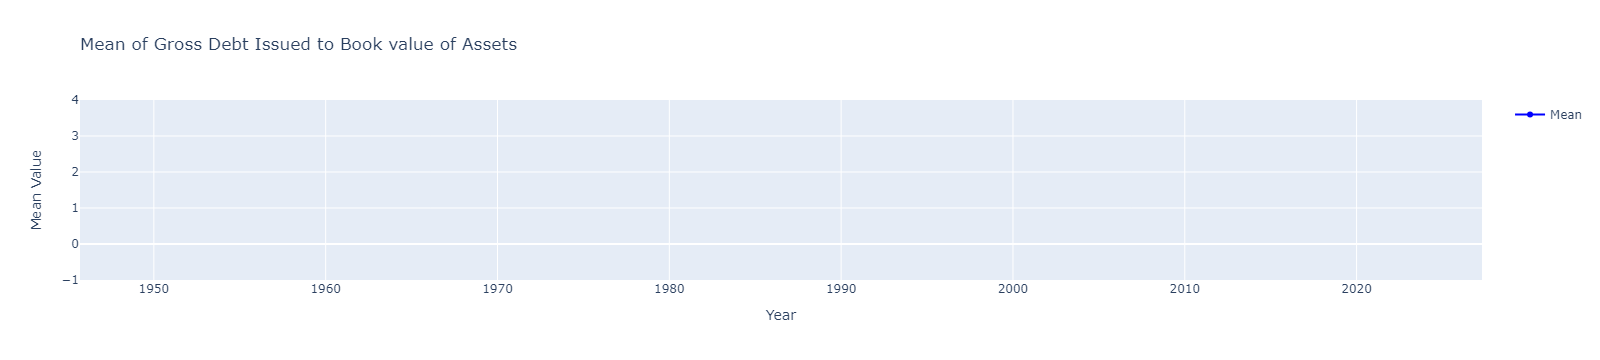

In [146]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

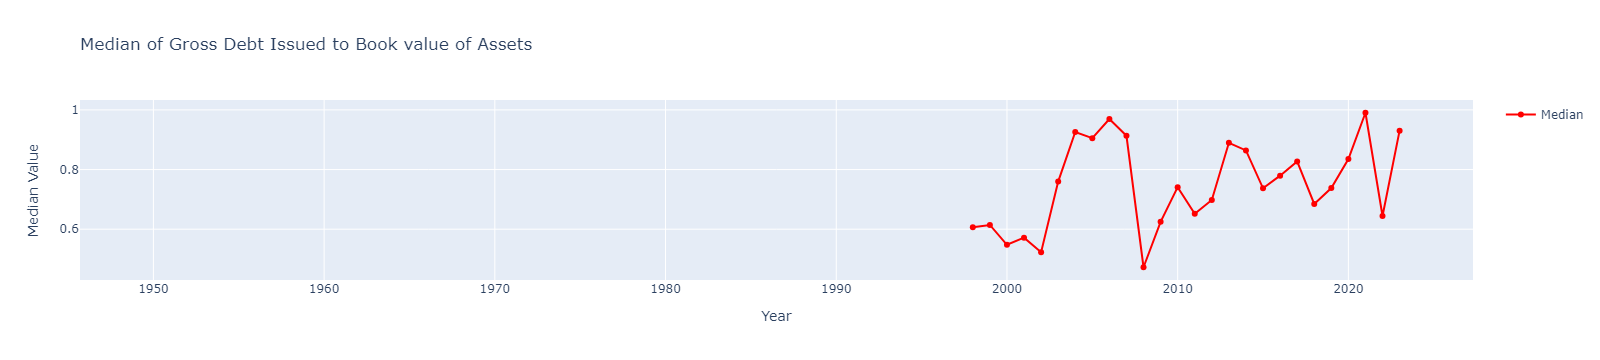

In [147]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [148]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 'ni', 'at'
    return (df_year[column_name_1] / df_year[column_name_2]).mean(), (df_year[column_name_1] / df_year[column_name_2]).median() 

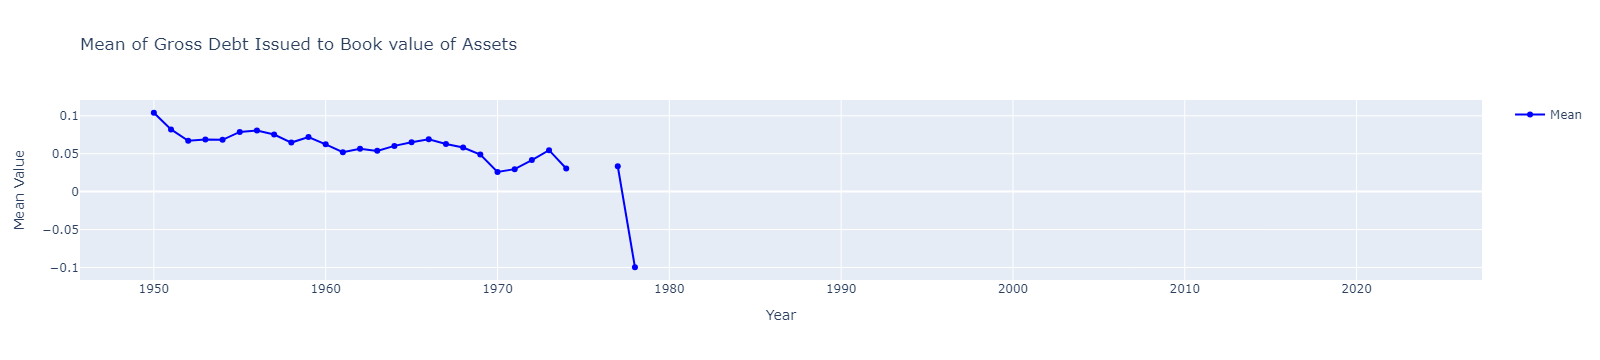

In [149]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

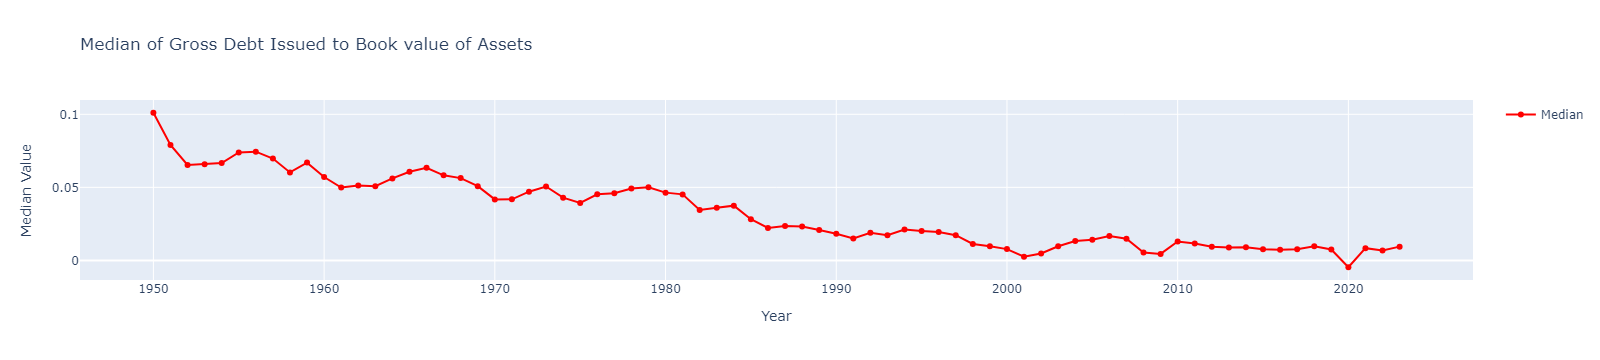

In [150]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [151]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    df_year['wc_ta'] = (df_year['act'] - df_year['lct']) / df_year['at']
    return df_year['wc_ta'].mean(),  df_year['wc_ta'].median()

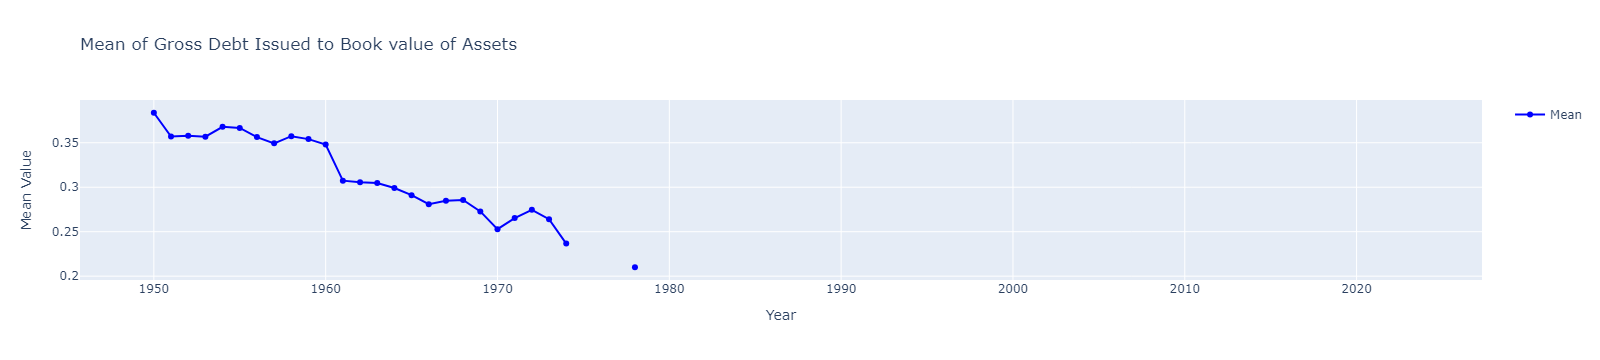

In [152]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

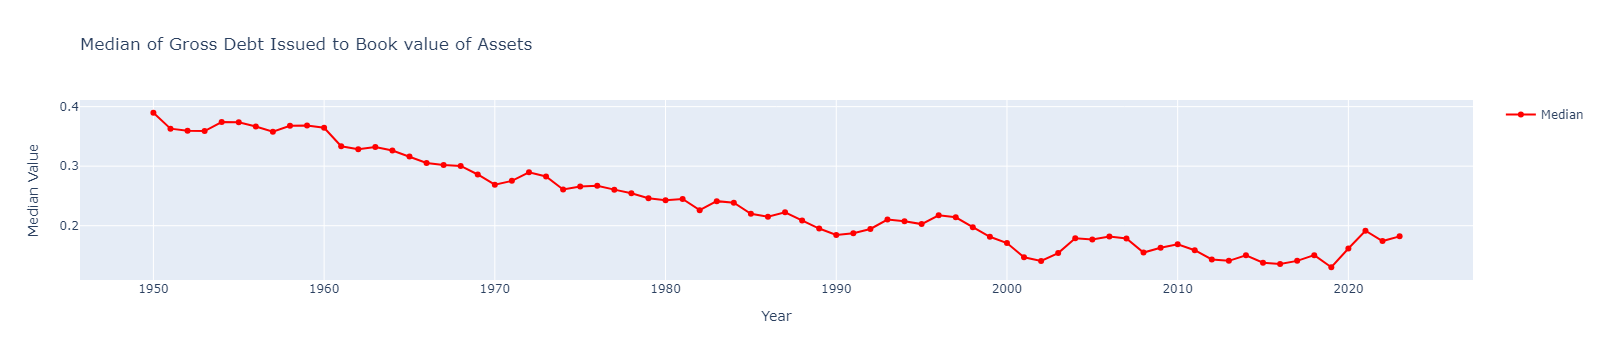

In [153]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [154]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 're', 'at'
    return (df_year[column_name_1] / df_year[column_name_2]).mean(), (df_year[column_name_1] / df_year[column_name_2]).median() 

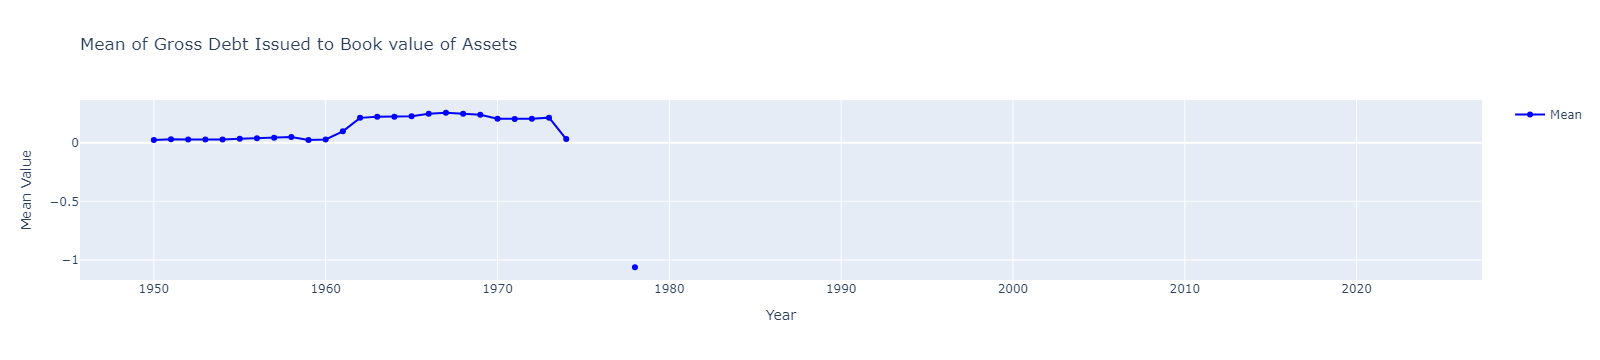

In [155]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

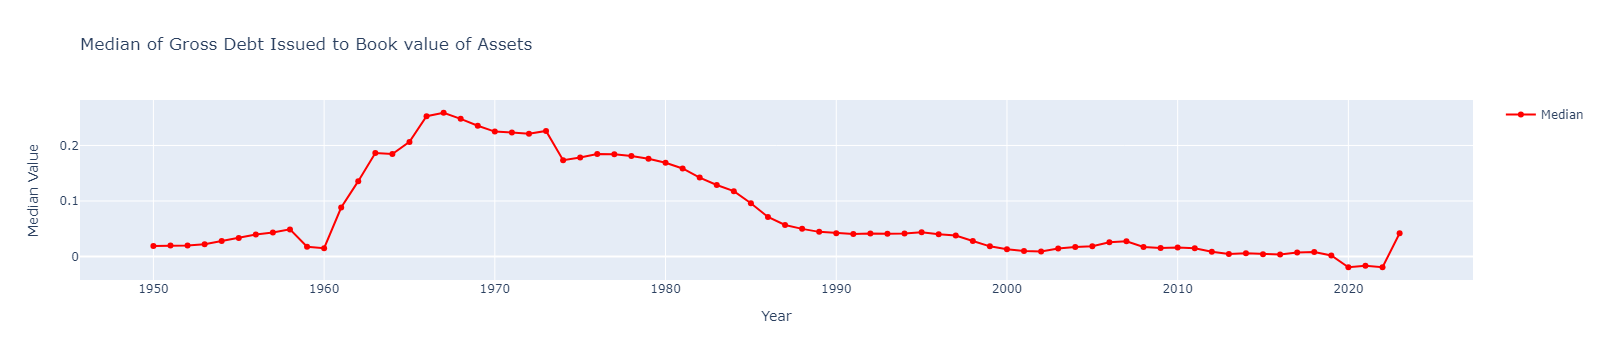

In [156]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [157]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 'oiadp', 'at'
    return (df_year[column_name_1] / df_year[column_name_2]).mean(), (df_year[column_name_1] / df_year[column_name_2]).median() 

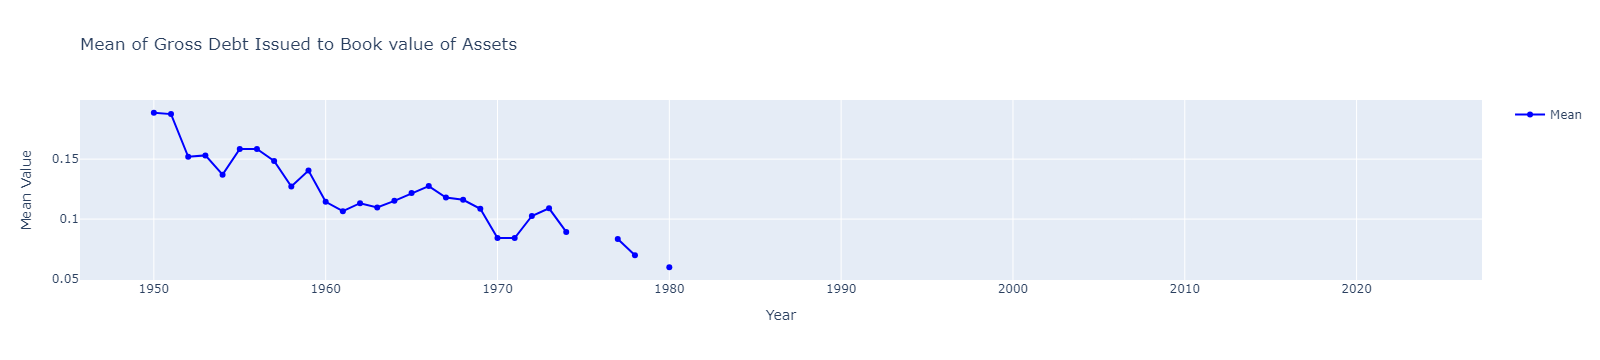

In [158]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

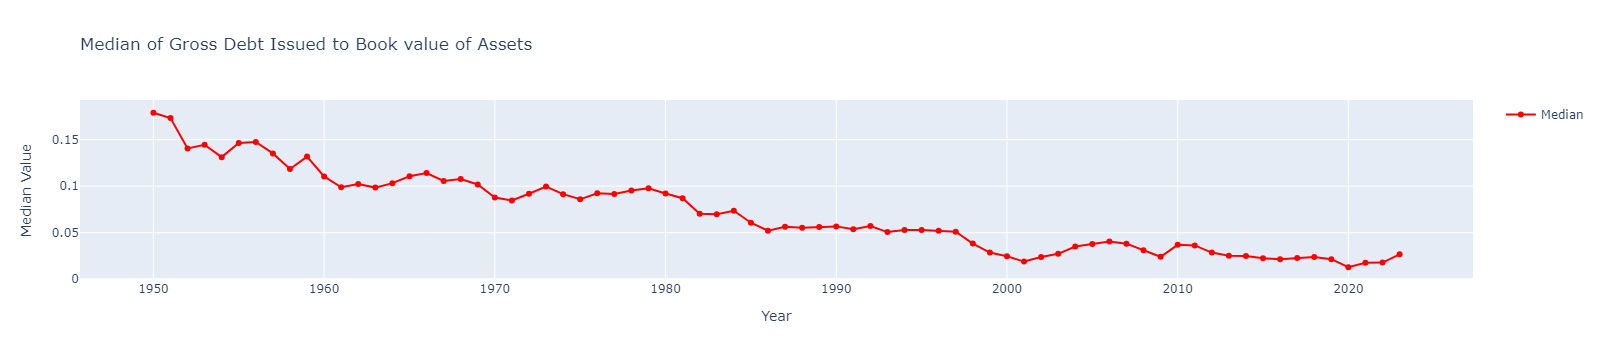

In [159]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [160]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    df_year['mv_tl'] = (df_year['prcc_f'] * df_year['csho']) / df_year['lt']
    return df_year['mv_tl'].mean(),  df_year['mv_tl'].median()

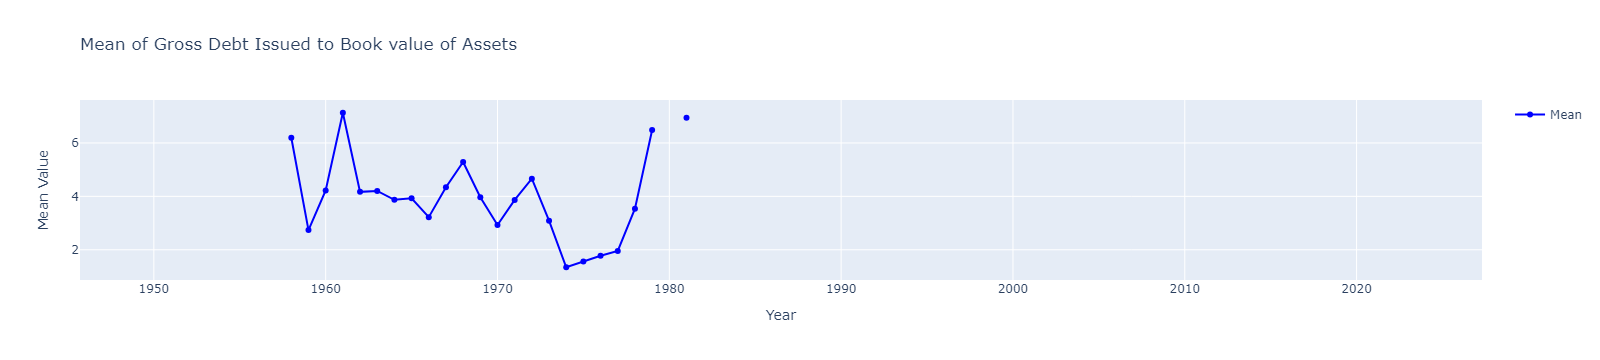

In [161]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

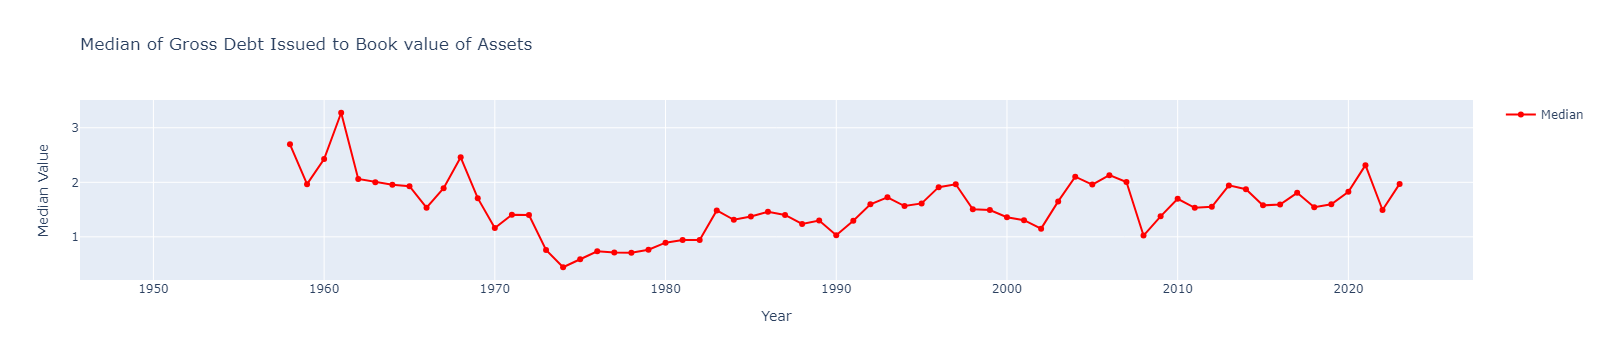

In [162]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [163]:
def mean_median_of_column_by_year(df, year):   
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    column_name_1, column_name_2 = 'sale', 'at'
    return (df_year[column_name_1] / df_year[column_name_2]).mean(), (df_year[column_name_1] / df_year[column_name_2]).median() 

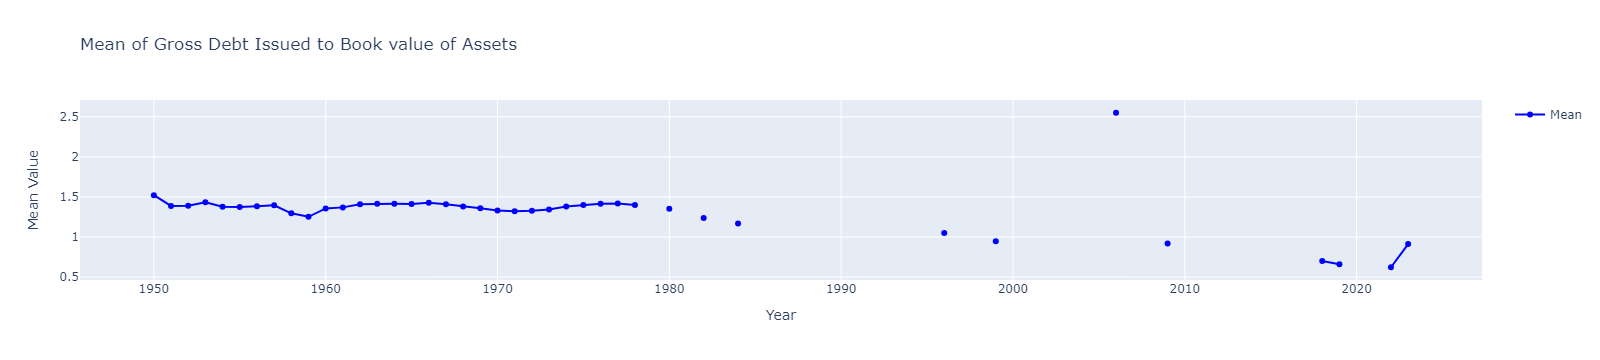

In [164]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

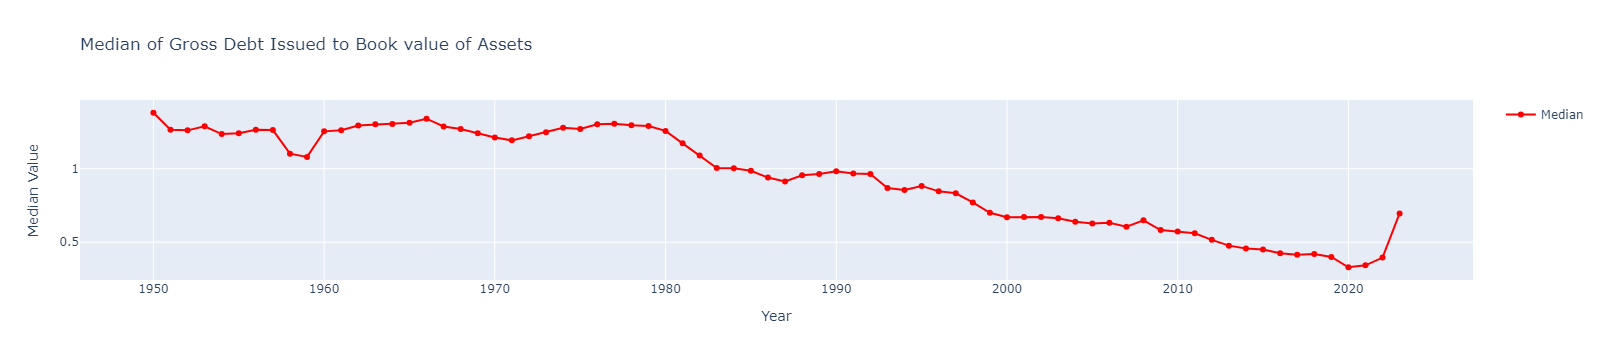

In [165]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [166]:
def mean_median_of_column_by_year(df, year):
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]
    # Return the mean and median of the specified column
    df_year['wc_ta'] = (df_year['act'] - df_year['lct']) / df_year['at']
    df_year['re_ta'] = df_year['re'] / df_year['at']
    df_year['ebit_ta'] = df_year['oiadp'] / df_year['at']
    df_year['mv_tl'] = (df_year['prcc_f'] * df_year['csho']) / df_year['lt']
    df_year['sales_ta'] = df_year['sale'] / df_year['at']
    
    # Calculate the Altman Z-Score
    df_year['z_score'] = (1.2 * df_year['wc_ta']) + \
                         (1.4 * df_year['re_ta']) + \
                         (3.3 * df_year['ebit_ta']) + \
                         (0.6 * df_year['mv_tl']) + \
                         (0.99 * df_year['sales_ta'])
    return df_year['z_score'].mean(), df_year['z_score'].median()
    

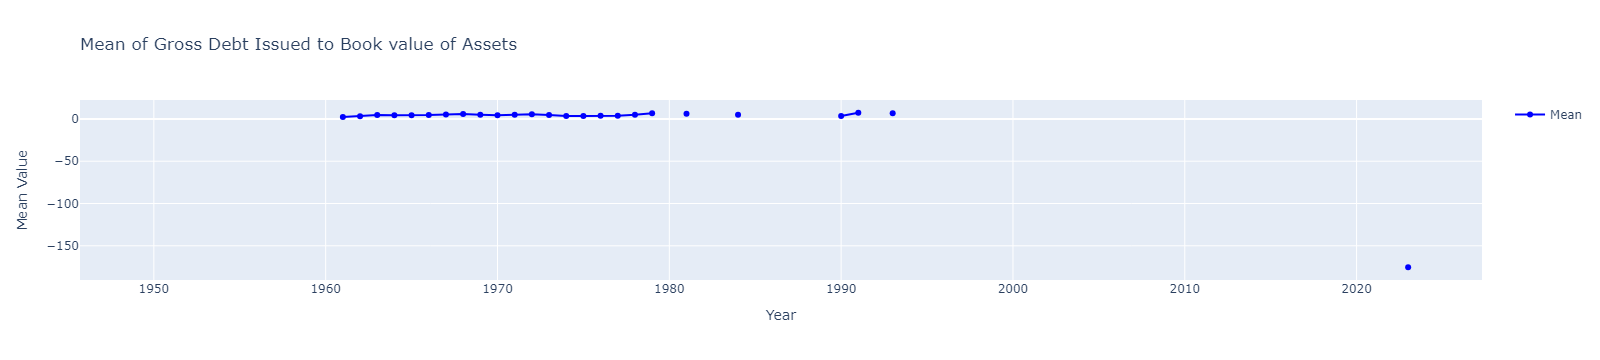

In [167]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))

# Compute mean and median for each year
for year in years:
    mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
    means.append(mean_val)
    medians.append(median_val)

# Create trace for the mean
mean_trace = go.Scatter(
    x=years,
    y=means,
    mode='lines+markers',
    name='Mean',
    marker=dict(color='blue'),
    line=dict(shape='linear')
)

# Layout for mean
mean_layout = go.Layout(
    title='Mean of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Mean Value'),
    showlegend=True
)

# Figure for mean
mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# Plot the mean within the notebook
iplot(mean_fig)

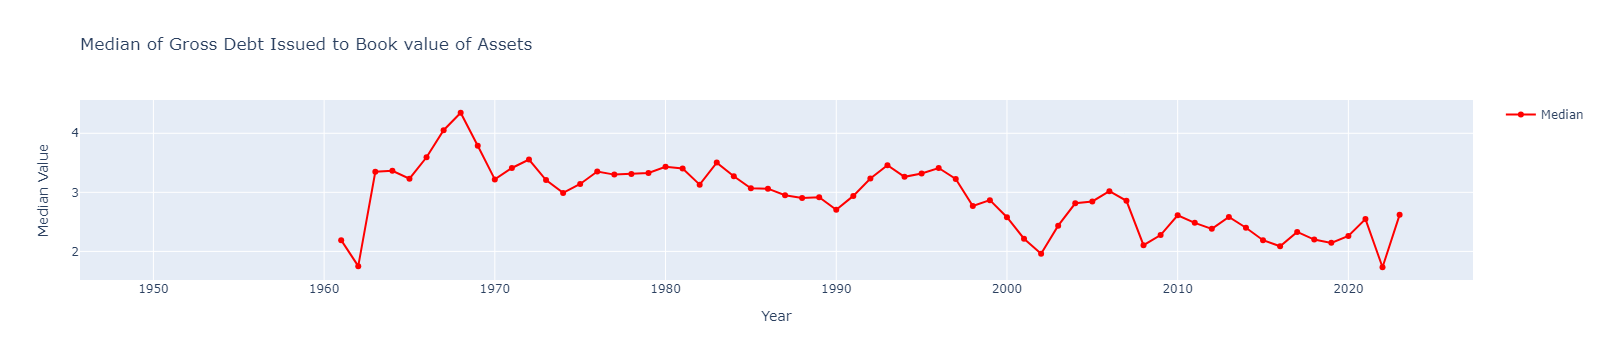

In [168]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [169]:
def mean_median_of_column_by_year(df, year):
    # Filter the dataframe for the given year
    df_year = df[df['datadate'].dt.year == year]

    # Return the mean and median of the specified column
    # Calculate rolling average for 'at' and 'sale_to_at_avg'
    df_year['at_rolling_avg'] = df_year['at'].rolling(window=2).mean()
    df_year['sale_to_at_avg'] = df_year['sale'] / df_year['at_rolling_avg']
    df_year['sale_to_at_avg'].mean(),df_year['sale_to_at_avg'].median()

In [170]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Activate the notebook mode for Plotly
init_notebook_mode(connected=True)

# Initialize lists to store mean and median values
means = []
medians = []
years = list(range(1950, 2024))
# for year in years:
#     print(mean_median_of_column_by_year(compustat_copy, year))





# # Compute mean and median for each year
# for year in years:
#     mean_val, median_val = mean_median_of_column_by_year(compustat_copy, year)
#     means.append(mean_val)
#     medians.append(median_val)

# # Create trace for the mean
# mean_trace = go.Scatter(
#     x=years,
#     y=means,
#     mode='lines+markers',
#     name='Mean',
#     marker=dict(color='blue'),
#     line=dict(shape='linear')
# )

# # Layout for mean
# mean_layout = go.Layout(
#     title='Mean of Gross Debt Issued to Book value of Assets',
#     xaxis=dict(title='Year'),
#     yaxis=dict(title='Mean Value'),
#     showlegend=True
# )

# # Figure for mean
# mean_fig = go.Figure(data=[mean_trace], layout=mean_layout)

# # Plot the mean within the notebook
# iplot(mean_fig)

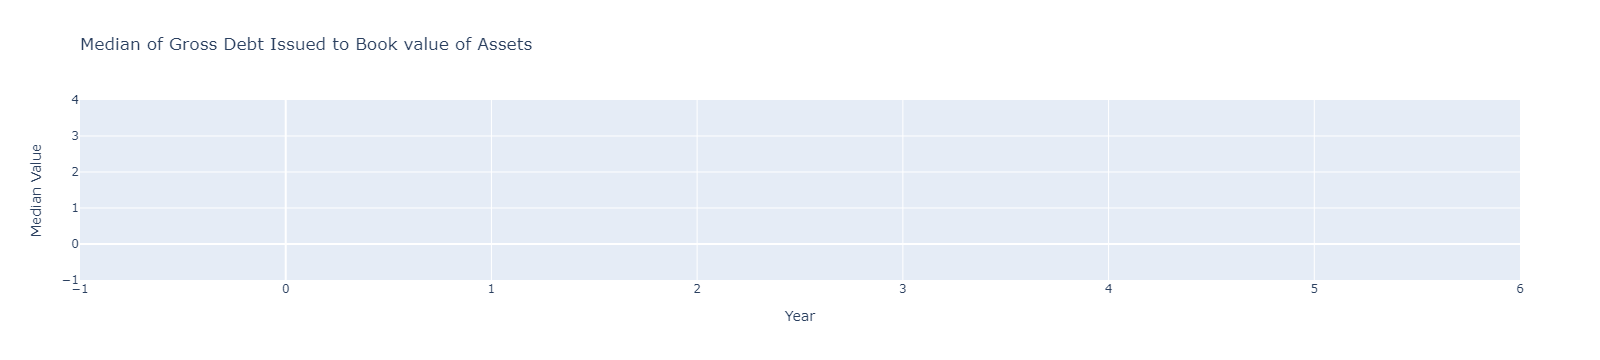

In [171]:
# Create trace for the median
median_trace = go.Scatter(
    x=years,
    y=medians,
    mode='lines+markers',
    name='Median',
    marker=dict(color='red'),
    line=dict(shape='linear')
)

# Layout for median
median_layout = go.Layout(
    title='Median of Gross Debt Issued to Book value of Assets',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Median Value'),
    showlegend=True
)

# Figure for median
median_fig = go.Figure(data=[median_trace], layout=median_layout)

# Plot the median within the notebook
iplot(median_fig)


In [172]:
compustat_data_copy = compustat_data.copy(deep=True)

In [173]:
compustat_data_copy.columns

Index(['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'cusip', 'conm',
       ...
       'priusa', 'sic', 'spcindcd', 'spcseccd', 'spcsrc', 'state', 'stko',
       'weburl', 'dldte', 'ipodate'],
      dtype='object', length=981)

In [174]:
from pandas.tseries.offsets import MonthEnd
def lag_data(compustat_data):
    # Ensure that 'datadate' is a datetime
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])

    # Create a new column for the lagged date by adding one month
    compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)

    return compustat_data

# Apply the lagging function to your DataFrame
compustat_data_copy = lag_data(compustat_data_copy)

In [175]:
def compute_book_value(compustat_data, start_year=1970, end_year=2022):
    # Ensure that 'datadate' is a datetime
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    
    # Lag the data by one month
    compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)
    
    # Initialize an empty DataFrame for the results
    book_value_df = pd.DataFrame()
    
    for year in range(start_year, end_year + 1):
        # Filter for January of the given year
        january_data = compustat_data[(compustat_data['lagged_date'].dt.year == year) &
                                      (compustat_data['lagged_date'].dt.month == 1)]
        
        # Group by 'gvkey' and calculate the book value per company
        january_data_grouped = january_data.groupby('gvkey').agg({
            'at': 'sum',
            'lt': 'sum'
        }).reset_index()
        
        january_data_grouped['BookValue'] = january_data_grouped['at'] - january_data_grouped['lt']
        january_data_grouped['Year'] = year
        
        # Append the results to the DataFrame
        book_value_df = pd.concat([book_value_df, january_data_grouped[['gvkey', 'Year', 'BookValue']]], ignore_index=True)
    
    return book_value_df


book_value_results = compute_book_value(compustat_data_copy)
book_value_results.head()

gvkey  Year  BookValue
0   1000  1970     10.211
1   1002  1970      6.533
2   1010  1970    192.559
3   1020  1970     24.097
4   1026  1970     19.977

In [176]:
def compute_avg_cash_flow(compustat_data, start_year=1990, end_year=2022):
    # Convert datadate to datetime and create lagged_date
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)

    # Initialize an empty DataFrame for the results
    cash_flow_df = pd.DataFrame()

    for year in range(start_year, end_year + 1):
        # Filter for January of the given year in lagged data
        january_filter = (compustat_data['lagged_date'].dt.year == year) & (compustat_data['lagged_date'].dt.month == 1)
        january_data = compustat_data[january_filter]

        # Perform the rolling computation on the filtered data
        january_data['AvgCashFlow'] = january_data.groupby('gvkey')['oancf'].transform(lambda x: x.rolling(window=60, min_periods=1).mean())

        # Keep only the rows for January of the year
        january_data = january_data[january_filter]

        # Keep only the necessary columns
        january_data = january_data[['gvkey', 'lagged_date', 'AvgCashFlow']]
        
        # Rename columns and adjust types
        january_data.rename(columns={'lagged_date': 'Year'}, inplace=True)
        january_data['Year'] = january_data['Year'].dt.year

        # Append the results
        cash_flow_df = pd.concat([cash_flow_df, january_data], ignore_index=True)

    return cash_flow_df

# Assuming compustat_data_copy is your DataFrame
avg_cash_flow_results = compute_avg_cash_flow(compustat_data_copy)
print(avg_cash_flow_results.head())


   gvkey  Year  AvgCashFlow
0   1010  1990      100.832
1   1011  1990       -0.525
2   1019  1990        3.623
3   1020  1990       45.182
4   1034  1990        9.456


In [177]:
def compute_avg_revenue(compustat_data, start_year=1970, end_year=2022):
    # Ensure that 'datadate' is a datetime
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    
    # Lag the data by one month
    compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)
    
    # Initialize an empty DataFrame for the results
    revenue_df = pd.DataFrame(columns=['Year', 'gvkey', 'AvgRevenue'])
    
    for year in range(start_year, end_year + 1):
        # Filter for January of the given year
        january_data = compustat_data[(compustat_data['lagged_date'].dt.year == year) & (compustat_data['lagged_date'].dt.month == 1)]
        
        # Group by 'gvkey' and calculate the rolling average of revenue
        # Assuming the revenue column is named 'revt'
        january_data['AvgRevenue'] = january_data.groupby('gvkey')['sale'].transform(lambda x: x.rolling(window=60, min_periods=1).mean())
        
        # Select only the relevant columns and rename for clarity
        january_results = january_data[['gvkey', 'lagged_date', 'AvgRevenue']].rename(columns={'lagged_date': 'Year'})
        
        # Convert the 'Year' to just the year part
        january_results['Year'] = january_results['Year'].dt.year
        
        # Append the results to the DataFrame
        revenue_df = pd.concat([revenue_df, january_results], ignore_index=True)
    
    return revenue_df

avg_revenue_results = compute_avg_revenue(compustat_data_copy)
print(avg_revenue_results.head())


   Year gvkey  AvgRevenue
0  1970  1000      37.392
1  1970  1002      27.939
2  1970  1010     320.200
3  1970  1020      40.926
4  1970  1026      10.411


In [178]:
# def compute_avg_dividends(compustat_data, start_year=1970, end_year=2022):
#     # Ensure that 'datadate' is a datetime type
#     compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    
#     # Lag the data by one month
#     compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)
    
#     # Replace NaN values with zeros in the 'dv' column
#     compustat_data['dv'] = compustat_data['dv'].fillna(0)
    
#     # Initialize an empty DataFrame for the results
#     dividends_df = pd.DataFrame(columns=['Year', 'gvkey', 'AvgDividends'])
    
#     # Group by 'gvkey' and calculate the rolling average for each 'gvkey'
#     rolling_dividends = compustat_data.groupby('gvkey')['dv'].rolling(window=60, min_periods=1).mean().reset_index()
    
#     # Merge the rolling average with the original data to align with the 'lagged_date'
#     merged_data = pd.merge(compustat_data, rolling_dividends, on=['gvkey', 'dv'], how='left')
    
#     for year in range(start_year, end_year + 1):
#         # Filter for January of the given year
#         january_data = merged_data[(merged_data['lagged_date'].dt.year == year) & 
#                                    (merged_data['lagged_date'].dt.month == 1)]
        
#         # Select only the relevant columns and rename for clarity
#         january_data = january_data[['gvkey', 'lagged_date', 'dv_y']].rename(columns={'lagged_date': 'Year', 'dv_y': 'AvgDividends'})
        
#         # Convert the 'Year' to just the year part
#         january_data['Year'] = january_data['Year'].dt.year
        
#         # Append the results to the DataFrame
#         dividends_df = pd.concat([dividends_df, january_data], ignore_index=True)
    
#     return dividends_df

# # Assuming compustat_data_copy is your DataFrame
# avg_dividends_results = compute_avg_dividends(compustat_data_copy)
# print(avg_dividends_results.head())


In [179]:
# def compute_avg_gross_investment(compustat_data, start_year=1970, end_year=2022):
#     # Ensure that 'datadate' is a datetime type
#     compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    
#     # Lag the data by one month
#     compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)
    
#     # Initialize an empty DataFrame for the results
#     investments_df = pd.DataFrame(columns=['Year', 'gvkey', 'AvgGrossInvestment'])
    
#     # Group by 'gvkey' and calculate the rolling average for each 'gvkey'
#     rolling_investments = compustat_data.groupby('gvkey')['capx'].rolling(window=60, min_periods=1).mean().reset_index()
    
#     # Merge the rolling average with the original data to align with the 'lagged_date'
#     merged_data = pd.merge(compustat_data, rolling_investments, on=['gvkey', 'capx'], how='left')
    
#     for year in range(start_year, end_year + 1):
#         # Filter for January of the given year
#         january_data = merged_data[(merged_data['lagged_date'].dt.year == year) & 
#                                    (merged_data['lagged_date'].dt.month == 1)]
        
#         # Select only the relevant columns and rename for clarity
#         january_data = january_data[['gvkey', 'lagged_date', 'capx_y']].rename(columns={'lagged_date': 'Year', 'capx_y': 'AvgGrossInvestment'})
        
#         # Convert the 'Year' to just the year part
#         january_data['Year'] = january_data['Year'].dt.year
        
#         # Append the results to the DataFrame
#         investments_df = pd.concat([investments_df, january_data], ignore_index=True)
    
#     # Backfill NaN values
#     investments_df['AvgGrossInvestment'] = investments_df['AvgGrossInvestment'].fillna(method='bfill')
    
#     return investments_df

# # Assuming compustat_data_copy is your DataFrame
# avg_gross_investment_results = compute_avg_gross_investment(compustat_data_copy)
# print(avg_gross_investment_results.head())


In [180]:
def compute_avg_gross_investment(compustat_data, start_year=1970, end_year=2022):
    # Ensure that 'datadate' is a datetime type
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    
    # Initialize an empty DataFrame for the results
    investments_df = pd.DataFrame(columns=['Year', 'gvkey', 'AvgGrossInvestment'])
    
    for year in range(start_year, end_year + 1):
        # Filter data up to the end of the previous year
        yearly_data = compustat_data[compustat_data['datadate'].dt.year < year]
        
        # Group by 'gvkey' and calculate the rolling average for each 'gvkey' up to that year
        rolling_investments = yearly_data.groupby('gvkey')['capx'].rolling(window=60, min_periods=1).mean().astype('float32').reset_index()
        
        # Get the last entry for each 'gvkey' which corresponds to the value at the beginning of the year
        last_entries = rolling_investments.groupby('gvkey').nth(-1)
        
        # Add the year and gvkey to the results DataFrame
        last_entries['Year'] = year
        investments_df = pd.concat([investments_df, last_entries[['gvkey', 'Year', 'capx']]], ignore_index=True)
    
    # Backfill NaN values
    investments_df['AvgGrossInvestment'] = investments_df['capx'].fillna(method='bfill').astype('float32')
    investments_df.drop(columns='capx', inplace=True)
    
    return investments_df

avg_gross_investment_results = compute_avg_gross_investment(compustat_data_copy)
print(avg_gross_investment_results.head())


   Year gvkey  AvgGrossInvestment
0  1970  1000            1.913500
1  1970  1002            0.360000
2  1970  1004            0.313250
3  1970  1010           19.235001
4  1970  1017            1.407000


In [181]:
def compute_avg_roa(compustat_data, start_year=1970, end_year=2022):
    # Ensure that 'datadate' is a datetime type and backfill 'ni' and 'at'
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    compustat_data['ni'] = compustat_data['ni'].fillna(method='bfill').fillna(0)
    compustat_data['at'] = compustat_data['at'].fillna(method='bfill').fillna(0)
    
    # Lag the data by one month
    compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)
    
    # Calculate ROA, avoiding division by zero
    compustat_data['ROA'] = compustat_data.apply(lambda x: x['ni'] / x['at'] if x['at'] != 0 else 0, axis=1)
    
    # Calculate the 60-month rolling average of ROA for each 'gvkey'
    compustat_data['rolling_avg_ROA'] = compustat_data.groupby('gvkey')['ROA'].transform(
        lambda x: x.rolling(window=60, min_periods=1).mean()
    )
    
    # Initialize an empty list to store the results
    results = []
    
    # Loop over each year and compute the average ROA for January
    for year in range(start_year, end_year + 1):
        january_data = compustat_data[
            (compustat_data['lagged_date'].dt.year == year) & (compustat_data['lagged_date'].dt.month == 1)
        ]
        january_data = january_data[['gvkey', 'lagged_date', 'rolling_avg_ROA']].copy()
        january_data.rename(columns={'lagged_date': 'Year', 'rolling_avg_ROA': 'AvgROA'}, inplace=True)
        january_data['Year'] = january_data['Year'].dt.year
        results.append(january_data)
    
    # Concatenate the list of DataFrames into one DataFrame
    roa_df = pd.concat(results, ignore_index=True)
    
    return roa_df

avg_roa_results = compute_avg_roa(compustat_data_copy)
print(avg_roa_results.head())

   gvkey  Year    AvgROA
0   1000  1970  0.014259
1   1002  1970  0.015641
2   1010  1970  0.044885
3   1020  1970 -0.006601
4   1026  1970  0.014096


In [182]:
# Function to calculate Asset Turnover for each year on January 1st
def calculate_asset_turnover(compustat_data):
    # Convert 'datadate' to a datetime type and lag it by one month
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)
    
    # Calculate the Asset Turnover Ratio
    # Here we assume that 'sale' for total sales is already present in the data
    # We use 'at' from the previous year as it is lagged to the start of the current year
    compustat_data['AssetTurnover'] = compustat_data['sale'] / compustat_data['at']
    
    # Filter the data for January of each year to get the Asset Turnover at the beginning of each year
    january_data = compustat_data[compustat_data['lagged_date'].dt.month == 1]
    january_data = january_data[['gvkey', 'lagged_date', 'AssetTurnover']].copy()
    january_data.rename(columns={'lagged_date': 'Year'}, inplace=True)
    january_data['Year'] = january_data['Year'].dt.year
    
    return january_data


asset_turnover = calculate_asset_turnover(compustat_data_copy)
asset_turnover.head()

gvkey  Year  AssetTurnover
0   1000  1962       0.635593
1   1000  1963       1.129944
2   1000  1964       1.028955
3   1000  1965       1.435028
4   1000  1966       0.730736

In [183]:
def compute_altman_z_score(compustat_data):
    # Ensure that 'datadate' is a datetime type
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])

    # Lag the data by one month to use the end-of-year data as the start of January next year
    compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)

    # Calculate the individual components of the Z-Score
    compustat_data['wc_ta'] = (compustat_data['act'] - compustat_data['lct']) / compustat_data['at']
    compustat_data['re_ta'] = compustat_data['re'] / compustat_data['at']
    compustat_data['ebit_ta'] = compustat_data['oiadp'] / compustat_data['at']
    compustat_data['mv_tl'] = (compustat_data['prcc_f'] * compustat_data['csho']) / compustat_data['lt']
    compustat_data['sales_ta'] = compustat_data['sale'] / compustat_data['at']

    # Handle potential division by zero or NA values
    for column in ['wc_ta', 're_ta', 'ebit_ta', 'mv_tl', 'sales_ta']:
        compustat_data[column].replace([np.inf, -np.inf], np.nan, inplace=True)
        compustat_data[column].fillna(0, inplace=True)

    # Calculate the Altman Z-Score
    compustat_data['z_score'] = (1.2 * compustat_data['wc_ta']) + \
                                      (1.4 * compustat_data['re_ta']) + \
                                      (3.3 * compustat_data['ebit_ta']) + \
                                      (0.6 * compustat_data['mv_tl']) + \
                                      (0.99 * compustat_data['sales_ta'])

    # Filter for January of each year to get the beginning-of-year values
    compustat_data_jan = compustat_data[compustat_data['lagged_date'].dt.month == 1]

    # Select only the relevant columns
    compustat_data_jan = compustat_data_jan[['gvkey', 'lagged_date', 'z_score']]

    # Rename columns for clarity
    compustat_data_jan.rename(columns={'lagged_date': 'Year', 'z_score': 'AltmanZ'}, inplace=True)

    # Convert the 'Year' to just the year part
    compustat_data_jan['Year'] = compustat_data_jan['Year'].dt.year

    return compustat_data_jan

# Assuming compustat_data is your DataFrame
z_score_results = compute_altman_z_score(compustat_data_copy)
print(z_score_results.head())


   gvkey  Year   AltmanZ
0   1000  1962  0.629237
1   1000  1963  1.118644
2   1000  1964  1.142959
3   1000  1965  1.976328
4   1000  1966  0.311913


In [184]:
def compute_ohlson_o_score(compustat_data, start_year=1970, end_year=2022):
    # Ensure 'datadate' is a datetime type and sort the DataFrame
    compustat_data['datadate'] = pd.to_datetime(compustat_data['datadate'])
    compustat_data.sort_values(by=['gvkey', 'datadate'], inplace=True)

    # Backfill or fill NA values for necessary columns
    fill_columns = ['lt', 'at', 'act', 'lct', 'ni', 'dp', 'prcc_f', 'csho']
    for col in fill_columns:
        compustat_data[col] = compustat_data[col].fillna(method='bfill').fillna(0)

    # Lag the data by one month to use the end of December data as the start of January next year
    compustat_data['lagged_date'] = compustat_data['datadate'] + MonthEnd(1)
    
    # Calculate the necessary components for the Ohlson O-score
    compustat_data['TLTA'] = compustat_data['lt'] / compustat_data['at']
    compustat_data['WCTA'] = (compustat_data['act'] - compustat_data['lct']) / compustat_data['at']
    compustat_data['CLCA'] = compustat_data['lct'] / compustat_data['act']
    compustat_data['OENEG'] = (compustat_data['lt'] > compustat_data['at']).astype(int)
    compustat_data['NITA'] = compustat_data['ni'] / compustat_data['at']
    compustat_data['FUTL'] = (compustat_data['ni'] + compustat_data['dp']) / compustat_data['lt']
    compustat_data['SIZE'] = np.log(compustat_data['at'])
    compustat_data['MVE_BVTD'] = (compustat_data['prcc_f'] * compustat_data['csho']) / compustat_data['lt']
    
    # Calculate the INTWO and CHIN components with a rolling window to check for negative net income in the past two years
    compustat_data['INTWO'] = compustat_data.groupby('gvkey')['ni'].rolling(window=2).apply(lambda x: np.any(x < 0), raw=False).reset_index(level=0, drop=True).fillna(method='bfill').fillna(0).astype(int)
    compustat_data['CHIN'] = compustat_data.groupby('gvkey')['ni'].diff() / compustat_data.groupby('gvkey')['at'].shift()
    compustat_data['CHIN'] = compustat_data['CHIN'].fillna(method='bfill').fillna(0)

    # Calculate the O-score
    compustat_data['O_score'] = -1.32 - (0.407 * compustat_data['SIZE']) + (6.03 * compustat_data['TLTA']) - \
                                 (1.43 * compustat_data['WCTA']) + (0.0757 * compustat_data['CLCA']) - \
                                 (1.72 * compustat_data['OENEG']) - (2.37 * compustat_data['NITA']) - \
                                 (1.83 * compustat_data['FUTL']) + (0.285 * compustat_data['INTWO']) - \
                                 (0.521 * compustat_data['CHIN']) + (0.593 * compustat_data['CHIN']) + \
                                 (0.717 * compustat_data['MVE_BVTD']) + (0.107 * compustat_data['MVE_BVTD'])

    # Initialize an empty DataFrame for the results
    ohlson_o_df = pd.DataFrame(columns=['Year', 'gvkey', 'OhlsonO'])

    for year in range(start_year, end_year + 1):
        # Filter for January of the given year
        january_data = compustat_data[(compustat_data['lagged_date'].dt.year == year) & 
                                      (compustat_data['lagged_date'].dt.month == 1)]

        # Select only the relevant columns and rename for clarity
        january_data = january_data[['gvkey', 'lagged_date', 'O_score']].rename(columns={'lagged_date': 'Year', 'O_score': 'OhlsonO'})

        # Convert the 'Year' to just the year part
        january_data['Year'] = january_data['Year'].dt.year

        # Append the results to the DataFrame
        ohlson_o_df = pd.concat([ohlson_o_df, january_data], ignore_index=True)

    return ohlson_o_df

# Assuming compustat_data_copy is your DataFrame
ohlson_o_score_results = compute_ohlson_o_score(compustat_data_copy)
print(ohlson_o_score_results.head())


   Year gvkey   OhlsonO
0  1970  1000  1.837350
1  1970  1002  0.831973
2  1970  1010 -0.161311
3  1970  1020  1.038929
4  1970  1026  1.732989


In [185]:
msf_master = pd.read_csv('msf_master.csv',low_memory=False)

In [186]:
msf_master.head()

PERMNO        date     PRC        RET  SHROUT    vwretd
0   10000  1985-12-31     NaN        NaN     NaN  0.043061
1   10000  1986-01-31 -4.3750          C  3680.0  0.009830
2   10000  1986-02-28 -3.2500  -0.257143  3680.0  0.072501
3   10000  1986-03-31 -4.4375   0.365385  3680.0  0.053887
4   10000  1986-04-30 -4.0000  -0.098592  3793.0 -0.007903

In [187]:
msf_master.dtypes

PERMNO      int64
date       object
PRC       float64
RET        object
SHROUT    float64
vwretd    float64
dtype: object

In [188]:
msf_master.isna().sum()

PERMNO         0
date           0
PRC       142068
RET        78605
SHROUT     36212
vwretd         0
dtype: int64

In [189]:
msf_master['date'] = pd.to_datetime(msf_master['date'],errors='coerce')
msf_master['PRC'] = pd.to_numeric(msf_master['PRC'],errors='coerce')
msf_master['PRC'] = msf_master['PRC'].abs()
msf_master['PRC'] = msf_master['PRC'].fillna(method='bfill')

In [190]:
msf_master.isna().sum()

PERMNO        0
date          0
PRC           0
RET       78605
SHROUT    36212
vwretd        0
dtype: int64

In [191]:
msf_master.dtypes

PERMNO             int64
date      datetime64[ns]
PRC              float64
RET               object
SHROUT           float64
vwretd           float64
dtype: object

In [192]:
msf_master['RET'] = msf_master['RET'].fillna(method='bfill')
msf_master['RET'] = pd.to_numeric(msf_master['RET'],errors='coerce')
msf_master['SHROUT'] = msf_master['SHROUT'].fillna(method='bfill')

In [193]:
msf_master.isna().sum()

PERMNO         0
date           0
PRC            0
RET       170750
SHROUT         0
vwretd         0
dtype: int64

In [194]:
msf_master.dtypes

PERMNO             int64
date      datetime64[ns]
PRC              float64
RET              float64
SHROUT           float64
vwretd           float64
dtype: object

In [195]:
def calculate_market_measures(df):
    # Create a new DataFrame to hold market measures
    market_measures = pd.DataFrame()

    # Define a function to calculate Beta
    def calculate_beta(x):
        if len(x) > 1:
            cov_matrix = np.cov(x['RET'], x['vwretd'], ddof=1)
            cov_ret_vwretd = cov_matrix[0, 1]
            var_vwretd = cov_matrix[1, 1]
            if var_vwretd != 0:
                return cov_ret_vwretd / var_vwretd
        return np.nan

    # Calculate Beta for each stock and year
    market_measures['Beta'] = df.groupby(['PERMNO', df['date'].dt.year]).apply(calculate_beta)

    # Calculate Total Volatility for each stock and year
    market_measures['Total_Volatility'] = df.groupby(['PERMNO', df['date'].dt.year]) \
                                             .apply(lambda x: np.std(x['RET'], ddof=1) if len(x) > 1 else np.nan)

    # Calculate Annualized Volatility
    market_measures['Annualized_Volatility'] = market_measures['Total_Volatility'] * np.sqrt(12) * 100

    # Calculate Annualized Volatility assuming zero average return
    market_measures['Annualized_Volatility_Zero_Avg'] = df.groupby(['PERMNO', df['date'].dt.year]) \
                                                           .apply(lambda x: np.sqrt(np.mean(x['RET']**2)) * np.sqrt(12) * 100 if len(x) > 1 else np.nan)

    # Reset index to bring 'PERMNO' and 'date' back as columns
    market_measures = market_measures.reset_index()

    # Rename 'date' column to 'Year'
    market_measures.rename(columns={'date': 'Year'}, inplace=True)

    return market_measures

# Assuming msf_master is the DataFrame with the cleaned data
market_measures_df = calculate_market_measures(msf_master)
market_measures_df.head()


PERMNO  Year  Beta  Total_Volatility  Annualized_Volatility  \
0   10000  1985   NaN               NaN                    NaN   
1   10000  1986   NaN          0.252801              87.572846   
2   10000  1987   NaN          0.154829              53.634240   
3   10001  1985   NaN               NaN                    NaN   
4   10001  1986   NaN          0.028254               9.787424   

   Annualized_Volatility_Zero_Avg  
0                             NaN  
1                       96.420243  
2                       69.502476  
3                             NaN  
4                       11.299923

In [196]:
msf_data = pd.read_csv("msf.csv", low_memory=False)

In [197]:
msf_data.head()

PERMNO        date        RET    vwretd
0   10000  1985-12-31        NaN  0.043061
1   10000  1986-01-31          C  0.009830
2   10000  1986-02-28  -0.257143  0.072501
3   10000  1986-03-31   0.365385  0.053887
4   10000  1986-04-30  -0.098592 -0.007903

In [198]:
msf_data.dtypes

PERMNO      int64
date       object
RET        object
vwretd    float64
dtype: object

In [199]:
msf_data['date'] = pd.to_datetime(msf_data['date'],errors='coerce')
msf_data['RET'] = pd.to_numeric(msf_data['RET'],errors='coerce')
msf_data['RET'] = msf_data['RET'].fillna(method='bfill')

In [200]:
msf_data.dtypes

PERMNO             int64
date      datetime64[ns]
RET              float64
vwretd           float64
dtype: object

In [201]:
msf_data.isna().sum()

PERMNO    0
date      0
RET       0
vwretd    0
dtype: int64

In [202]:
msf_data.shape

(4347108, 4)

In [203]:
rf = pd.read_csv("F-F_Research_Data_Factors.CSV", skiprows=3)

In [204]:
rf.head()

Unnamed: 0    Mkt-RF       SMB       HML        RF
0     192607      2.96     -2.56     -2.43      0.22
1     192608      2.64     -1.17      3.82      0.25
2     192609      0.36     -1.40      0.13      0.23
3     192610     -3.24     -0.09      0.70      0.32
4     192611      2.53     -0.10     -0.51      0.31

In [205]:
rf = rf.rename(columns = {'Unnamed: 0':"date"})

In [206]:
rf.head(1165)

date    Mkt-RF       SMB       HML        RF
0     192607      2.96     -2.56     -2.43      0.22
1     192608      2.64     -1.17      3.82      0.25
2     192609      0.36     -1.40      0.13      0.23
3     192610     -3.24     -0.09      0.70      0.32
4     192611      2.53     -0.10     -0.51      0.31
...      ...       ...       ...       ...       ...
1160  202303      2.51     -5.51     -8.85      0.36
1161  202304      0.61     -3.35     -0.04      0.35
1162  202305      0.35      1.61     -7.72      0.36
1163  202306      6.46      1.54     -0.26      0.40
1164  202307      3.21      2.08      4.11      0.45

[1165 rows x 5 columns]

In [207]:
rf = rf.iloc[:1165]

In [208]:
rf.head()

date    Mkt-RF       SMB       HML        RF
0  192607      2.96     -2.56     -2.43      0.22
1  192608      2.64     -1.17      3.82      0.25
2  192609      0.36     -1.40      0.13      0.23
3  192610     -3.24     -0.09      0.70      0.32
4  192611      2.53     -0.10     -0.51      0.31

In [209]:
rf['date'] = pd.to_datetime(rf['date'], format='%Y%m')
rf['RF'] = pd.to_numeric(rf['date'], errors='coerce')

In [210]:
rf.head()

date    Mkt-RF       SMB       HML                   RF
0 1926-07-01      2.96     -2.56     -2.43 -1372896000000000000
1 1926-08-01      2.64     -1.17      3.82 -1370217600000000000
2 1926-09-01      0.36     -1.40      0.13 -1367539200000000000
3 1926-10-01     -3.24     -0.09      0.70 -1364947200000000000
4 1926-11-01      2.53     -0.10     -0.51 -1362268800000000000

In [211]:
msf_data.columns

Index(['PERMNO', 'date', 'RET', 'vwretd'], dtype='object')

In [212]:
rf.dtypes

date      datetime64[ns]
Mkt-RF            object
SMB               object
HML               object
RF                 int64
dtype: object

In [213]:
import pandas as pd

# Copy the msf_data into a new DataFrame
msf_data_lagged = msf_data.copy(deep=True)

# Ensure that the 'date' columns in both DataFrames are in datetime format
msf_data_lagged['date'] = pd.to_datetime(msf_data_lagged['date'], format='%Y-%m-%d')
rf['date'] = pd.to_datetime(rf['date'], format='%Y-%m-%d')

# Sort the DataFrame by 'PERMNO' and 'date' to ensure correct lagging
msf_data_lagged.sort_values(by=['PERMNO', 'date'], inplace=True)

# Lag the 'RET' and 'vwretd' columns by one month within each 'PERMNO' group
msf_data_lagged['RET_lagged'] = msf_data_lagged.groupby('PERMNO')['RET'].shift(1)
msf_data_lagged['vwretd_lagged'] = msf_data_lagged.groupby('PERMNO')['vwretd'].shift(1)

# Now sort msf_data_lagged by 'date' to prepare for the asof merge
msf_data_lagged.sort_values(by='date', inplace=True)

# Also sort the rf DataFrame by 'date'
rf_sorted = rf.sort_values(by='date')

# Perform the asof merge
merged_data = pd.merge_asof(msf_data_lagged, rf_sorted, on='date')


In [214]:
merged_data.dtypes

PERMNO                    int64
date             datetime64[ns]
RET                     float64
vwretd                  float64
RET_lagged              float64
vwretd_lagged           float64
Mkt-RF                   object
SMB                      object
HML                      object
RF                        int64
dtype: object

In [215]:
# Calculate market premium
merged_data['MKT_premium'] = merged_data['vwretd_lagged'] - merged_data['RF']

In [216]:
merged_data.isna().sum()

PERMNO               0
date                 0
RET                  0
vwretd               0
RET_lagged       35706
vwretd_lagged    35706
Mkt-RF               0
SMB                  0
HML                  0
RF                   0
MKT_premium      35706
dtype: int64

In [217]:
merged_data.shape

(4347108, 11)

In [218]:
cleaned_data = merged_data.dropna(subset=['RET_lagged', 'vwretd_lagged', 'MKT_premium'])

In [219]:
cleaned_data.head()

PERMNO       date       RET    vwretd  RET_lagged  vwretd_lagged  \
2374   18411 1970-01-30 -0.022549 -0.073254   -0.014493       -0.01968   
2375   31691 1970-01-30 -0.168675 -0.073254   -0.267647       -0.01968   
2376   47458 1970-01-30  0.032374 -0.073254   -0.191860       -0.01968   
2377   37970 1970-01-30  0.006494 -0.073254   -0.174263       -0.01968   
2378   48231 1970-01-30 -0.342105 -0.073254   -0.173913       -0.01968   

        Mkt-RF       SMB       HML  RF  MKT_premium  
2374     -8.10      2.93      3.13   0     -0.01968  
2375     -8.10      2.93      3.13   0     -0.01968  
2376     -8.10      2.93      3.13   0     -0.01968  
2377     -8.10      2.93      3.13   0     -0.01968  
2378     -8.10      2.93      3.13   0     -0.01968

In [220]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import concurrent.futures  # This import is necessary
from tqdm import tqdm

# Define the regression function using sklearn
def run_regression_sklearn(group_data):
    permno = group_data['PERMNO'].iloc[0]  # Get PERMNO
    year = group_data['date'].dt.year.iloc[0]  # Get Year

    y = group_data['RET_lagged'].values.reshape(-1, 1).astype(float)
    X = group_data['MKT_premium'].values.reshape(-1, 1).astype(float)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate residuals as y - y_pred
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Return results including PERMNO and year
    return {'PERMNO': permno, 'Year': year, 'Alpha': model.intercept_[0], 'Beta': model.coef_[0][0], 'Residuals': residuals.flatten()}

# Prepare the data by grouping by PERMNO and year
grouped_data = cleaned_data.groupby(['PERMNO', cleaned_data['date'].dt.year])

# Initialize a list to store futures
futures_list = []

# Set up thread pool and run regressions
with ThreadPoolExecutor(max_workers=8) as executor:
    # Submit tasks to the executor
    for name, group in grouped_data:
        futures = executor.submit(run_regression_sklearn, group)
        futures_list.append(futures)

# Use tqdm to show progress
results = [future.result() for future in tqdm(concurrent.futures.as_completed(futures_list), total=len(futures_list))]

# Convert the list of results to a DataFrame
capm_beta = pd.DataFrame(results)

# Check the results
print(f"Completed regressions for {len(capm_beta)} PERMNO-year combinations.")
if len(capm_beta) == 0:
    print("No regressions were successful. Please check the data and try again.")

# Optionally, print out a few examples to verify
print(capm_beta.head())


100%|██████████████████████████████████████████████████████████████████████| 388776/388776 [00:02<00:00, 177490.26it/s]


Completed regressions for 388776 PERMNO-year combinations.
   PERMNO  Year      Alpha          Beta  \
0   20693  1982  -4.121253 -1.057376e-17   
1   19749  1984   1.198012  2.663877e-18   
2   86839  2009   5.509684  4.380882e-18   
3   84772  1997  14.161891  1.614596e-17   
4   84262  2004  -1.465308 -1.408744e-18   

                                           Residuals  
0  [0.008956418426773291, 0.10389566834931546, -0...  
1  [-0.2017653523118777, 0.07067157600486441, 0.3...  
2  [0.31746012981085253, -0.2454441150788554, -0....  
3  [-0.06132288345563627, -0.018077555836757825, ...  
4  [0.10269605926130237, -0.06992812104009415, 0....  


In [221]:
cleaned_data['Mkt-RF'] = pd.to_numeric(cleaned_data['Mkt-RF'], errors='coerce')
cleaned_data['SMB'] = pd.to_numeric(cleaned_data['SMB'], errors='coerce')
cleaned_data['HML'] = pd.to_numeric(cleaned_data['HML'], errors='coerce')

from concurrent.futures import ThreadPoolExecutor
import statsmodels.api as sm
import pandas as pd
import concurrent.futures
from tqdm import tqdm

# Assuming 'cleaned_data' has been properly prepared and includes 'Mkt-RF', 'SMB', 'HML', and 'RET_lagged' columns.

# Define the regression function for the Fama-French 3-factor model
def run_regression_statsmodels(group_data, permno, year):
    try:
        if group_data.shape[0] < 2:
            return None
        y = group_data['RET_lagged'].astype(float)
        X = group_data[['MKT_premium', 'SMB', 'HML']].astype(float)
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        return {
            'PERMNO': permno,
            'Year': year,
            'Alpha': results.params['const'],
            'Beta_MKT': results.params['MKT_premium'],
            'Beta_SMB': results.params['SMB'],
            'Beta_HML': results.params['HML'],
            'Residuals': results.resid
        }
    except Exception as e:
        print(f"Error in regression for PERMNO {permno}, Year {year}: {e}")
        return None

# Initialize an empty list for storing regression results
three_factor_results_list = []

# Prepare the data for regressions
grouped_data = cleaned_data.groupby(['PERMNO', cleaned_data['date'].dt.year])

# Perform the regressions in a thread pool
with ThreadPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(run_regression_statsmodels, group, permno, year)
               for (permno, year), group in grouped_data]

    # Process as they complete
    for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures)):
        result = future.result()
        if result:
            # Collect the result in the list
            three_factor_results_list.append(result)

# Convert the list of results to a DataFrame
three_factor_beta = pd.DataFrame(three_factor_results_list)

# Print results for the first few companies
print(three_factor_beta.head())

100%|█████████████████████████████████████████████████████████████████████████| 388776/388776 [20:12<00:00, 320.73it/s]


   PERMNO  Year         Alpha      Beta_MKT      Beta_SMB      Beta_HML  \
0   10547  1992 -7.890229e-38  5.592581e-20 -4.645171e-38 -1.352662e-37   
1   10637  1994 -1.806004e-37  1.394009e-19  6.371274e-39  1.743533e-38   
2   10347  1989 -8.773337e-38  5.364538e-20  6.195657e-38  2.192311e-38   
3   10417  1990 -2.492788e-37  1.609506e-19  3.141504e-37  2.542941e-37   
4   10622  2004  0.000000e+00 -2.220632e-20  5.277782e-38  5.153599e-38   

                                           Residuals  
0  1477986   -0.030942
1487447    0.188975
149553...  
1  1655042    0.225580
1666364    0.025596
167422...  
2  1228823    0.032167
1237902    0.232310
124401...  
3  1314269   -0.065083
1319750    0.802015
133056...  
4  2670027    0.071250
2674024   -0.019234
268319...  


In [222]:
momentum_data = pd.read_csv('F-F_Momentum_Factor.CSV')

In [223]:
momentum_data.head()

Date   Mom
0  192701  0.36
1  192702 -2.14
2  192703  3.61
3  192704  4.30
4  192705  3.00

In [224]:
momentum_data.dtypes

Date      int64
Mom     float64
dtype: object

In [225]:
momentum_data['Date'] = pd.to_datetime(momentum_data['Date'],errors='coerce', format='%Y%m')

In [226]:
momentum_data.dtypes

Date    datetime64[ns]
Mom            float64
dtype: object

In [227]:
momentum_data.isna().sum()

Date    0
Mom     0
dtype: int64

In [228]:
momentum_data.columns

Index(['Date', 'Mom'], dtype='object')

In [229]:
# Extract year and month from the 'date' column in cleaned_data
cleaned_data['Year'] = cleaned_data['date'].dt.year
cleaned_data['Month'] = cleaned_data['date'].dt.month

# Extract year and month from the 'Date' column in momentum_data
momentum_data['Year'] = momentum_data['Date'].dt.year
momentum_data['Month'] = momentum_data['Date'].dt.month

# Merge the two DataFrames on 'Year', 'Month', and 'PERMNO'
merged_data = pd.merge(
    cleaned_data,
    momentum_data[['Year', 'Month', 'Mom']],  # Only select the necessary columns from momentum_data
    on=['Year', 'Month'],
    how='left'
)

In [230]:
merged_data.head()

PERMNO       date       RET    vwretd  RET_lagged  vwretd_lagged  Mkt-RF  \
0   18411 1970-01-30 -0.022549 -0.073254   -0.014493       -0.01968    -8.1   
1   31691 1970-01-30 -0.168675 -0.073254   -0.267647       -0.01968    -8.1   
2   47458 1970-01-30  0.032374 -0.073254   -0.191860       -0.01968    -8.1   
3   37970 1970-01-30  0.006494 -0.073254   -0.174263       -0.01968    -8.1   
4   48231 1970-01-30 -0.342105 -0.073254   -0.173913       -0.01968    -8.1   

    SMB   HML  RF  MKT_premium  Year  Month  Mom  
0  2.93  3.13   0     -0.01968  1970      1  0.6  
1  2.93  3.13   0     -0.01968  1970      1  0.6  
2  2.93  3.13   0     -0.01968  1970      1  0.6  
3  2.93  3.13   0     -0.01968  1970      1  0.6  
4  2.93  3.13   0     -0.01968  1970      1  0.6

In [231]:
import pandas as pd
import statsmodels.api as sm
from concurrent.futures import ThreadPoolExecutor

# Define the regression function for the four-factor model
def run_four_factor_regression(group_data):
    try:
        if group_data.shape[0] < 2:
            return None
        y = group_data['RET_lagged'].astype(float)
        X = group_data[['MKT_premium', 'SMB', 'HML', 'Mom']].astype(float)
        X = sm.add_constant(X)  # Adds a constant term to the predictor
        model = sm.OLS(y, X)
        results = model.fit()
        return {
            'Year': group_data['date'].dt.year.iloc[0],  # Get the year from the date
            'Alpha': results.params['const'],
            'Beta_MKT': results.params['MKT_premium'],
            'Beta_SMB': results.params['SMB'],
            'Beta_HML': results.params['HML'],
            'Beta_MOM': results.params['Mom'],
            'Residuals': results.resid
        }
    except Exception as e:
        print(f"Error in regression for group: {e}")
        return None

# Perform the regressions in parallel using ThreadPoolExecutor
def execute_regressions(data):
    with ThreadPoolExecutor(max_workers=8) as executor:
        # Group by both PERMNO and Year
        futures = {executor.submit(run_four_factor_regression, group): (permno, group['date'].dt.year.iloc[0])
                   for (permno, year), group in data.groupby(['PERMNO', data['date'].dt.year])}
        results = []
        for future in futures:
            result = future.result()
            if result:
                result['PERMNO'] = futures[future][0]  # Get PERMNO
                results.append(result)
        return results

# Prepare the data by dropping rows with NaN in the required columns
cleaned_data_for_regression = merged_data.dropna(subset=['RET_lagged', 'MKT_premium', 'SMB', 'HML', 'Mom'])

# Execute the regressions
regression_outcomes = execute_regressions(cleaned_data_for_regression)

# Convert the list of results to a DataFrame
four_factor_df = pd.DataFrame(regression_outcomes)

# Check the results
if four_factor_df.empty:
    print("No regressions were successful. Please check the data and try again.")
else:
    print(f"Completed regressions for {len(four_factor_df)} PERMNO-year combinations.")

# Optionally, print out a few examples to verify
print(four_factor_df.head())


Completed regressions for 380400 PERMNO-year combinations.
   Year         Alpha      Beta_MKT      Beta_SMB      Beta_HML      Beta_MOM  \
0  1986 -5.148684e-37  2.674565e-19  3.873210e-37 -3.405869e-37 -4.286678e-37   
1  1987 -6.215247e-37  3.374581e-19  2.258206e-37  6.816054e-37 -1.077309e-37   
2  1986  7.091219e-38 -3.683645e-20 -5.334524e-38  4.690861e-38  5.903989e-38   
3  1987 -1.156288e-38  6.371060e-21  8.445468e-39  3.471108e-39 -4.611216e-40   
4  1988  3.668938e-38 -2.137498e-20  1.487754e-38  3.719674e-38 -1.386851e-38   

                                           Residuals  PERMNO  
0  965946    -0.122098
972009    -0.121382
979194...   10000  
1  1045354   -0.196326
1050753   -0.030185
105918...   10000  
2  965017     0.001808
972656     0.001710
979026...   10001  
3  1041830    0.018418
1053541   -0.032279
105736...   10001  
4  1127530   -0.045676
1136724    0.051632
114308...   10001  


In [232]:
# # Define a function to calculate RSE
# def calculate_rse(residuals, k):
#     return np.sqrt(np.sum(np.square(residuals)) / (len(residuals) - k))

# # Initialize an empty list to store RSE values
# rse_records = []

# # Assuming the `Residuals` are stored as lists or arrays
# for permno in capm_beta['PERMNO'].unique():
#     for year in capm_beta['Year'].unique():
#         # CAPM residuals
#         capm_residuals = capm_beta[(capm_beta['PERMNO'] == permno) & (capm_beta['Year'] == year)]['Residuals'].values
#         if capm_residuals.size > 0:
#             rse_capm = calculate_rse(capm_residuals[0], k=2)  # CAPM has 2 parameters
#         else:
#             rse_capm = np.nan

#         # Three-factor model residuals
#         three_factor_residuals = three_factor_beta[(three_factor_beta['PERMNO'] == permno) & (three_factor_beta['Year'] == year)]['Residuals'].values
#         if three_factor_residuals.size > 0:
#             rse_ff3 = calculate_rse(three_factor_residuals[0], k=4)  # FF3 has 4 parameters
#         else:
#             rse_ff3 = np.nan

#         # Four-factor model residuals
#         four_factor_residuals = four_factor_df[(four_factor_df['PERMNO'] == permno) & (four_factor_df['Year'] == year)]['Residuals'].values
#         if four_factor_residuals.size > 0:
#             rse_ff4 = calculate_rse(four_factor_residuals[0], k=5)  # FF4 has 5 parameters
#         else:
#             rse_ff4 = np.nan

#         # Create a dictionary for the RSE of each model and append to the list
#         rse_records.append({
#             'Year': year,
#             'PERMNO': permno,
#             'RSE_CAPM': rse_capm,
#             'RSE_FF3': rse_ff3,
#             'RSE_FF4': rse_ff4
#         })

# # Convert the list of dictionaries to a DataFrame
# rse_df = pd.DataFrame(rse_records)

# # Display the RSE DataFrame
# rse_df.head()


In [233]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import numpy as np
import pandas as pd

# Define a function to calculate RSE
def calculate_rse(residuals, k):
    return np.sqrt(np.sum(np.square(residuals)) / (len(residuals) - k))

# Define a function to compute RSE for a single stock and year
def compute_rse_for_stock_year(permno, year):
    # Find residuals for the current permno and year for each model
    capm_residuals = capm_beta[(capm_beta['PERMNO'] == permno) & (capm_beta['Year'] == year)]['Residuals'].values
    three_factor_residuals = three_factor_beta[(three_factor_beta['PERMNO'] == permno) & (three_factor_beta['Year'] == year)]['Residuals'].values
    four_factor_residuals = four_factor_df[(four_factor_df['PERMNO'] == permno) & (four_factor_df['Year'] == year)]['Residuals'].values
    
    # Compute RSE for each model if residuals exist
    rse_capm = calculate_rse(capm_residuals[0], k=2) if capm_residuals.size > 0 else np.nan
    rse_ff3 = calculate_rse(three_factor_residuals[0], k=4) if three_factor_residuals.size > 0 else np.nan
    rse_ff4 = calculate_rse(four_factor_residuals[0], k=5) if four_factor_residuals.size > 0 else np.nan
    
    # Return a dictionary with the results
    return {
        'Year': year,
        'PERMNO': permno,
        'RSE_CAPM': rse_capm,
        'RSE_FF3': rse_ff3,
        'RSE_FF4': rse_ff4
    }

# Get all unique combinations of PERMNO and Year
unique_permnos = capm_beta['PERMNO'].unique()
unique_years = capm_beta['Year'].unique()
stock_year_combinations = [(permno, year) for permno in unique_permnos for year in unique_years]

# Use ThreadPoolExecutor to compute RSE in parallel
with ThreadPoolExecutor(max_workers=8) as executor:
    # Map the compute_rse_for_stock_year function across all combinations
    futures = [executor.submit(compute_rse_for_stock_year, permno, year) for permno, year in stock_year_combinations]
    
    # Collect results with progress bar
    results = [future.result() for future in tqdm(as_completed(futures), total=len(futures))]

# Convert the list of results to a DataFrame
rse_df = pd.DataFrame(results)

# Display the RSE DataFrame
print(rse_df.head())


100%|█████████████████████████████████████████████████████████████████████| 1891358/1891358 [4:52:10<00:00, 107.89it/s]


   Year  PERMNO  RSE_CAPM   RSE_FF3   RSE_FF4
0  1986   43028  0.147087  0.164509  0.175867
1  1996   16809       NaN       NaN       NaN
2  1982   86839       NaN       NaN       NaN
3  2019   84772       NaN       NaN       NaN
4  1993   16809       NaN       NaN       NaN


In [237]:
# Columns to fill NaN values with mean
cols_to_fill = ['Beta', 'Total_Volatility', 'Annualized_Volatility', 'Annualized_Volatility_Zero_Avg']

# Fill NaN with the mean of each PERMNO for the specified columns
for col in cols_to_fill:
    # Compute the mean for each PERMNO
    mean_per_permno = market_measures_df.groupby('PERMNO')[col].transform('mean')
    
    # Fill NaN with the mean
    market_measures_df[col] = market_measures_df[col].fillna(mean_per_permno)

In [238]:
# Fill NaN values with the mean for each PERMNO, if mean is zero fill with zero
for col in ['RSE_CAPM', 'RSE_FF3', 'RSE_FF4']:
    mean_per_permno = rse_df.groupby('PERMNO')[col].transform('mean')
    rse_df[col] = rse_df[col].fillna(mean_per_permno)
    rse_df[col] = rse_df[col].fillna(0)  # Fill NaNs with zero if the mean is also NaN

# Assuming m = 12 for monthly data, as there are 12 months in a year
m = 12

# Compute Idiosyncratic Volatility as a percent
rse_df['IdioVol_CAPM'] = 100 * rse_df['RSE_CAPM'] * np.sqrt(m)
rse_df['IdioVol_FF3'] = 100 * rse_df['RSE_FF3'] * np.sqrt(m)
rse_df['IdioVol_FF4'] = 100 * rse_df['RSE_FF4'] * np.sqrt(m)

rse_df.head()

Year  PERMNO  RSE_CAPM   RSE_FF3   RSE_FF4  IdioVol_CAPM  IdioVol_FF3  \
0  1986   43028  0.147087  0.164509  0.175867     50.952468    56.987487   
1  1996   16809  0.068902  0.086429  0.099038     23.868269    29.939866   
2  1982   86839  0.135496  0.168991  0.182274     46.937087    58.540223   
3  2019   84772  0.157526  0.187301  0.201143     54.568485    64.882898   
4  1993   16809  0.068902  0.086429  0.099038     23.868269    29.939866   

   IdioVol_FF4  
0    60.922186  
1    34.307736  
2    63.141589  
3    69.678024  
4    34.307736

In [241]:
# Function to fill NaNs with PERMNO mean or zero if the mean is NaN
def fill_with_mean_or_zero(df, columns):
    for col in columns:
        mean_per_permno = df.groupby('PERMNO')[col].transform('mean')
        df[col] = df[col].fillna(mean_per_permno)
        df[col] = df[col].fillna(0)  # Fill NaNs with zero if the mean is also NaN
    return df

# Fill NaNs for CAPM Beta DataFrame
capm_columns_to_fill = ['Alpha', 'Beta']
capm_beta = fill_with_mean_or_zero(capm_beta, capm_columns_to_fill)

# Fill NaNs for Three Factor Beta DataFrame
three_factor_columns_to_fill = ['Alpha', 'Beta_MKT', 'Beta_SMB', 'Beta_HML']
three_factor_beta = fill_with_mean_or_zero(three_factor_beta, three_factor_columns_to_fill)

# Fill NaNs for Four Factor DataFrame
four_factor_columns_to_fill = ['Alpha', 'Beta_MKT', 'Beta_SMB', 'Beta_HML', 'Beta_MOM']
four_factor_df = fill_with_mean_or_zero(four_factor_df, four_factor_columns_to_fill)

In [243]:
monthly_portfolio = pd.read_csv('msf_master.csv', low_memory = False)
monthly_portfolio['date'] = pd.to_datetime(monthly_portfolio['date'], format = '%Y-%m-%d', errors = 'coerce')

In [244]:
monthly_portfolio.dtypes

PERMNO             int64
date      datetime64[ns]
PRC              float64
RET               object
SHROUT           float64
vwretd           float64
dtype: object

In [246]:
monthly_portfolio['PRC'] = monthly_portfolio['PRC'].abs()
monthly_portfolio['PRC'] = monthly_portfolio['PRC'].bfill()
monthly_portfolio['RET'] = pd.to_numeric(monthly_portfolio['RET'],errors='coerce')
monthly_portfolio['RET'] = monthly_portfolio['RET'].bfill()
monthly_portfolio['SHROUT'] = pd.to_numeric(monthly_portfolio['SHROUT'],errors='coerce')
monthly_portfolio['SHROUT'] = monthly_portfolio['SHROUT'].bfill()
monthly_portfolio['vwretd'] = pd.to_numeric(monthly_portfolio['vwretd'],errors='coerce')
monthly_portfolio['vwretd'] = monthly_portfolio['vwretd'].bfill()

In [249]:
monthly_portfolio.head()

PERMNO       date     PRC       RET  SHROUT    vwretd
0   10000 1985-12-31  4.3750 -0.257143  3680.0  0.043061
1   10000 1986-01-31  4.3750 -0.257143  3680.0  0.009830
2   10000 1986-02-28  3.2500 -0.257143  3680.0  0.072501
3   10000 1986-03-31  4.4375  0.365385  3680.0  0.053887
4   10000 1986-04-30  4.0000 -0.098592  3793.0 -0.007903

In [267]:
rf_rate = pd.read_csv('F-F_Research_Data_Factors.CSV')

In [271]:
rf_rate.head()

date  Mkt-RF   SMB   HML    RF
0 1926-07-01    2.96 -2.56 -2.43  0.22
1 1926-08-01    2.64 -1.17  3.82  0.25
2 1926-09-01    0.36 -1.40  0.13  0.23
3 1926-10-01   -3.24 -0.09  0.70  0.32
4 1926-11-01    2.53 -0.10 -0.51  0.31

In [274]:
ohlson_o_score_results['Year'] = ohlson_o_score_results['Year'].astype(str).astype(int)
ohlson_o_score_results['gvkey'] = ohlson_o_score_results['gvkey'].astype(str).astype(int)

In [276]:
z_score_results['Year'] = z_score_results['Year'].astype(str).astype(int)
z_score_results['gvkey'] = z_score_results['gvkey'].astype(str).astype(int)

In [277]:
# Assuming monthly_portfolio is already a DataFrame with the appropriate types
monthly_portfolio['Market_Cap'] = monthly_portfolio['PRC'] * monthly_portfolio['SHROUT']

# Filter stocks with market cap >= $100 million and stock price > $5
filtered_portfolio = monthly_portfolio[
    (monthly_portfolio['Market_Cap'] >= 100e6) & 
    (monthly_portfolio['PRC'] > 5)
]


In [278]:
# Ensure the Year column is present in the monthly_portfolio DataFrame
filtered_portfolio['Year'] = filtered_portfolio['date'].dt.year

# Merge Z-Score and O-Score into the filtered_portfolio DataFrame
portfolio_with_scores = filtered_portfolio.merge(
    z_score_results, left_on=['PERMNO', 'Year'], right_on=['gvkey', 'Year'], how='left'
).merge(
    ohlson_o_score_results, left_on=['PERMNO', 'Year'], right_on=['gvkey', 'Year'], how='left'
)


In [279]:
# Filter data to get the scores as of January 1st of each year
portfolio_with_scores['Month'] = portfolio_with_scores['date'].dt.month
january_scores = portfolio_with_scores[portfolio_with_scores['Month'] == 1]

# Rank stocks based on AltmanZ and OhlsonO and normalize the ranks to get weights
january_scores['AltmanZ_rank'] = january_scores.groupby('Year')['AltmanZ'].rank(ascending=False, method='min')
january_scores['OhlsonO_rank'] = january_scores.groupby('Year')['OhlsonO'].rank(ascending=False, method='min')

# Normalize the ranks to get weights (you might want to adjust the ranking logic based on the score)
january_scores['AltmanZ_weight'] = 1 / january_scores['AltmanZ_rank']
january_scores['OhlsonO_weight'] = 1 / january_scores['OhlsonO_rank']

# Sum of weights for each year to normalize
sum_weights_altmanz = january_scores.groupby('Year')['AltmanZ_weight'].transform('sum')
sum_weights_ohlsono = january_scores.groupby('Year')['OhlsonO_weight'].transform('sum')

january_scores['AltmanZ_weight'] /= sum_weights_altmanz
january_scores['OhlsonO_weight'] /= sum_weights_ohlsono


In [280]:
# Create a DataFrame to hold the weights for each stock for each month
monthly_weights = portfolio_with_scores[['PERMNO', 'Year', 'Month']].copy()
monthly_weights = monthly_weights.merge(
    january_scores[['PERMNO', 'Year', 'AltmanZ_weight', 'OhlsonO_weight']],
    on=['PERMNO', 'Year'],
    how='left'
)

# Forward fill the weights for the rest of the year
monthly_weights.fillna(method='ffill', inplace=True)


In [281]:
# Merge the monthly returns with the weights
monthly_returns_with_weights = portfolio_with_scores.merge(
    monthly_weights,
    on=['PERMNO', 'Year', 'Month'],
    how='left'
)

# Calculate the weighted returns
monthly_returns_with_weights['weighted_ret_AltmanZ'] = monthly_returns_with_weights['RET'] * monthly_returns_with_weights['AltmanZ_weight']
monthly_returns_with_weights['weighted_ret_OhlsonO'] = monthly_returns_with_weights['RET'] * monthly_returns_with_weights['OhlsonO_weight']


In [282]:
# Group by year and sum the weighted returns for each portfolio to get the annual returns
annual_returns = monthly_returns_with_weights.groupby('Year').agg({
    'weighted_ret_AltmanZ': 'sum',
    'weighted_ret_OhlsonO': 'sum'
}).reset_index()


In [283]:
# Calculate excess returns over VWRETD, volatility, skewness, kurtosis
annual_returns['excess_ret_AltmanZ'] = annual_returns['weighted_ret_AltmanZ'] - monthly_returns_with_weights.groupby('Year')['vwretd'].sum()
annual_returns['excess_ret_OhlsonO'] = annual_returns['weighted_ret_OhlsonO'] - monthly_returns_with_weights.groupby('Year')['vwretd'].sum()

annual_returns['volatility_AltmanZ'] = monthly_returns_with_weights.groupby('Year')['weighted_ret_AltmanZ'].std()
annual_returns['volatility_OhlsonO'] = monthly_returns_with_weights.groupby('Year')['weighted_ret_OhlsonO'].std()




In [284]:
annual_returns['volatility_AltmanZ'] = monthly_returns_with_weights.groupby('Year')['weighted_ret_AltmanZ'].skew()
annual_returns['volatility_OhlsonO'] = monthly_returns_with_weights.groupby('Year')['weighted_ret_OhlsonO'].skew()


In [286]:
# Calculate annual kurtosis for AltmanZ-weighted returns
annual_returns['kurtosis_AltmanZ'] = monthly_returns_with_weights.groupby('Year')['weighted_ret_AltmanZ'].apply(lambda x: x.kurt())

# Calculate annual kurtosis for OhlsonO-weighted returns
annual_returns['kurtosis_OhlsonO'] = monthly_returns_with_weights.groupby('Year')['weighted_ret_OhlsonO'].apply(lambda x: x.kurt())


In [287]:
# Calculate monthly excess returns over VWRETD for both portfolios
monthly_returns_with_weights['excess_ret_AltmanZ'] = monthly_returns_with_weights['weighted_ret_AltmanZ'] - monthly_returns_with_weights['vwretd']
monthly_returns_with_weights['excess_ret_OhlsonO'] = monthly_returns_with_weights['weighted_ret_OhlsonO'] - monthly_returns_with_weights['vwretd']

# Aggregate these monthly excess returns annually
annual_excess_returns_AltmanZ = monthly_returns_with_weights.groupby('Year')['excess_ret_AltmanZ'].sum()
annual_excess_returns_OhlsonO = monthly_returns_with_weights.groupby('Year')['excess_ret_OhlsonO'].sum()

# Add the annual excess returns to the annual_returns DataFrame
annual_returns['excess_ret_AltmanZ'] = annual_excess_returns_AltmanZ
annual_returns['excess_ret_OhlsonO'] = annual_excess_returns_OhlsonO


In [288]:
# Merge the risk-free rate with the monthly returns DataFrame
monthly_returns_with_rf = pd.merge(monthly_returns_with_weights, rf_rate[['date', 'RF']], how='left', on='date')

# Convert risk-free rate from percentage to decimals if needed
monthly_returns_with_rf['RF'] = monthly_returns_with_rf['RF'] / 100

# Calculate monthly excess returns over the risk-free rate
monthly_returns_with_rf['excess_ret_AltmanZ_rf'] = monthly_returns_with_rf['weighted_ret_AltmanZ'] - monthly_returns_with_rf['RF']
monthly_returns_with_rf['excess_ret_OhlsonO_rf'] = monthly_returns_with_rf['weighted_ret_OhlsonO'] - monthly_returns_with_rf['RF']

# Calculate the annualized excess returns and standard deviation of excess returns
annualized_excess_ret_AltmanZ = monthly_returns_with_rf['excess_ret_AltmanZ_rf'].mean() * 12
annualized_excess_ret_OhlsonO = monthly_returns_with_rf['excess_ret_OhlsonO_rf'].mean() * 12
std_dev_excess_ret_AltmanZ = monthly_returns_with_rf['excess_ret_AltmanZ_rf'].std() * np.sqrt(12)
std_dev_excess_ret_OhlsonO = monthly_returns_with_rf['excess_ret_OhlsonO_rf'].std() * np.sqrt(12)

# Calculate the Sharpe Ratios
sharpe_ratio_AltmanZ = annualized_excess_ret_AltmanZ / std_dev_excess_ret_AltmanZ
sharpe_ratio_OhlsonO = annualized_excess_ret_OhlsonO / std_dev_excess_ret_OhlsonO


In [311]:
index_data = pd.read_csv('index_monthly.csv',low_memory=False)

In [319]:
index_data['DATE'] = pd.to_datetime(index_data['DATE'])

In [321]:
index_data.head()

DATE    vwretd
0 1970-01-30 -0.073254
1 1970-02-27  0.056706
2 1970-03-31 -0.004729
3 1970-04-30 -0.105318
4 1970-05-29 -0.064346

In [322]:
# Calculate the annual return. This assumes that 'vwretd' is the total monthly return.
# If 'vwretd' is in percentage, you should divide by 100 before adding 1.
index_data['cumulative_return'] = (1 + index_data['vwretd']).cumprod()

# Calculate the year-end cumulative return
index_data['year'] = index_data['DATE'].dt.year
year_end_cumulative_return = index_data.groupby('year')['cumulative_return'].last().reset_index()

# Calculate the year start cumulative return by shifting the year-end return
year_start_cumulative_return = year_end_cumulative_return.shift(1, fill_value=1)

# Calculate the annual return by dividing the year-end by year-start and subtracting 1
annual_index_return = pd.DataFrame({
    'year': year_end_cumulative_return['year'],
    'vwretd': year_end_cumulative_return['cumulative_return'] / year_start_cumulative_return['cumulative_return'] - 1
})

annual_index_return.head()

year    vwretd
0  1970  0.000731
1  1971  0.161988
2  1972  0.173404
3  1973 -0.187496
4  1974 -0.279411

In [326]:
annual_returns.head()

Year  weighted_ret_AltmanZ  weighted_ret_OhlsonO  excess_ret_AltmanZ  \
0  1987              0.052640              0.052640                 NaN   
1  1995              0.428721              0.428721                 NaN   
2  1996              1.153885              1.148944                 NaN   
3  1997              2.263348              2.169689                 NaN   
4  1998              7.199123              7.188320                 NaN   

   excess_ret_OhlsonO  volatility_AltmanZ  volatility_OhlsonO  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   kurtosis_AltmanZ  kurtosis_OhlsonO  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN

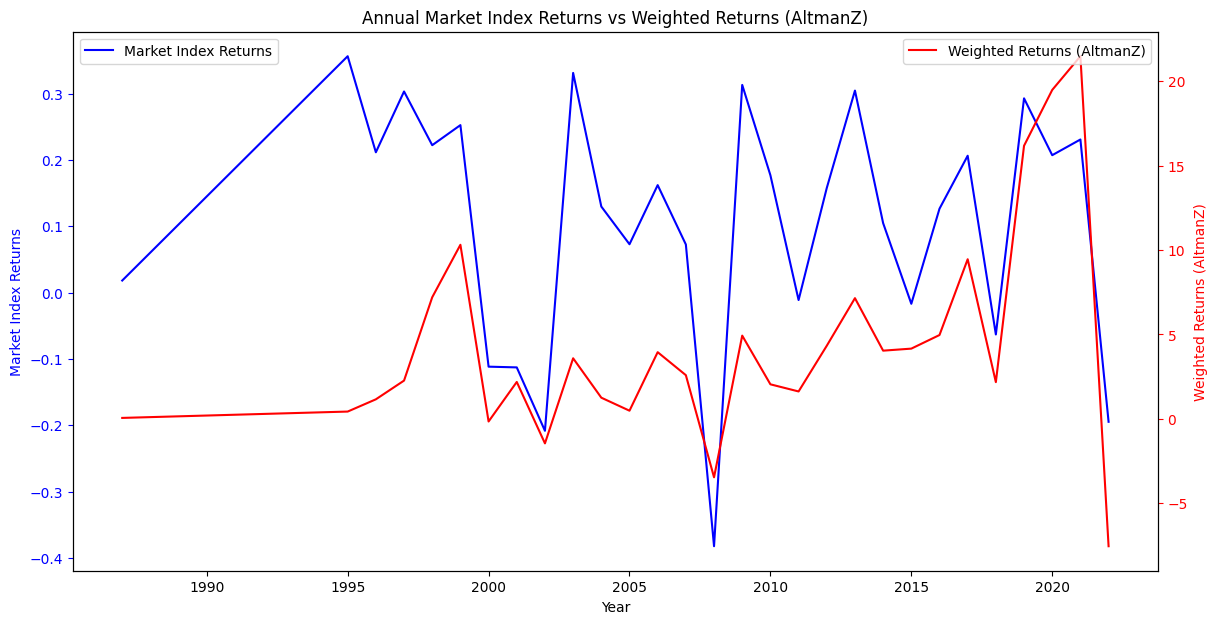

In [324]:
# Merge both DataFrames on the year
merged_df = pd.merge(annual_index_return, annual_returns, left_on='year', right_on='Year', how='inner')

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the market index returns
ax1.plot(merged_df['year'], merged_df['vwretd'], color='b', label='Market Index Returns')
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Index Returns', color='b')
ax1.tick_params('y', colors='b')

# Create another y-axis for the weighted returns based on AltmanZ scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['weighted_ret_AltmanZ'], color='r', label='Weighted Returns (AltmanZ)')
ax2.set_ylabel('Weighted Returns (AltmanZ)', color='r')
ax2.tick_params('y', colors='r')

# Add a title and a legend
plt.title('Annual Market Index Returns vs Weighted Returns (AltmanZ)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

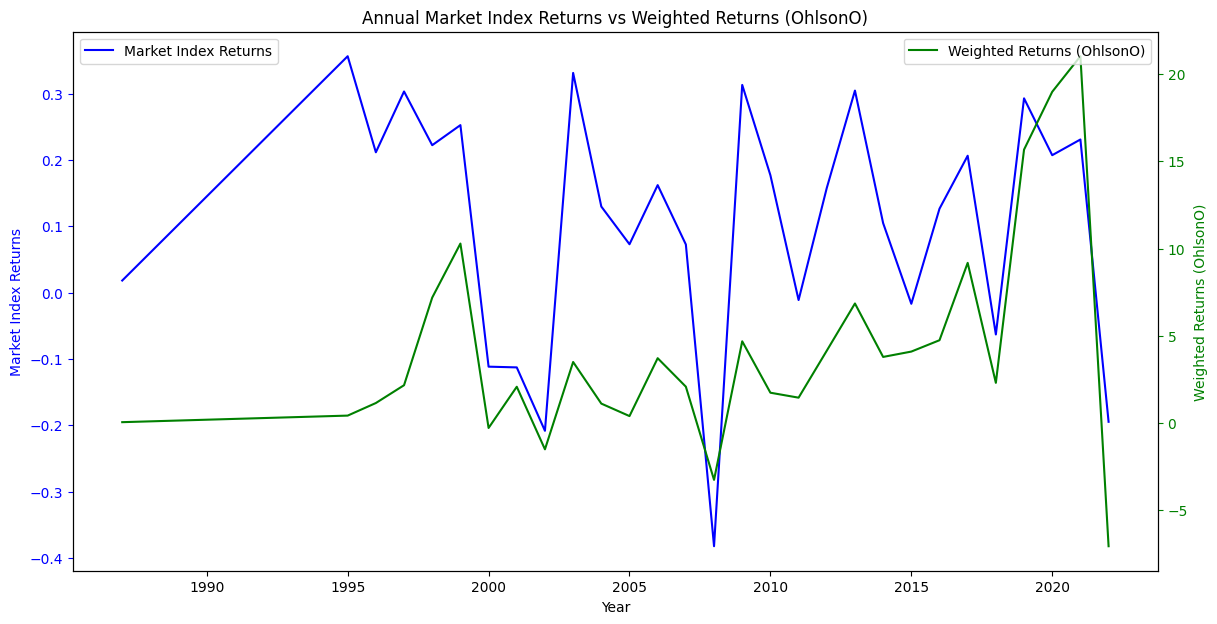

In [327]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the market index returns
ax1.plot(merged_df['year'], merged_df['vwretd'], color='b', label='Market Index Returns')
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Index Returns', color='b')
ax1.tick_params('y', colors='b')

# Create another y-axis for the weighted returns based on OhlsonO scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['weighted_ret_OhlsonO'], color='g', label='Weighted Returns (OhlsonO)')
ax2.set_ylabel('Weighted Returns (OhlsonO)', color='g')
ax2.tick_params('y', colors='g')

# Add a title and a legend
plt.title('Annual Market Index Returns vs Weighted Returns (OhlsonO)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


1.  Performance Through Market Cycles: Fundamental indexing strategies, which rely on firm-specific metrics rather than market prices, have the potential to outperform market-cap weighted indexes during certain market cycles. Especially during periods when market prices may be overinflated due to speculative trading, fundamental indexes could provide a more stable return by focusing on underlying company health and performance.

2.  Impact of Size and Price Filters: By restricting the universe to stocks with a market cap of over $100 million and a stock price over $5, both strategies likely exclude many small-cap and lower-priced stocks. This could reduce exposure to the higher volatility often associated with these stocks, potentially leading to a more stable performance but also possibly missing out on the higher returns these riskier assets can sometimes offer.

3.  Diversification and Risk: Fundamental weighted portfolios may offer better diversification as they do not concentrate holdings in the largest companies by market cap, which is a common critique of market-cap weighted indexes. This could potentially lead to lower risk levels as measured by standard deviation or total volatility, and may also affect skewness and kurtosis of returns.

4.  Comparison with MKT, SMB, and HML Factors: The performance of fundamental weighted indexes relative to market-cap weighted indexes might differ when compared to the MKT (overall market), SMB (small minus big cap), and HML (high minus low book-to-market ratio) factors. Fundamental indexes may have a different exposure to these factors, which can lead to different performance characteristics, especially in different stages of the business cycle.

5.  Sharpe and Information Ratios: The Sharpe Ratio measures excess return per unit of risk (standard deviation), and the Information Ratio assesses the excess return of a portfolio relative to a benchmark, adjusted for the volatility of those excess returns. Fundamental indexes might show different Sharpe and Information Ratios compared to market-cap weighted indexes, which would highlight their risk-adjusted performance differences.

6.  Adaptability to Market Changes: Fundamental indexes that are rebalanced annually may be less reactive to immediate market movements, which can be a double-edged sword. On one hand, it can protect against the whims of market sentiment; on the other hand, it might delay the portfolio's adjustment to genuine shifts in economic conditions.

7.  Performance in Recessions vs. Expansions: During recessions, market-cap weighted indexes may suffer from a rapid decline as stock prices plummet, whereas fundamental indexes might be more resilient if their underlying companies have strong fundamentals. Conversely, during expansions, market-cap indexes might capture the upside more quickly.

8.  Observations on Indexing Mechanisms: Fundamental indexing challenges the notion that the market price is always the best indicator of a company's value. By using fundamentals, this approach attempts to capitalize on potential market inefficiencies. However, it also requires a strong belief in the chosen fundamentals to drive long-term performance.

In [328]:
monthly_portfolio = pd.read_csv('msf_master.csv', low_memory = False)
monthly_portfolio['date'] = pd.to_datetime(monthly_portfolio['date'], format = '%Y-%m-%d', errors = 'coerce')
monthly_portfolio['PRC'] = monthly_portfolio['PRC'].abs()
monthly_portfolio['PRC'] = monthly_portfolio['PRC'].bfill()
monthly_portfolio['RET'] = pd.to_numeric(monthly_portfolio['RET'],errors='coerce')
monthly_portfolio['RET'] = monthly_portfolio['RET'].bfill()
monthly_portfolio['SHROUT'] = pd.to_numeric(monthly_portfolio['SHROUT'],errors='coerce')
monthly_portfolio['SHROUT'] = monthly_portfolio['SHROUT'].bfill()
monthly_portfolio['vwretd'] = pd.to_numeric(monthly_portfolio['vwretd'],errors='coerce')
monthly_portfolio['vwretd'] = monthly_portfolio['vwretd'].bfill()

In [329]:
# Assuming monthly_portfolio is already a DataFrame with the appropriate types
monthly_portfolio['Market_Cap'] = monthly_portfolio['PRC'] * monthly_portfolio['SHROUT']

# Filter stocks with market cap >= $100 million and stock price > $5
filtered_portfolio = monthly_portfolio[
    (monthly_portfolio['Market_Cap'] >= 100e6) & 
    (monthly_portfolio['PRC'] > 5)
]

# Ensure the Year and Month columns are present in the filtered_portfolio DataFrame
filtered_portfolio['Year'] = filtered_portfolio['date'].dt.year
filtered_portfolio['Month'] = filtered_portfolio['date'].dt.month


In [330]:
portfolio_with_measures = filtered_portfolio.merge(
    market_measures_df,
    on=['PERMNO', 'Year'],
    how='left'
)


In [331]:
# Filter data to get the measures as of January 1st of each year
january_measures = portfolio_with_measures[portfolio_with_measures['Month'] == 1]

# Rank stocks based on volatility measures and normalize the ranks to get weights
january_measures['Total_Volatility_rank'] = january_measures.groupby('Year')['Total_Volatility'].rank(ascending=True, method='min')
january_measures['Annualized_Volatility_rank'] = january_measures.groupby('Year')['Annualized_Volatility'].rank(ascending=True, method='min')
january_measures['Annualized_Volatility_Zero_Avg_rank'] = january_measures.groupby('Year')['Annualized_Volatility_Zero_Avg'].rank(ascending=True, method='min')

# Normalize the ranks to get weights (invert the rank as a weight, lowest volatility gets the highest weight)
january_measures['Total_Volatility_weight'] = 1 / january_measures['Total_Volatility_rank']
january_measures['Annualized_Volatility_weight'] = 1 / january_measures['Annualized_Volatility_rank']
january_measures['Annualized_Volatility_Zero_Avg_weight'] = 1 / january_measures['Annualized_Volatility_Zero_Avg_rank']

# Sum of weights for each year to normalize
sum_weights_total_volatility = january_measures.groupby('Year')['Total_Volatility_weight'].transform('sum')
sum_weights_annualized_volatility = january_measures.groupby('Year')['Annualized_Volatility_weight'].transform('sum')
sum_weights_annualized_volatility_zero_avg = january_measures.groupby('Year')['Annualized_Volatility_Zero_Avg_weight'].transform('sum')

january_measures['Total_Volatility_weight'] /= sum_weights_total_volatility
january_measures['Annualized_Volatility_weight'] /= sum_weights_annualized_volatility
january_measures['Annualized_Volatility_Zero_Avg_weight'] /= sum_weights_annualized_volatility_zero_avg

# Now we have the weights for each stock for the January portfolio, we will carry forward these weights for the rest of the year


In [332]:
# Create a DataFrame to hold the weights for each stock for each month
monthly_weights = portfolio_with_measures[['PERMNO', 'Year', 'Month']].copy()
monthly_weights = monthly_weights.merge(
    january_measures[['PERMNO', 'Year', 'Total_Volatility_weight', 'Annualized_Volatility_weight', 'Annualized_Volatility_Zero_Avg_weight']],
    on=['PERMNO', 'Year'],
    how='left'
)

# Forward fill the weights for the rest of the year
monthly_weights.fillna(method='ffill', inplace=True)

# Merge the monthly returns with the weights
monthly_returns_with_weights = portfolio_with_measures.merge(
    monthly_weights,
    on=['PERMNO', 'Year', 'Month'],
    how='left'
)

# Calculate the weighted returns
monthly_returns_with_weights['weighted_ret_Total_Volatility'] = monthly_returns_with_weights['RET'] * monthly_returns_with_weights['Total_Volatility_weight']
monthly_returns_with_weights['weighted_ret_Annualized_Volatility'] = monthly_returns_with_weights['RET'] * monthly_returns_with_weights['Annualized_Volatility_weight']
monthly_returns_with_weights['weighted_ret_Annualized_Volatility_Zero_Avg'] = monthly_returns_with_weights['RET'] * monthly_returns_with_weights['Annualized_Volatility_Zero_Avg_weight']

# Group by year and sum the weighted returns for each portfolio to get the annual returns
annual_returns = monthly_returns_with_weights.groupby('Year').agg({
    'weighted_ret_Total_Volatility': 'sum',
    'weighted_ret_Annualized_Volatility': 'sum',
    'weighted_ret_Annualized_Volatility_Zero_Avg': 'sum'
}).reset_index()


In [333]:
# Create a DataFrame to hold the weights for each stock for each month
monthly_weights = portfolio_with_measures[['PERMNO', 'Year', 'Month']].copy()
monthly_weights = monthly_weights.merge(
    january_measures[['PERMNO', 'Year', 'Total_Volatility_weight', 'Annualized_Volatility_weight', 'Annualized_Volatility_Zero_Avg_weight']],
    on=['PERMNO', 'Year'],
    how='left'
)

# Forward fill the weights for the rest of the year
monthly_weights.fillna(method='ffill', inplace=True)

# Merge the monthly returns with the weights
monthly_returns_with_weights = portfolio_with_measures.merge(
    monthly_weights,
    on=['PERMNO', 'Year', 'Month'],
    how='left'
)

# Calculate the weighted returns
monthly_returns_with_weights['weighted_ret_Total_Volatility'] = monthly_returns_with_weights['RET'] * monthly_returns_with_weights['Total_Volatility_weight']
monthly_returns_with_weights['weighted_ret_Annualized_Volatility'] = monthly_returns_with_weights['RET'] * monthly_returns_with_weights['Annualized_Volatility_weight']
monthly_returns_with_weights['weighted_ret_Annualized_Volatility_Zero_Avg'] = monthly_returns_with_weights['RET'] * monthly_returns_with_weights['Annualized_Volatility_Zero_Avg_weight']

# Group by year and sum the weighted returns for each portfolio to get the annual returns
annual_returns = monthly_returns_with_weights.groupby('Year').agg({
    'weighted_ret_Total_Volatility': 'sum',
    'weighted_ret_Annualized_Volatility': 'sum',
    'weighted_ret_Annualized_Volatility_Zero_Avg': 'sum'
}).reset_index()


In [334]:
annual_returns.head()

Year  weighted_ret_Total_Volatility  weighted_ret_Annualized_Volatility  \
0  1987                       0.000113                            0.000113   
1  1995                       0.007057                            0.007057   
2  1996                       0.265566                            0.265566   
3  1997                       0.349942                            0.349942   
4  1998                       0.388388                            0.388388   

   weighted_ret_Annualized_Volatility_Zero_Avg  
0                                     0.000113  
1                                     0.007023  
2                                     0.265153  
3                                     0.350096  
4                                     0.382383

In [335]:
index_data = pd.read_csv('index_monthly.csv',low_memory=False)
index_data['DATE'] = pd.to_datetime(index_data['DATE'])
# Calculate the annual return. This assumes that 'vwretd' is the total monthly return.
# If 'vwretd' is in percentage, you should divide by 100 before adding 1.
index_data['cumulative_return'] = (1 + index_data['vwretd']).cumprod()

# Calculate the year-end cumulative return
index_data['year'] = index_data['DATE'].dt.year
year_end_cumulative_return = index_data.groupby('year')['cumulative_return'].last().reset_index()

# Calculate the year start cumulative return by shifting the year-end return
year_start_cumulative_return = year_end_cumulative_return.shift(1, fill_value=1)

# Calculate the annual return by dividing the year-end by year-start and subtracting 1
annual_index_return = pd.DataFrame({
    'year': year_end_cumulative_return['year'],
    'vwretd': year_end_cumulative_return['cumulative_return'] / year_start_cumulative_return['cumulative_return'] - 1
})

annual_index_return.head()


year    vwretd
0  1970  0.000731
1  1971  0.161988
2  1972  0.173404
3  1973 -0.187496
4  1974 -0.279411

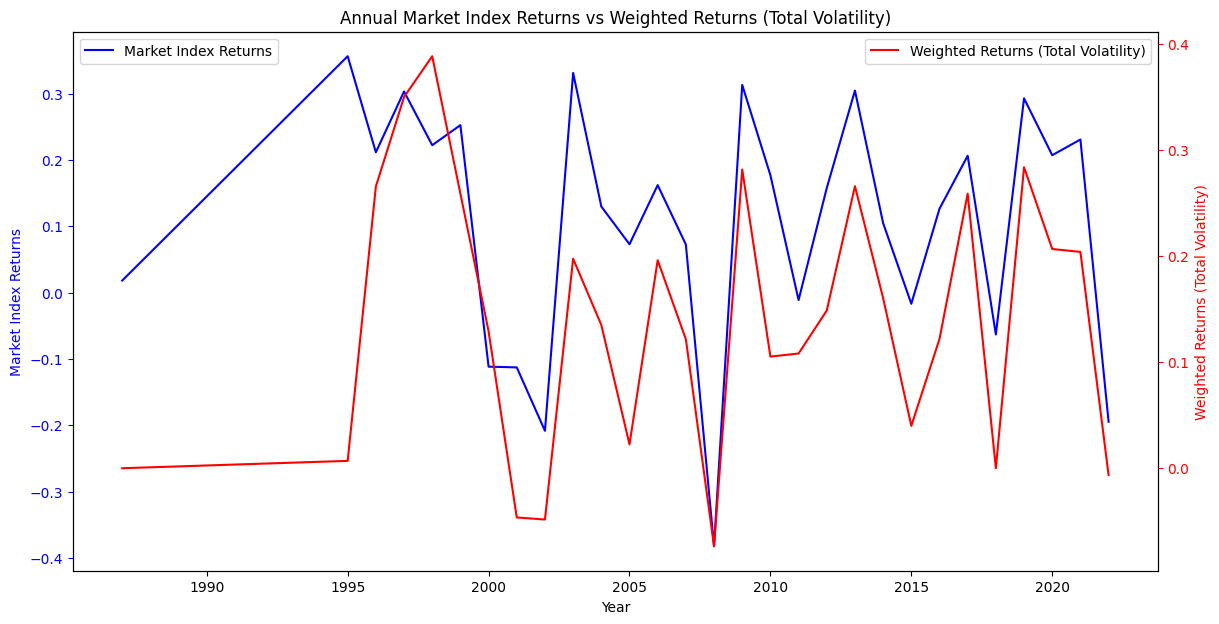

In [338]:
# Merge both DataFrames on the year
merged_df = pd.merge(annual_index_return, annual_returns, left_on='year', right_on='Year', how='inner')

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the market index returns
ax1.plot(merged_df['year'], merged_df['vwretd'], color='b', label='Market Index Returns')
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Index Returns', color='b')
ax1.tick_params('y', colors='b')

# Create another y-axis for the weighted returns based on AltmanZ scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['weighted_ret_Total_Volatility'], color='r', label='Weighted Returns (Total Volatility)')
ax2.set_ylabel('Weighted Returns (Total Volatility)', color='r')
ax2.tick_params('y', colors='r')

# Add a title and a legend
plt.title('Annual Market Index Returns vs Weighted Returns (Total Volatility)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

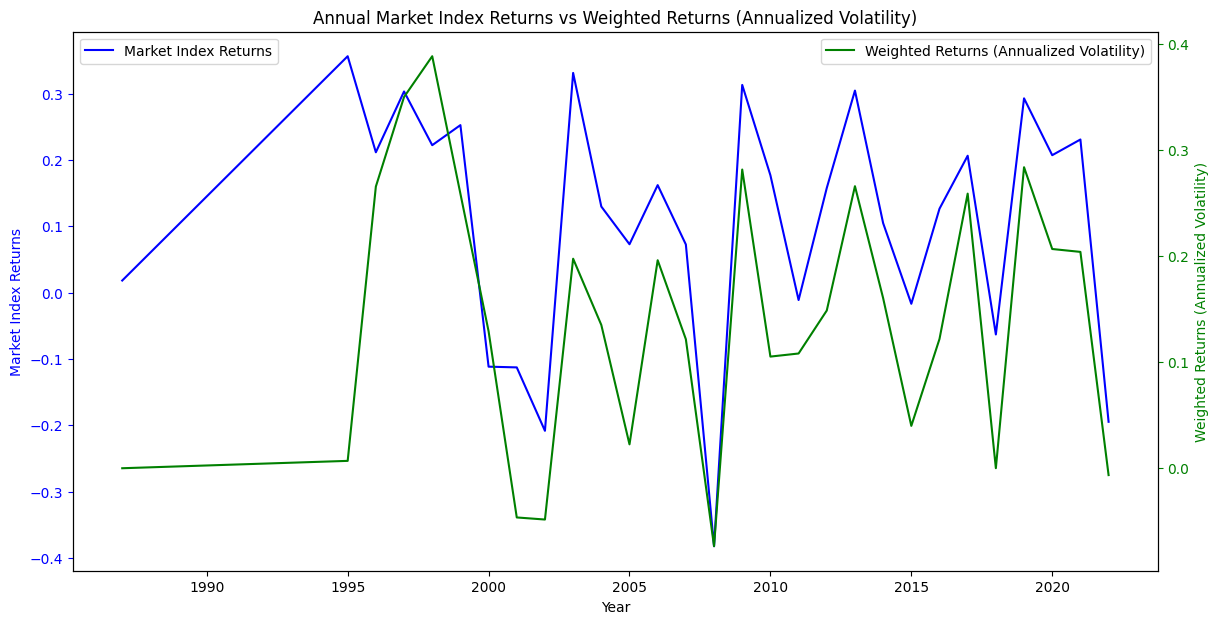

In [339]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the market index returns
ax1.plot(merged_df['year'], merged_df['vwretd'], color='b', label='Market Index Returns')
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Index Returns', color='b')
ax1.tick_params('y', colors='b')

# Create another y-axis for the weighted returns based on OhlsonO scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['weighted_ret_Annualized_Volatility'], color='g', label='Weighted Returns (Annualized Volatility)')
ax2.set_ylabel('Weighted Returns (Annualized Volatility)', color='g')
ax2.tick_params('y', colors='g')

# Add a title and a legend
plt.title('Annual Market Index Returns vs Weighted Returns (Annualized Volatility)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


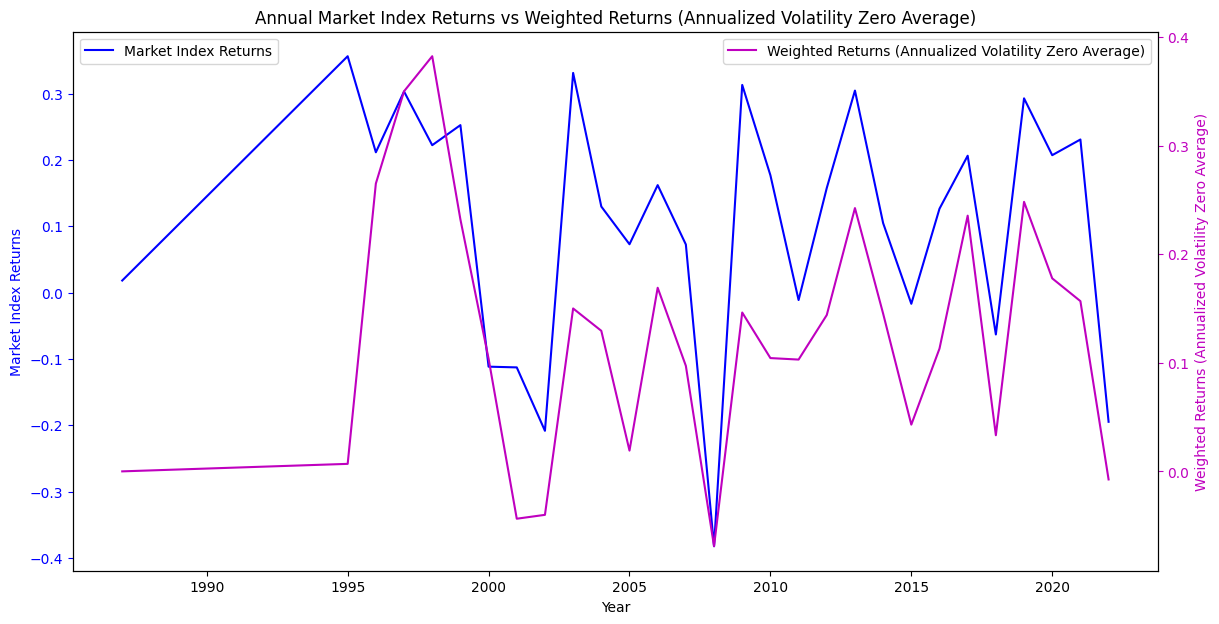

In [350]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the market index returns
ax1.plot(merged_df['year'], merged_df['vwretd'], color='b', label='Market Index Returns')
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Index Returns', color='b')
ax1.tick_params('y', colors='b')

# Create another y-axis for the weighted returns based on OhlsonO scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['weighted_ret_Annualized_Volatility_Zero_Avg'], color='m', label='Weighted Returns (Annualized Volatility Zero Average)')
ax2.set_ylabel('Weighted Returns (Annualized Volatility Zero Average)', color='m')
ax2.tick_params('y', colors='m')

# Add a title and a legend
plt.title('Annual Market Index Returns vs Weighted Returns (Annualized Volatility Zero Average)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


1.  Risk-Adjusted Return Strategies: By using market variables such as total and annualized volatility, the indexing strategy focuses on risk-adjusted returns. This could attract investors who are more risk-averse and looking for more stable investment opportunities, especially during volatile market periods.

2.  Filtering Effect: The restriction on stocks based on market capitalization and stock price aims to create a more stable investment universe by eliminating small-cap stocks, which are often more volatile, and penny stocks, which can be subject to price manipulations and liquidity issues.

3.  Variable-Based Weighting: Ranking stocks based on market variables and using these for weighting can lead to a portfolio that might behave differently across various market conditions. For instance, in a bullish market, stocks with lower volatility might underperform the market, while in a bearish market, they could provide downside protection.

4.  Rebalancing and Timing: The strategy of holding a portfolio for an entire year and rebalancing on the last trading day could result in a lag in responsiveness to market changes. However, it may also prevent overreacting to short-term market fluctuations, thus potentially reducing transaction costs and overtrading.

5.  Comparison with Market Cycles: Visualizing returns over time relative to VWRETD returns, particularly across different business cycles, can illustrate the resilience or sensitivity of this alternate indexing strategy to economic changes. It would be particularly interesting to observe how this strategy performs during market downturns or NBER-defined recessions.

6.  Performance Metrics: Computing returns, excess returns, volatility, skewness, and kurtosis offers a comprehensive view of the risk profile and performance characteristics of the return-based indexed portfolio. The Sharpe Ratio will give insight into the risk-adjusted performance, while the Information Ratio will show how much excess return is achieved per unit of risk relative to the benchmark.

7.  Comparison with Factor Returns: Analyzing how the return-based index compares with MKT, SMB, and HML returns would show the factor exposures of the portfolio. This analysis could reveal whether the alternate indexing strategy systematically leans towards or away from these known risk factors.

8.  Alternative vs. Market Cap Indexing: Alternate indexing mechanisms such as return-based indexing offer a different take on portfolio construction, which can sometimes lead to outperformance of market cap-based indexing during certain periods. It shifts focus from size to the underlying risk-return characteristics of the stocks, which could be advantageous in specific market environments.